#Import Library

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte
import numpy as np

In [ ]:
import cv2
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [ ]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import xgboost 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.2)
from keras.layers import PReLU
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from copy import copy

from numpy import hstack
from numpy import array
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling1D

from scipy import stats
from scipy.stats import spearmanr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.backends.cudnn.enabled = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte

import copy
import time

%load_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

#Import Data From Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download cdminix/us-drought-meteorological-data

100% 897M/901M [00:29<00:00, 35.2MB/s]
100% 901M/901M [00:29<00:00, 31.9MB/s]


In [ ]:
!unzip us-drought-meteorological-data.zip

Archive:  us-drought-meteorological-data.zip
  inflating: soil_data.csv           
  inflating: test_timeseries/test_timeseries.csv  
  inflating: train_timeseries/train_timeseries.csv  
  inflating: validation_timeseries/validation_timeseries.csv  


In [ ]:
#train = pd.read_csv('/content/train_timeseries/train_timeseries.csv')
#soil = pd.read_csv('/content/soil_data.csv')
validation = pd.read_csv('/content/validation_timeseries/validation_timeseries.csv')
test = pd.read_csv('/content/test_timeseries/test_timeseries.csv')
pd.set_option('display.max_columns', None)

#Choosing 9 regions of the United States Based on 9 Climate Regions in the United States

There are 9 climate regions in the United States:
1. Northeast
2. Upper Midwest
3. Ohio Valley
4. Southeast
5. Northern Rockies and Plains
6. South
7. Southwest
8. Northwest
9. West

Then, we will choose 1 state from each of the climate regions, there are:
1. New York County, New York (36061), dari Northeast 
2. Dakota County, Minnesota (27037), dari Upper Midwest
3. Jasper County, Missouri (29097), dari Ohio Valley
4. St. Lucie County, Florida (12111), dari Southeast
5. Holt County, Nebraska (31089), dari Northern Rockies and Plains
6. Clark County, Kansas (20025), dari South
7. Coconino County, Arizona (04005), dari Southwest
8. Crook County, Oregon (41013), dari Northwest
9. Los Angeles County, California (06037), dari West

Each notebook contains 3 different states for different models(MLP-and-LSTM and CNN-LSTM)

##Clark, Kansas

###train

In [ ]:
clark = train[train['fips']==20025]

#using interpolation to fill in the NaN values
clark = clark.interpolate().fillna(method='bfill')
clark.score[clark.score <0.5] = 0
clark.score[(clark.score >=0.5)&(clark.score<1.5)] = 1
clark.score[(clark.score >=1.5)&(clark.score<2.5)] = 2
clark.score[(clark.score >=2.5)&(clark.score<3.5)] = 3
clark.score[(clark.score >=3.5)&(clark.score<4.5)] = 4
clark.score[(clark.score >=4.5)&(clark.score<5.5)] = 5
clark

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
5377860  20025  2000-01-01     0.00  92.66  3.92  10.08   -0.92   -0.86   
5377861  20025  2000-01-02     0.02  93.00  3.49   5.76   -2.22   -2.16   
5377862  20025  2000-01-03     1.94  93.43  2.92  -0.95   -4.71   -4.64   
5377863  20025  2000-01-04     0.00  94.54  1.60  -1.59  -11.38  -10.99   
5377864  20025  2000-01-05     0.27  93.55  2.82   1.61   -5.25   -5.13   
...        ...         ...      ...    ...   ...    ...     ...     ...   
5384065  20025  2016-12-27     0.00  94.17  2.69   1.35   -5.46   -5.35   
5384066  20025  2016-12-28     0.00  93.95  2.90   4.10   -4.50   -4.40   
5384067  20025  2016-12-29     0.00  95.18  1.66   1.01  -10.93  -10.45   
5384068  20025  2016-12-30     0.02  93.46  3.03   4.88   -4.56   -4.42   
5384069  20025  2016-12-31     0.00  93.19  2.52   1.54   -6.43   -6.29   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
5377860    20.12     1.71      18.41  9.46   6.68       9.82       3.96   
5377861    12.76     0.84      11.92  5.99   3.73       8.68       0.58   
5377862     1.57    -5.45       7.01 -0.88   8.16      11.02       3.86   
5377863     6.98    -7.53      14.51 -2.04   4.35       5.84       1.30   
5377864    11.79    -3.99      15.78  0.85   4.69       6.74       2.44   
...          ...      ...        ...   ...    ...        ...        ...   
5384065     9.97    -4.19      14.16  0.72   3.75       5.39       2.51   
5384066    12.97    -1.10      14.07  3.44   5.42       6.75       3.39   
5384067     8.44    -4.29      12.73 -0.16   4.46       6.35       1.39   
5384068    14.91    -2.67      17.58  4.27   7.30       9.53       4.73   
5384069     6.99    -1.92       8.91  0.99   5.02       9.27       1.67   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
5377860         5.86  10.14      14.25       6.95         7.31    1.0  
5377861         8.10   6.12      12.80       0.81        11.99    1.0  
5377862         7.16  10.48      13.78       5.50         8.28    1.0  
5377863         4.55   6.61       9.86       2.04         7.82    1.0  
5377864         4.30   6.71       9.95       3.76         6.20    1.0  
...              ...    ...        ...        ...          ...    ...  
5384065         2.87   6.40       9.45       2.98         6.48    3.0  
5384066         3.36   8.83      10.61       6.43         4.19    3.0  
5384067         4.96   6.86       9.99       1.96         8.03    3.0  
5384068         4.81  10.79      13.63       7.38         6.25    3.0  
5384069         7.60   6.91      12.59       2.49        10.10    3.0  

[6210 rows x 21 columns]

###val

In [ ]:
ks_val = validation[validation['fips']==20025]

#using interpolation to fill in the NaN values
ks_val = ks_val.interpolate().fillna(method='bfill')
ks_val.score[ks_val.score <0.5] = 0
ks_val.score[(ks_val.score >=0.5)&(ks_val.score<1.5)] = 1
ks_val.score[(ks_val.score >=1.5)&(ks_val.score<2.5)] = 2
ks_val.score[(ks_val.score >=2.5)&(ks_val.score<3.5)] = 3
ks_val.score[(ks_val.score >=3.5)&(ks_val.score<4.5)] = 4
ks_val.score[(ks_val.score >=4.5)&(ks_val.score<5.5)] = 5

ks_val

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
632180  20025  2017-01-01     0.00  92.92  3.42  4.25   -2.83   -2.77   
632181  20025  2017-01-02     0.01  93.01  4.22  5.52    0.36    0.38   
632182  20025  2017-01-03     0.01  94.34  1.62 -2.91  -11.66  -11.21   
632183  20025  2017-01-04     0.00  94.02  1.24 -5.01  -14.11  -13.53   
632184  20025  2017-01-05     1.21  94.19  1.13 -8.84  -15.11  -14.60   
...       ...         ...      ...    ...   ...   ...     ...     ...   
632905  20025  2018-12-27     1.75  92.77  3.02 -0.60   -4.17   -4.70   
632906  20025  2018-12-28     0.00  94.31  1.84 -4.42  -10.33   -9.60   
632907  20025  2018-12-29     0.01  94.51  2.02 -3.41   -9.11   -8.63   
632908  20025  2018-12-30     0.00  93.17  2.90 -0.54   -4.61   -4.58   
632909  20025  2018-12-31     0.00  93.28  2.54 -2.76   -6.36   -6.52   

        T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
632180    14.41    -3.38      17.79  3.93   5.73       8.86       2.85   
632181    13.61     0.70      12.91  5.75   4.20       7.43       2.11   
632182     0.49    -6.02       6.51 -2.26   7.11       9.17       4.07   
632183    -1.12    -7.58       6.46 -3.69   4.09       6.81       2.12   
632184    -7.55    -9.71       2.16 -7.58   5.92       7.21       3.38   
...         ...      ...        ...   ...    ...        ...        ...   
632905     6.00    -5.60      11.60 -0.52   8.91      13.26       4.92   
632906    -1.32    -6.21       4.89 -3.91   5.94       9.14       2.89   
632907     0.69    -5.24       5.93 -2.69   2.45       4.44       1.17   
632908     8.68    -6.09      14.77 -0.82   5.53       7.60       4.16   
632909     4.13    -9.03      13.16 -2.43   7.38      12.12       1.20   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
632180         6.01   8.89      11.29       5.77         5.53    3.0  
632181         5.32   6.29       9.97       3.32         6.65    3.0  
632182         5.10   8.88      11.32       4.94         6.38    3.0  
632183         4.69   4.89       8.25       2.37         5.88    3.0  
632184         3.83   7.03       8.62       4.20         4.42    3.0  
...             ...    ...        ...        ...          ...    ...  
632905         8.35  11.66      16.38       6.27        10.11    0.0  
632906         6.25   7.70      10.86       3.57         7.28    0.0  
632907         3.27   3.53       6.97       1.37         5.60    0.0  
632908         3.44   8.14      11.31       5.44         5.86    0.0  
632909        10.92   9.38      14.60       2.36        12.24    0.0  

[730 rows x 21 columns]

In [ ]:
ks_val['score'].value_counts()

0.0    289
1.0    137
2.0    113
3.0     81
4.0     70
5.0     40
Name: score, dtype: int64

In [ ]:
ks_val = ks_val.round(4)

In [ ]:
X = ks_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = ks_val['score']

###xgboost feature importance

In [ ]:
X_train = clark[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = clark['score']

In [ ]:
X_val = ks_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = ks_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

0.0948158793306435
0.47175224285092876
2.2597227694271993


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 2.700350046157837,
 'f1': 3.401400089263916,
 'f2': 4.365285396575928,
 'f3': 4.210153579711914,
 'f4': 11.824654579162598,
 'f5': 12.615077018737793,
 'f6': 5.936997890472412,
 'f7': 6.056924819946289,
 'f8': 4.802402496337891,
 'f9': 12.105953216552734,
 'f10': 4.209506034851074,
 'f11': 5.176335334777832,
 'f12': 4.382079601287842,
 'f13': 4.757554531097412,
 'f14': 4.965822696685791,
 'f15': 5.49702787399292,
 'f16': 5.145925521850586,
 'f17': 5.06868839263916}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 2.700350046157837,
 'f1': 3.401400089263916,
 'f2': 4.365285396575928,
 'f3': 4.210153579711914,
 'f4': 11.824654579162598,
 'f5': 12.615077018737793,
 'f6': 5.936997890472412,
 'f7': 6.056924819946289,
 'f8': 4.802402496337891,
 'f9': 12.105953216552734,
 'f10': 4.209506034851074,
 'f11': 5.176335334777832,
 'f12': 4.382079601287842,
 'f13': 4.757554531097412,
 'f14': 4.965822696685791,
 'f15': 5.49702787399292,
 'f16': 5.145925521850586,
 'f17': 5.06868839263916}

In [ ]:
importance_df

0
f0    2.700350
f1    3.401400
f2    4.365285
f3    4.210154
f4   11.824655
f5   12.615077
f6    5.936998
f7    6.056925
f8    4.802402
f9   12.105953
f10   4.209506
f11   5.176335
f12   4.382080
f13   4.757555
f14   4.965823
f15   5.497028
f16   5.145926
f17   5.068688

<Axes: >

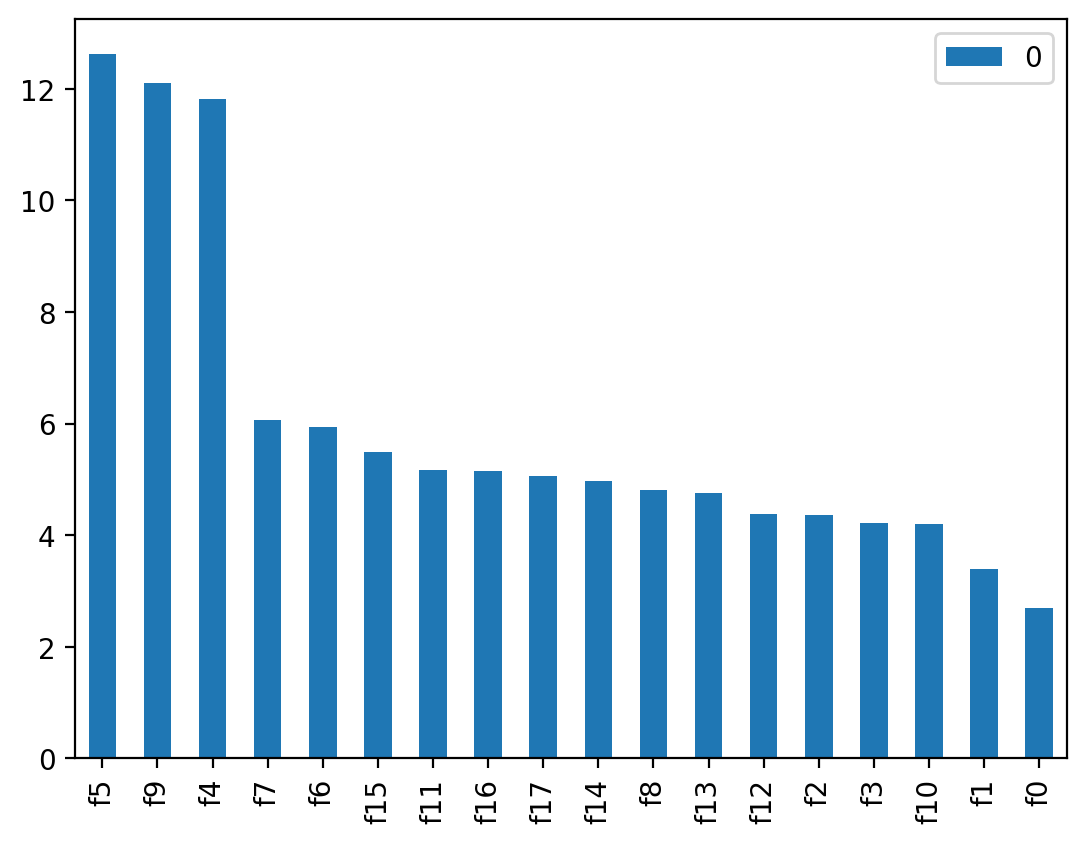

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2M_WET
2. TS
3. T2MDEW
4. T2M_MIN
5. T2M_MAX
6. WS50M_MAX
7. WS10M_MAX
8. WS50M_MIN
9. WS50M_RANGE
10. WS50M
11. T2M_RANGE
12. WS10M_RANGE
13. WS10M_MIN
14. QV2M
15. T2M
16. WS10M
17. PS
18. PRECTOT

###test

In [ ]:
ks_test = test[test['fips']==20025]

#using interpolation to fill in the NaN values
ks_test = ks_test.interpolate().fillna(method='bfill')
ks_test.score[ks_test.score <0.5] = 0
ks_test.score[(ks_test.score >=0.5)&(ks_test.score<1.5)] = 1
ks_test.score[(ks_test.score >=1.5)&(ks_test.score<2.5)] = 2
ks_test.score[(ks_test.score >=2.5)&(ks_test.score<3.5)] = 3
ks_test.score[(ks_test.score >=3.5)&(ks_test.score<4.5)] = 4
ks_test.score[(ks_test.score >=4.5)&(ks_test.score<5.5)] = 5

ks_test.head()

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
633046  20025  2019-01-01     0.00  94.73  1.17 -9.02  -15.86  -14.28   
633047  20025  2019-01-02     0.00  94.18  1.77 -4.30  -10.85  -10.20   
633048  20025  2019-01-03     0.24  93.72  2.37 -0.84   -7.21   -6.98   
633049  20025  2019-01-04     0.00  93.56  3.49  2.78   -2.10   -2.34   
633050  20025  2019-01-05     0.00  93.62  4.29  4.13    0.72    0.50   

        T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
633046    -5.70   -10.87       5.17 -8.06   4.25       8.71       0.29   
633047     2.45   -11.03      13.48 -4.82   2.13       4.32       0.12   
633048     5.74    -6.14      11.89 -1.91   2.54       3.69       1.34   
633049    12.18    -2.00      14.18  1.32   4.04       5.61       2.55   
633050    12.87    -0.35      13.21  3.02   3.55       4.64       1.24   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
633046         8.42   5.24      10.75       0.42        10.33    0.0  
633047         4.21   3.16       5.45       0.19         5.26    0.0  
633048         2.35   3.97       7.54       2.05         5.50    0.0  
633049         3.05   6.93       8.74       4.57         4.18    0.0  
633050         3.41   6.54       9.62       1.38         8.24    0.0

In [ ]:
ks_test = ks_test.round(4)
ks_test

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
633046  20025  2019-01-01     0.00  94.73  1.17 -9.02  -15.86  -14.28   
633047  20025  2019-01-02     0.00  94.18  1.77 -4.30  -10.85  -10.20   
633048  20025  2019-01-03     0.24  93.72  2.37 -0.84   -7.21   -6.98   
633049  20025  2019-01-04     0.00  93.56  3.49  2.78   -2.10   -2.34   
633050  20025  2019-01-05     0.00  93.62  4.29  4.13    0.72    0.50   
...       ...         ...      ...    ...   ...   ...     ...     ...   
633772  20025  2020-12-27     0.00  93.45  3.39  4.53   -2.50    1.02   
633773  20025  2020-12-28     0.18  94.56  3.08  0.46   -3.62   -1.58   
633774  20025  2020-12-29     7.50  93.57  4.27  1.43    0.61    1.02   
633775  20025  2020-12-30     0.37  94.24  2.37 -0.84   -7.11   -3.97   
633776  20025  2020-12-31     0.00  93.83  2.28 -1.48   -7.66   -4.57   

        T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
633046    -5.70   -10.87       5.17 -8.06   4.25       8.71       0.29   
633047     2.45   -11.03      13.48 -4.82   2.13       4.32       0.12   
633048     5.74    -6.14      11.89 -1.91   2.54       3.69       1.34   
633049    12.18    -2.00      14.18  1.32   4.04       5.61       2.55   
633050    12.87    -0.35      13.21  3.02   3.55       4.64       1.24   
...         ...      ...        ...   ...    ...        ...        ...   
633772    11.83     0.55      11.28  3.58   5.62      10.23       2.30   
633773     3.41    -1.25       4.66  0.64   3.98       6.54       2.30   
633774     7.24    -1.98       9.22  1.16   4.77       8.52       1.62   
633775     4.37    -3.19       7.56 -2.40   3.58       6.39       0.99   
633776     3.73    -5.39       9.12 -2.19   2.94       6.52       1.50   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
633046         8.42   5.24      10.75       0.42        10.33    0.0  
633047         4.21   3.16       5.45       0.19         5.26    0.0  
633048         2.35   3.97       7.54       2.05         5.50    0.0  
633049         3.05   6.93       8.74       4.57         4.18    0.0  
633050         3.41   6.54       9.62       1.38         8.24    0.0  
...             ...    ...        ...        ...          ...    ...  
633772         7.93   8.24      12.57       3.98         8.59    0.0  
633773         4.24   5.72       8.76       3.96         4.79    0.0  
633774         6.89   6.49      11.53       2.71         8.82    0.0  
633775         5.40   5.09       9.71       1.37         8.34    0.0  
633776         5.02   4.49       8.80       2.15         6.65    0.0  

[731 rows x 21 columns]

In [ ]:
ks_test['score'].value_counts()

0.0    428
1.0    221
2.0     82
Name: score, dtype: int64

In [ ]:
X_test = ks_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = ks_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


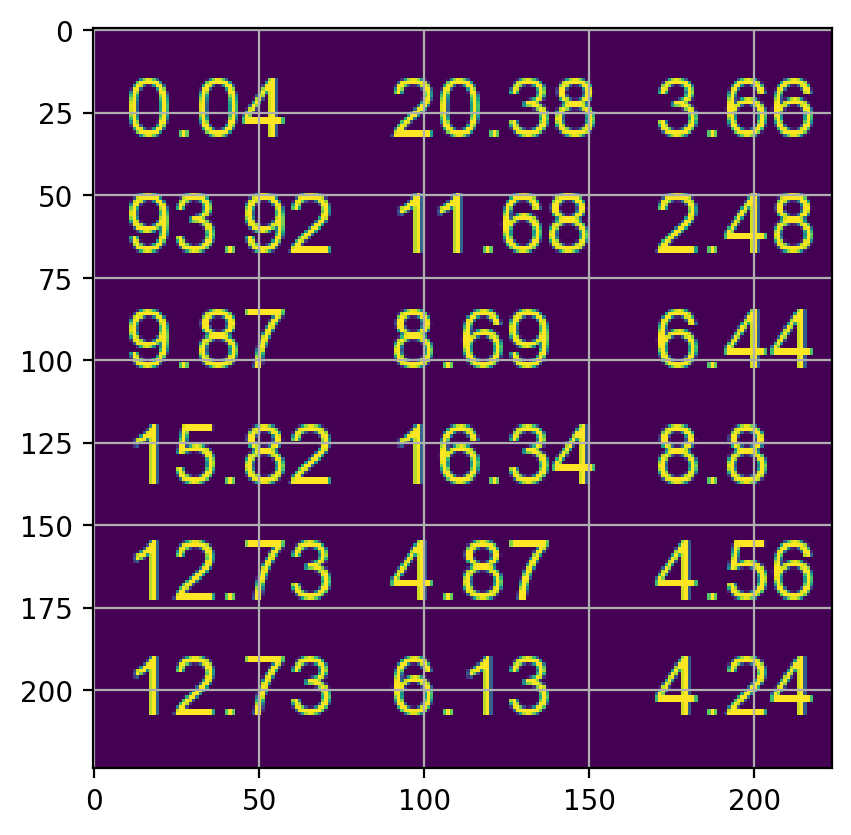

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 27s 303ms/step - loss: 105.1039 - root_mean_squared_error: 10.2520 - val_loss: 2.6266 - val_root_mean_squared_error: 1.6207
Epoch 2/50
37/37 [==============================] - 5s 140ms/step - loss: 3.0577 - root_mean_squared_error: 1.7486 - val_loss: 2.6550 - val_root_mean_squared_error: 1.6294
Epoch 3/50
37/37 [==============================] - 5s 147ms/step - loss: 2.5793 - root_mean_squared_error: 1.6060 - val_loss: 2.4202 - val_root_mean_squared_error: 1.5557
Epoch 4/50
37/37 [==============================] - 5s 149ms/step - loss: 2.5500 - root_mean_squared_error: 1.5969 - val_loss: 2.3360 - val_root_mean_squared_error: 1.5284
Epoch 5/50
37/37 [==============================] - 5s 141ms/step - loss: 2.4608 - root_mean_squared_error: 1.5687 - val_loss: 2.2841 - val_root_mean_squared_error: 1.5113
Epoch 6/50
37/37 [==============================] - 5s 142ms/step - loss: 2.3569 - root_mean_squared_error: 1.5352 - val_loss: 2.4666 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 128ms/step


predictions  actuals
0       2.899052      0.0
1       2.194311      0.0
2       0.247180      0.0
3       0.162741      0.0
4       1.848674      0.0
..           ...      ...
726     1.864068      0.0
727     1.822908      0.0
728     0.406213      0.0
729     0.554936      0.0
730     2.255510      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            2.0      0.0
2            0.0      0.0
3            0.0      0.0
4            2.0      0.0
..           ...      ...
726          2.0      0.0
727          2.0      0.0
728          0.0      0.0
729          1.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            2.0      0.0
2            0.0      0.0
3            0.0      0.0
4            2.0      0.0
..           ...      ...
726          2.0      0.0
727          2.0      0.0
728          0.0      0.0
729          1.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.54      0.35      0.42       428
         1.0       0.28      0.34      0.31       221
         2.0       0.08      0.13      0.10        82

   micro avg       0.34      0.32      0.33       731
   macro avg       0.30      0.27      0.28       731
weighted avg       0.41      0.32      0.35       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.54      0.35      0.42       428
         1.0       0.28      0.34      0.31       221
         2.0       0.08      0.13      0.10        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.32       731
   macro avg       0.18      0.16      0.17       731
weighted avg       0.41      0.32      0.35       731



<Axes: >

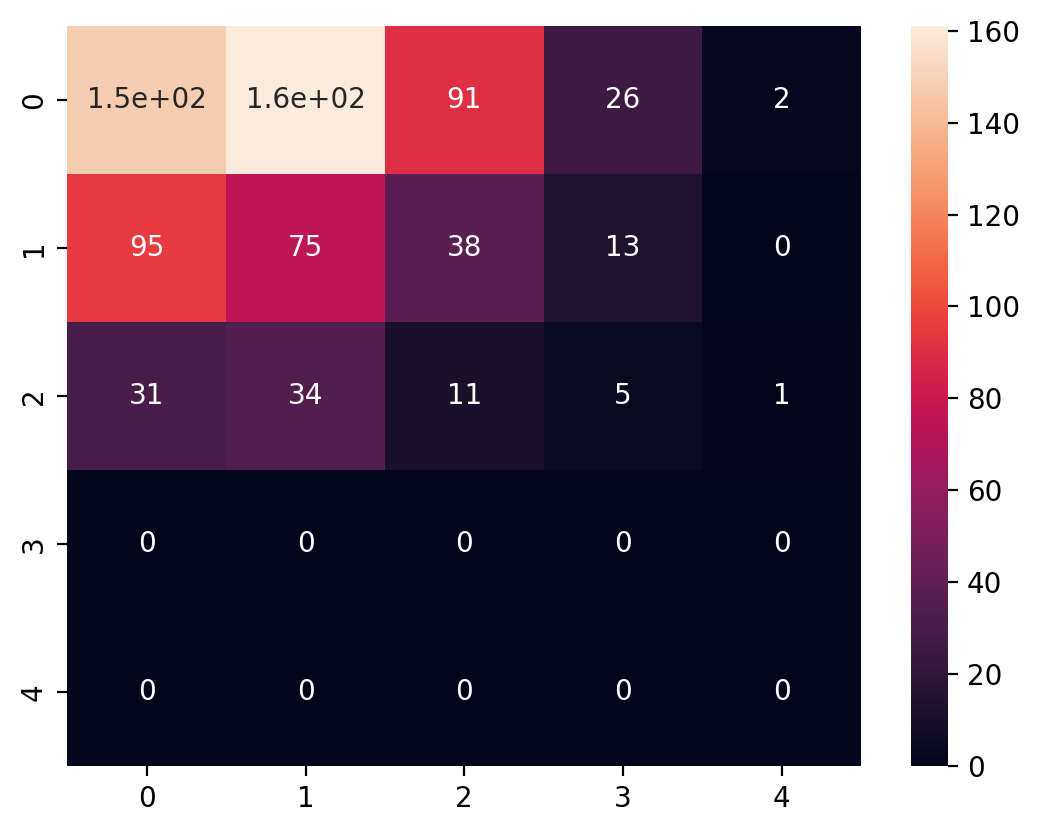

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 37s 450ms/step - loss: 23.7917 - root_mean_squared_error: 4.8777 - val_loss: 2.5263 - val_root_mean_squared_error: 1.5894
Epoch 2/50
37/37 [==============================] - 8s 225ms/step - loss: 2.7238 - root_mean_squared_error: 1.6504 - val_loss: 2.4353 - val_root_mean_squared_error: 1.5605
Epoch 3/50
37/37 [==============================] - 8s 214ms/step - loss: 2.8083 - root_mean_squared_error: 1.6758 - val_loss: 2.5402 - val_root_mean_squared_error: 1.5938
Epoch 4/50
37/37 [==============================] - 8s 227ms/step - loss: 2.6029 - root_mean_squared_error: 1.6134 - val_loss: 2.4580 - val_root_mean_squared_error: 1.5678
Epoch 5/50
37/37 [==============================] - 8s 228ms/step - loss: 2.7177 - root_mean_squared_error: 1.6486 - val_loss: 2.4310 - val_root_mean_squared_error: 1.5592
Epoch 6/50
37/37 [==============================] - 8s 228ms/step - loss: 2.6259 - root_mean_squared_error: 1.6205 - val_loss: 2.5954 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 13s 212ms/step


predictions  actuals
0       3.126431      0.0
1       2.738698      0.0
2       2.211935      0.0
3       1.012351      0.0
4       0.580312      0.0
..           ...      ...
726     1.291127      0.0
727     1.157608      0.0
728     2.530666      0.0
729     1.859966      0.0
730     0.825422      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            2.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          3.0      0.0
729          2.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            2.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          3.0      0.0
729          2.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.49      0.19      0.28       428
         1.0       0.32      0.37      0.34       221
         2.0       0.10      0.32      0.16        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.26       731
   macro avg       0.18      0.18      0.16       731
weighted avg       0.40      0.26      0.28       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.49      0.19      0.28       428
         1.0       0.32      0.37      0.34       221
         2.0       0.10      0.32      0.16        82

   micro avg       0.28      0.26      0.27       731
   macro avg       0.30      0.29      0.26       731
weighted avg       0.40      0.26      0.28       731



<Axes: >

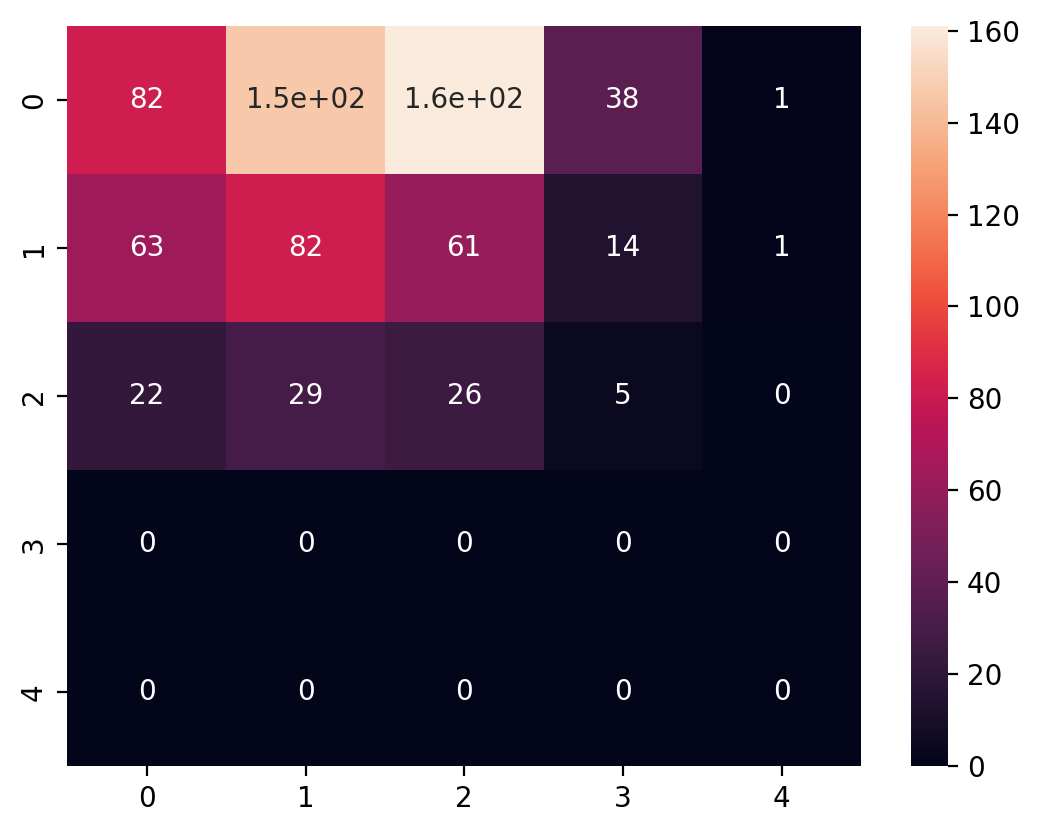

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 190ms/step - loss: 21.5244 - root_mean_squared_error: 4.6394 - val_loss: 2.9104 - val_root_mean_squared_error: 1.7060
Epoch 2/50
37/37 [==============================] - 5s 126ms/step - loss: 2.8592 - root_mean_squared_error: 1.6909 - val_loss: 2.6013 - val_root_mean_squared_error: 1.6129
Epoch 3/50
37/37 [==============================] - 5s 125ms/step - loss: 2.6433 - root_mean_squared_error: 1.6258 - val_loss: 2.4700 - val_root_mean_squared_error: 1.5716
Epoch 4/50
37/37 [==============================] - 5s 122ms/step - loss: 2.5641 - root_mean_squared_error: 1.6013 - val_loss: 2.5659 - val_root_mean_squared_error: 1.6018
Epoch 5/50
37/37 [==============================] - 5s 123ms/step - loss: 2.5440 - root_mean_squared_error: 1.5950 - val_loss: 2.2767 - val_root_mean_squared_error: 1.5089
Epoch 6/50
37/37 [==============================] - 5s 143ms/step - loss: 2.5566 - root_mean_squared_error: 1.5989 - val_loss: 2.3111 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 263ms/step


predictions  actuals
0       3.214281      0.0
1       4.018770      0.0
2       3.698671      0.0
3       0.191028      0.0
4       3.057071      0.0
..           ...      ...
726     0.063264      0.0
727     1.767712      0.0
728     4.276937      0.0
729     3.217705      0.0
730     3.290029      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            4.0      0.0
2            4.0      0.0
3            0.0      0.0
4            3.0      0.0
..           ...      ...
726          0.0      0.0
727          2.0      0.0
728          4.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            4.0      0.0
2            4.0      0.0
3            0.0      0.0
4            3.0      0.0
..           ...      ...
726          0.0      0.0
727          2.0      0.0
728          4.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.61      0.36      0.45       428
         1.0       0.32      0.32      0.32       221
         2.0       0.13      0.21      0.16        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.33       731
   macro avg       0.18      0.15      0.15       731
weighted avg       0.47      0.33      0.38       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.61      0.36      0.45       428
         1.0       0.32      0.32      0.32       221
         2.0       0.13      0.21      0.16        82

   micro avg       0.40      0.33      0.36       731
   macro avg       0.35      0.30      0.31       731
weighted avg       0.47      0.33      0.38       731



<Axes: >

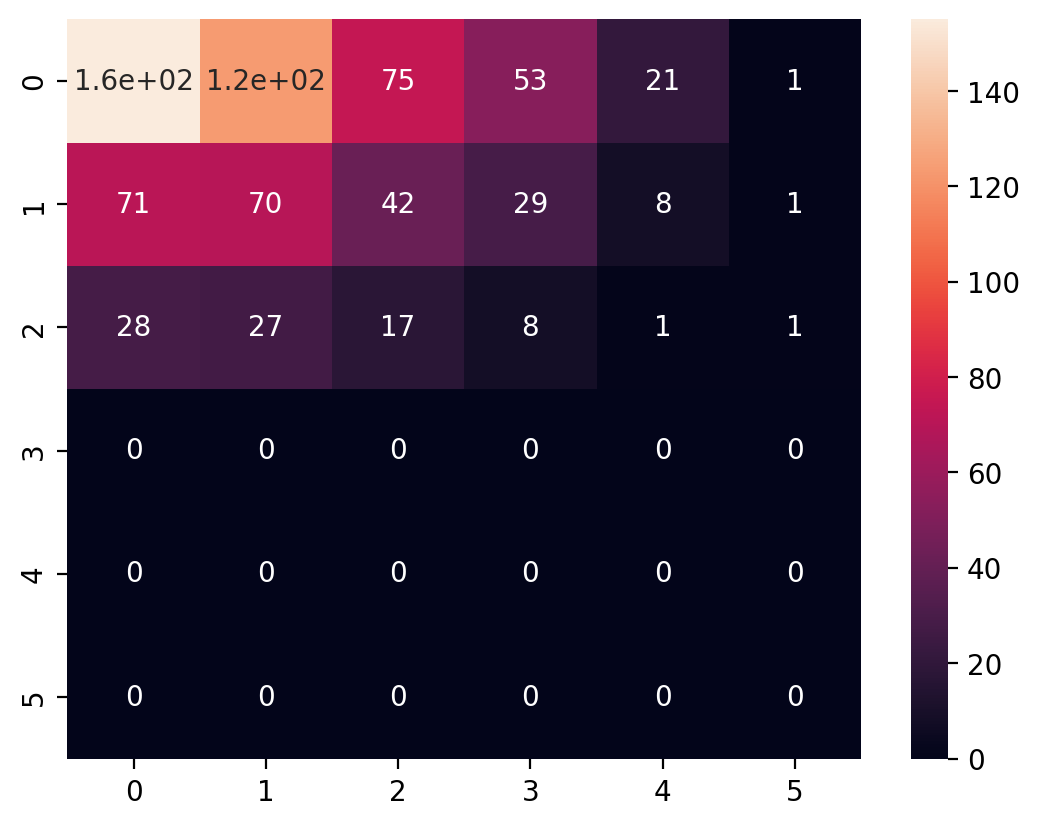

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling dgn smote 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:289,1:289,2:289,3:289,4:289,5:289},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1734, 18)
After OverSampling, the shape of train_y: (1734,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[4.00000e-02, 9.39200e+01, 9.87000e+00, ..., 8.80000e+00,
        4.56000e+00, 4.24000e+00],
       [8.00000e-02, 9.42800e+01, 7.03000e+00, ..., 6.69000e+00,
        2.38000e+00, 4.31000e+00],
       [2.00000e+00, 9.39500e+01, 6.52000e+00, ..., 1.24100e+01,
        5.72000e+00, 6.69000e+00],
       ...,
       [9.70000e-03, 9.33862e+01, 8.16690e+00, ..., 9.92730e+00,
        1.57660e+00, 8.36040e+00],
       [9.00000e-04, 9.25441e+01, 3.68720e+00, ..., 1.95338e+01,
        1.01470e+00, 1.85191e+01],
       [0.00000e+00, 9.40967e+01, 5.63820e+00, ..., 7.37290e+00,
        3.39890e+00, 3.97400e+00]])

(1734, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


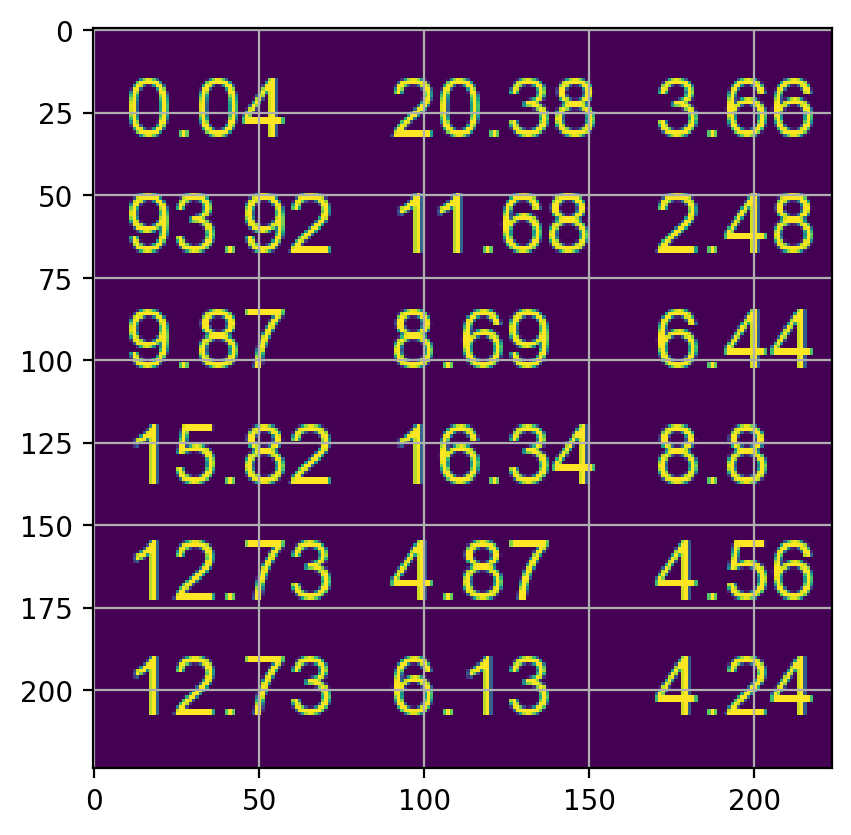

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1734, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1734,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 31s 146ms/step - loss: 60.5436 - root_mean_squared_error: 7.7810 - val_loss: 2.4195 - val_root_mean_squared_error: 1.5555
Epoch 2/50
109/109 [==============================] - 13s 121ms/step - loss: 3.0178 - root_mean_squared_error: 1.7372 - val_loss: 2.3918 - val_root_mean_squared_error: 1.5465
Epoch 3/50
109/109 [==============================] - 13s 122ms/step - loss: 2.8547 - root_mean_squared_error: 1.6896 - val_loss: 2.3139 - val_root_mean_squared_error: 1.5211
Epoch 4/50
109/109 [==============================] - 13s 122ms/step - loss: 2.6510 - root_mean_squared_error: 1.6282 - val_loss: 2.2856 - val_root_mean_squared_error: 1.5118
Epoch 5/50
109/109 [==============================] - 13s 123ms/step - loss: 2.7991 - root_mean_squared_error: 1.6730 - val_loss: 2.3827 - val_root_mean_squared_error: 1.5436
Epoch 6/50
109/109 [==============================] - 13s 123ms/step - loss: 2.7746 - root_mean_squared_error: 1.6657 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 133ms/step


predictions  actuals
0       3.799249      0.0
1       2.823083      0.0
2       1.153034      0.0
3       0.588259      0.0
4       1.302291      0.0
..           ...      ...
726     1.026601      0.0
727     2.471929      0.0
728     0.583100      0.0
729     1.962690      0.0
730     2.128271      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            4.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          1.0      0.0
729          2.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            4.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          1.0      0.0
729          2.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.55      0.07      0.13       428
         1.0       0.31      0.62      0.41       221
         2.0       0.07      0.12      0.09        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.24       731
   macro avg       0.19      0.16      0.13       731
weighted avg       0.43      0.24      0.21       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.55      0.07      0.13       428
         1.0       0.31      0.62      0.41       221
         2.0       0.07      0.12      0.09        82

   micro avg       0.28      0.24      0.26       731
   macro avg       0.31      0.27      0.21       731
weighted avg       0.43      0.24      0.21       731



<Axes: >

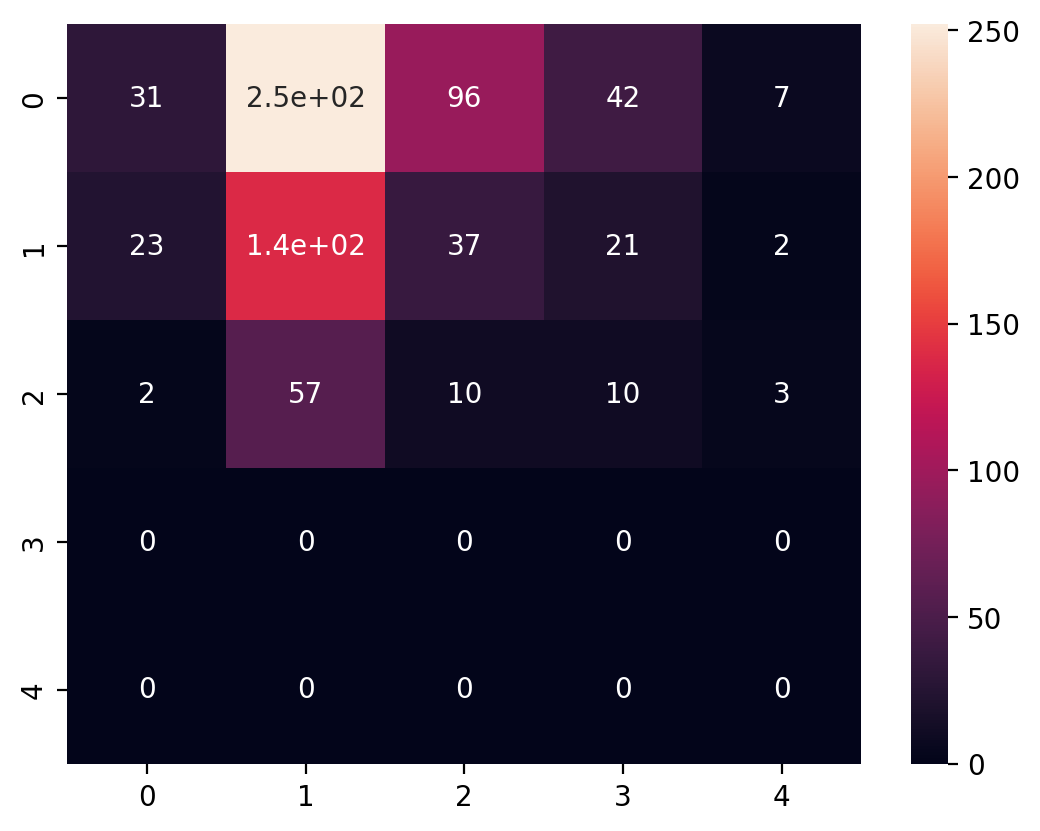

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 50s 262ms/step - loss: 18.8006 - root_mean_squared_error: 4.3360 - val_loss: 2.4264 - val_root_mean_squared_error: 1.5577
Epoch 2/50
109/109 [==============================] - 21s 193ms/step - loss: 3.4711 - root_mean_squared_error: 1.8631 - val_loss: 2.3590 - val_root_mean_squared_error: 1.5359
Epoch 3/50
109/109 [==============================] - 21s 193ms/step - loss: 3.3018 - root_mean_squared_error: 1.8171 - val_loss: 2.4213 - val_root_mean_squared_error: 1.5560
Epoch 4/50
109/109 [==============================] - 21s 191ms/step - loss: 2.9549 - root_mean_squared_error: 1.7190 - val_loss: 2.3998 - val_root_mean_squared_error: 1.5491
Epoch 5/50
109/109 [==============================] - 21s 191ms/step - loss: 2.7624 - root_mean_squared_error: 1.6621 - val_loss: 2.3573 - val_root_mean_squared_error: 1.5354
Epoch 6/50
109/109 [==============================] - 21s 191ms/step - loss: 2.7206 - root_mean_squared_error: 1.6494 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 229ms/step


predictions  actuals
0       2.703272      0.0
1       2.888014      0.0
2       1.072465      0.0
3       0.749105      0.0
4       0.774367      0.0
..           ...      ...
726     0.642532      0.0
727     2.608461      0.0
728     1.674834      0.0
729     1.195908      0.0
730     0.859838      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          3.0      0.0
728          2.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          3.0      0.0
728          2.0      0.0
729          1.0      0.0
730          1.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.43      0.07      0.13       428
         1.0       0.32      0.48      0.38       221
         2.0       0.09      0.23      0.13        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.22       731
   macro avg       0.17      0.16      0.13       731
weighted avg       0.36      0.22      0.21       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.43      0.07      0.13       428
         1.0       0.32      0.48      0.38       221
         2.0       0.09      0.23      0.13        82

   micro avg       0.26      0.22      0.23       731
   macro avg       0.28      0.26      0.21       731
weighted avg       0.36      0.22      0.21       731



<Axes: >

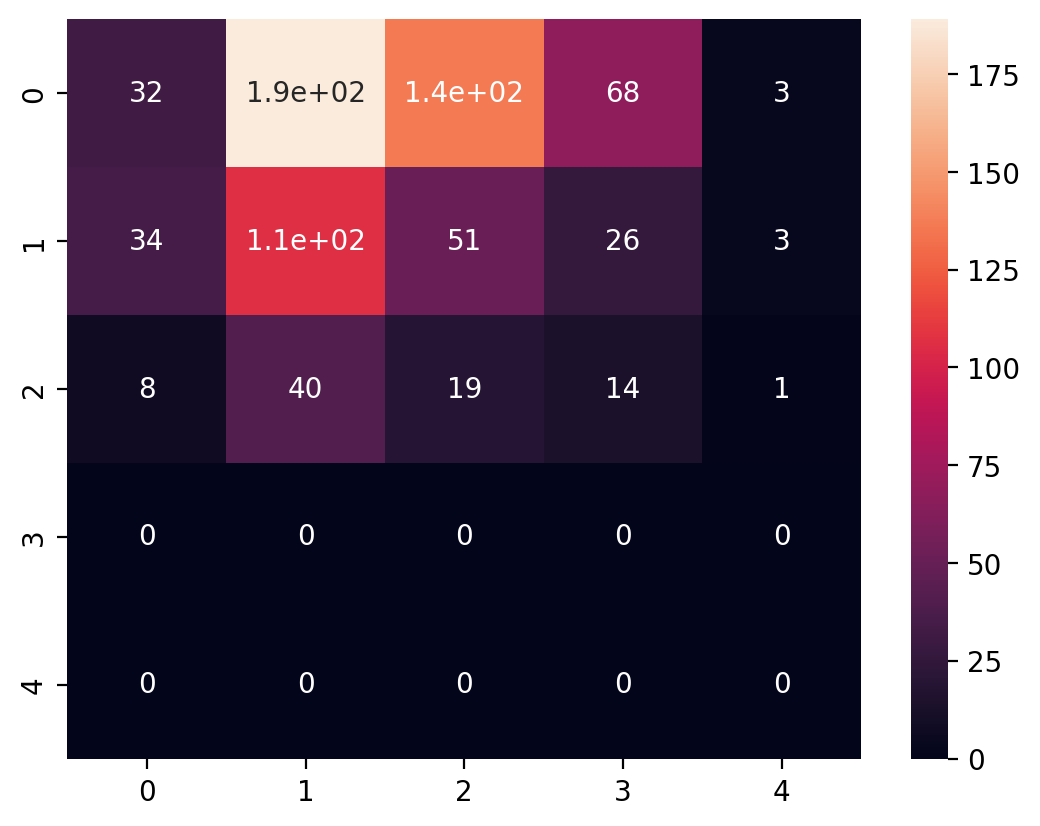

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 18s 108ms/step - loss: 6.5297 - root_mean_squared_error: 2.5553 - val_loss: 2.5431 - val_root_mean_squared_error: 1.5947
Epoch 2/50
109/109 [==============================] - 9s 86ms/step - loss: 3.1102 - root_mean_squared_error: 1.7636 - val_loss: 2.7663 - val_root_mean_squared_error: 1.6632
Epoch 3/50
109/109 [==============================] - 9s 86ms/step - loss: 3.2128 - root_mean_squared_error: 1.7924 - val_loss: 2.6390 - val_root_mean_squared_error: 1.6245
Epoch 4/50
109/109 [==============================] - 9s 86ms/step - loss: 4.0734 - root_mean_squared_error: 2.0183 - val_loss: 2.7010 - val_root_mean_squared_error: 1.6435
Epoch 5/50
109/109 [==============================] - 9s 86ms/step - loss: 2.7889 - root_mean_squared_error: 1.6700 - val_loss: 2.5799 - val_root_mean_squared_error: 1.6062
Epoch 6/50
109/109 [==============================] - 9s 86ms/step - loss: 2.8761 - root_mean_squared_error: 1.6959 - val_loss: 2.583

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 277ms/step


predictions  actuals
0       2.231247      0.0
1       2.825367      0.0
2       2.585120      0.0
3       0.359184      0.0
4       1.433042      0.0
..           ...      ...
726     1.478330      0.0
727     3.278935      0.0
728     4.520372      0.0
729     1.952612      0.0
730     2.882042      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            3.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          3.0      0.0
728          5.0      0.0
729          2.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            3.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          3.0      0.0
728          5.0      0.0
729          2.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.52      0.24      0.33       428
         1.0       0.30      0.35      0.32       221
         2.0       0.08      0.17      0.11        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.27       731
   macro avg       0.15      0.13      0.13       731
weighted avg       0.40      0.27      0.30       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.52      0.24      0.33       428
         1.0       0.30      0.35      0.32       221
         2.0       0.08      0.17      0.11        82

   micro avg       0.30      0.27      0.28       731
   macro avg       0.30      0.25      0.25       731
weighted avg       0.40      0.27      0.30       731



<Axes: >

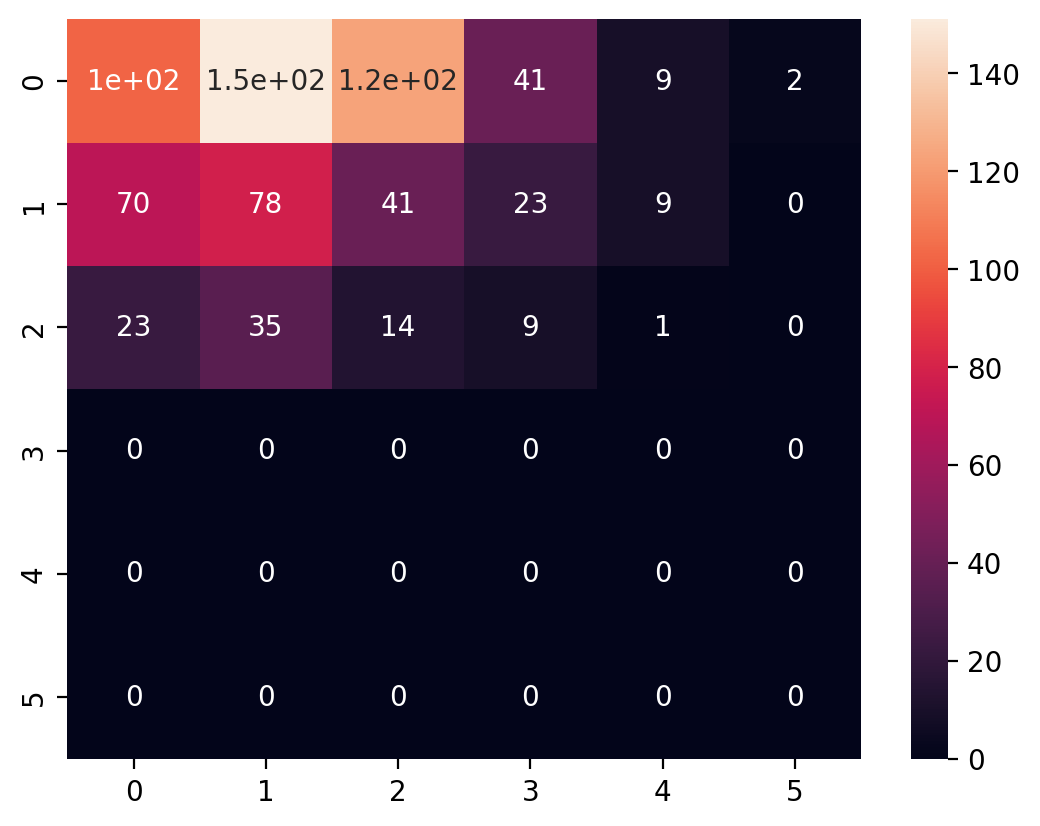

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[4]), fill='white', font=font3)
        draw.text((10, 115), str(dat[7]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[15]), fill='white', font=font3)
        draw.text((90, 10), str(dat[11]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[17]), fill='white', font=font4)
        draw.text((90, 115), str(dat[14]), fill='white', font=font4)
        draw.text((90, 150), str(dat[8]), fill='white', font=font5)
        draw.text((90, 185), str(dat[13]), fill='white', font=font5)
        draw.text((170, 10), str(dat[12]), fill='white', font=font5)
        draw.text((170, 45), str(dat[2]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


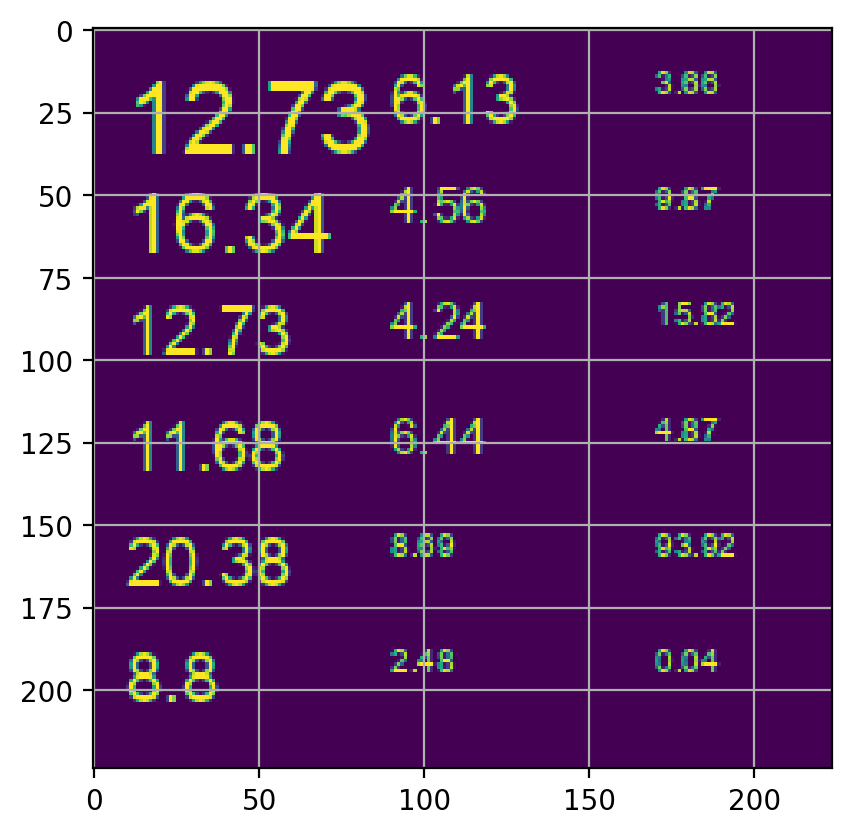

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 20s 211ms/step - loss: 70.2761 - root_mean_squared_error: 8.3831 - val_loss: 2.5624 - val_root_mean_squared_error: 1.6007
Epoch 2/50
37/37 [==============================] - 5s 134ms/step - loss: 3.0970 - root_mean_squared_error: 1.7598 - val_loss: 2.4499 - val_root_mean_squared_error: 1.5652
Epoch 3/50
37/37 [==============================] - 5s 134ms/step - loss: 2.8410 - root_mean_squared_error: 1.6855 - val_loss: 2.4618 - val_root_mean_squared_error: 1.5690
Epoch 4/50
37/37 [==============================] - 5s 135ms/step - loss: 2.5881 - root_mean_squared_error: 1.6088 - val_loss: 2.3525 - val_root_mean_squared_error: 1.5338
Epoch 5/50
37/37 [==============================] - 5s 134ms/step - loss: 2.6207 - root_mean_squared_error: 1.6189 - val_loss: 2.2898 - val_root_mean_squared_error: 1.5132
Epoch 6/50
37/37 [==============================] - 5s 135ms/step - loss: 2.6800 - root_mean_squared_error: 1.6371 - val_loss: 2.2600 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 127ms/step


predictions  actuals
0       3.247946      0.0
1       2.370947      0.0
2       2.167929      0.0
3       2.441839      0.0
4       1.749766      0.0
..           ...      ...
726     1.634172      0.0
727     2.639767      0.0
728     1.790514      0.0
729     3.297017      0.0
730     2.772007      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            2.0      0.0
2            2.0      0.0
3            2.0      0.0
4            2.0      0.0
..           ...      ...
726          2.0      0.0
727          3.0      0.0
728          2.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            2.0      0.0
2            2.0      0.0
3            2.0      0.0
4            2.0      0.0
..           ...      ...
726          2.0      0.0
727          3.0      0.0
728          2.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       428
         1.0       0.38      0.42      0.40       221
         2.0       0.13      0.43      0.19        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.18       731
   macro avg       0.25      0.14      0.10       731
weighted avg       0.72      0.18      0.15       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       428
         1.0       0.38      0.42      0.40       221
         2.0       0.13      0.43      0.19        82

   micro avg       0.25      0.18      0.21       731
   macro avg       0.50      0.28      0.20       731
weighted avg       0.72      0.18      0.15       731



<Axes: >

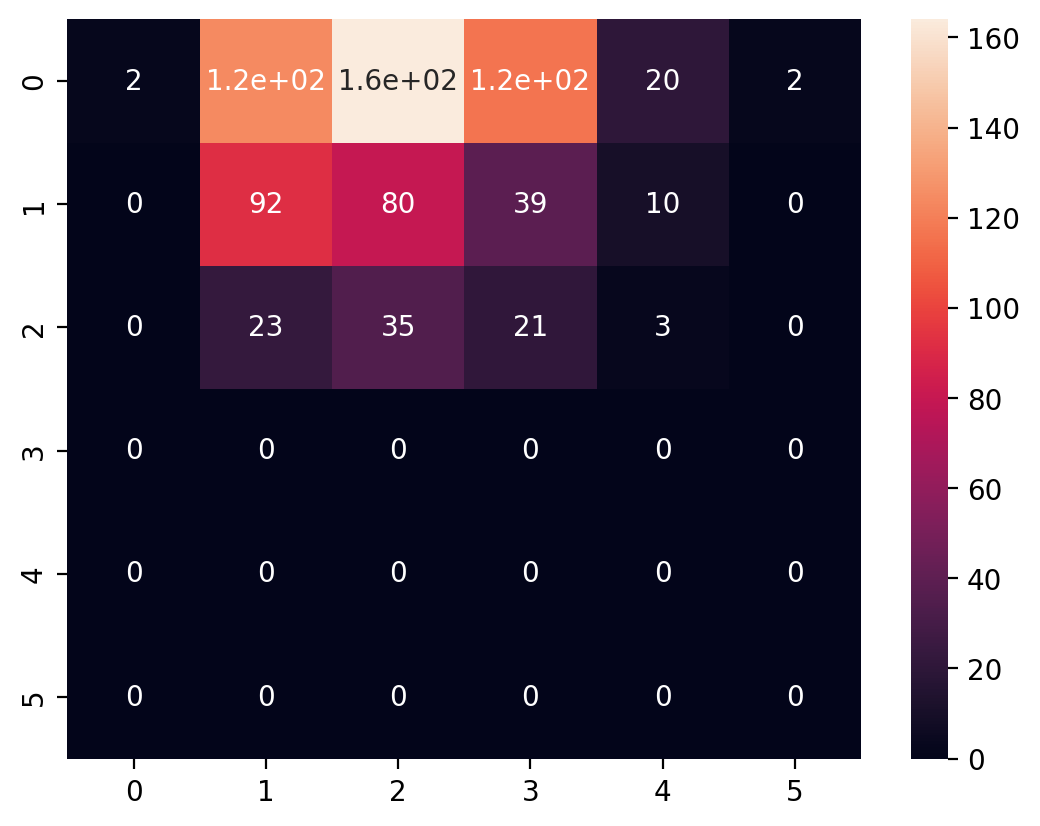

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 12s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 36s 469ms/step - loss: 24.6245 - root_mean_squared_error: 4.9623 - val_loss: 4.7277 - val_root_mean_squared_error: 2.1743
Epoch 2/50
37/37 [==============================] - 9s 235ms/step - loss: 3.0983 - root_mean_squared_error: 1.7602 - val_loss: 2.5365 - val_root_mean_squared_error: 1.5926
Epoch 3/50
37/37 [==============================] - 9s 243ms/step - loss: 3.1474 - root_mean_squared_error: 1.7741 - val_loss: 2.5090 - val_root_mean_squared_error: 1.5840
Epoch 4/50
37/37 [==============================] - 9s 232ms/step - loss: 3.1345 - root_mean_squared_error: 1.7705 - val_loss: 2.6466 - val_root_mean_squared_error: 1.6268
Epoch 5/50
37/37 [==============================] - 8s 228ms/step - loss: 3.1109 - root_mean_squared_error: 1.7638 - val_loss: 2.8377 - val_root_mean_squared_error: 1.6845
Epoch 6/50
37/37 [==============================] - 8s 229ms/step - loss: 2.9119 - root_mean_squared_error: 1.7064 - val_loss: 3.0007 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 214ms/step


predictions  actuals
0       2.007805      0.0
1       2.511298      0.0
2       0.900637      0.0
3       1.329539      0.0
4       0.539172      0.0
..           ...      ...
726     0.608562      0.0
727     0.913157      0.0
728     1.010100      0.0
729     1.988733      0.0
730     2.451493      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          2.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      0.0
727          1.0      0.0
728          1.0      0.0
729          2.0      0.0
730          2.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       428
         1.0       0.32      0.74      0.45       221
         2.0       0.10      0.24      0.15        82
         3.0       0.00      0.00      0.00         0

    accuracy                           0.25       731
   macro avg       0.11      0.25      0.15       731
weighted avg       0.11      0.25      0.15       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       428
         1.0       0.32      0.74      0.45       221
         2.0       0.10      0.24      0.15        82

   micro avg       0.26      0.25      0.26       731
   macro avg       0.14      0.33      0.20       731
weighted avg       0.11      0.25      0.15       731



<Axes: >

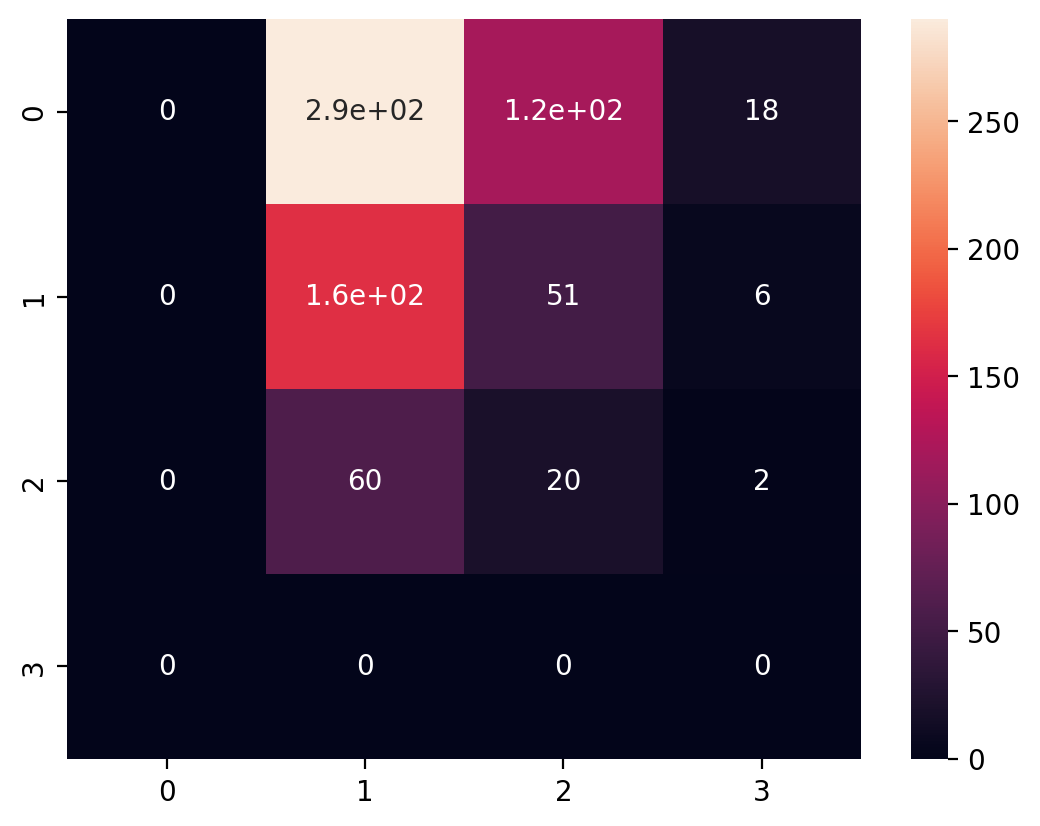

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 10s 190ms/step - loss: 7.7323 - root_mean_squared_error: 2.7807 - val_loss: 2.7162 - val_root_mean_squared_error: 1.6481
Epoch 2/50
37/37 [==============================] - 4s 122ms/step - loss: 2.9729 - root_mean_squared_error: 1.7242 - val_loss: 2.7402 - val_root_mean_squared_error: 1.6554
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 2.8643 - root_mean_squared_error: 1.6924 - val_loss: 2.4649 - val_root_mean_squared_error: 1.5700
Epoch 4/50
37/37 [==============================] - 5s 123ms/step - loss: 2.6094 - root_mean_squared_error: 1.6154 - val_loss: 2.4108 - val_root_mean_squared_error: 1.5527
Epoch 5/50
37/37 [==============================] - 5s 123ms/step - loss: 2.5577 - root_mean_squared_error: 1.5993 - val_loss: 2.4766 - val_root_mean_squared_error: 1.5737
Epoch 6/50
37/37 [==============================] - 4s 122ms/step - loss: 2.4427 - root_mean_squared_error: 1.5629 - val_loss: 2.2279 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 153ms/step


predictions  actuals
0       2.858325      0.0
1       3.631691      0.0
2       1.320005      0.0
3       0.219885      0.0
4       1.740677      0.0
..           ...      ...
726     0.715799      0.0
727     1.957346      0.0
728     1.628839      0.0
729     4.026074      0.0
730     2.502048      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<6.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            4.0      0.0
2            1.0      0.0
3            0.0      0.0
4            2.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          2.0      0.0
729          4.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<6.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            4.0      0.0
2            1.0      0.0
3            0.0      0.0
4            2.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          2.0      0.0
729          4.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.56      0.37      0.44       428
         1.0       0.28      0.21      0.24       221
         2.0       0.13      0.21      0.16        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.30       731
   macro avg       0.16      0.13      0.14       731
weighted avg       0.43      0.30      0.35       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.56      0.37      0.44       428
         1.0       0.28      0.21      0.24       221
         2.0       0.13      0.21      0.16        82

   micro avg       0.38      0.30      0.34       731
   macro avg       0.32      0.26      0.28       731
weighted avg       0.43      0.30      0.35       731



<Axes: >

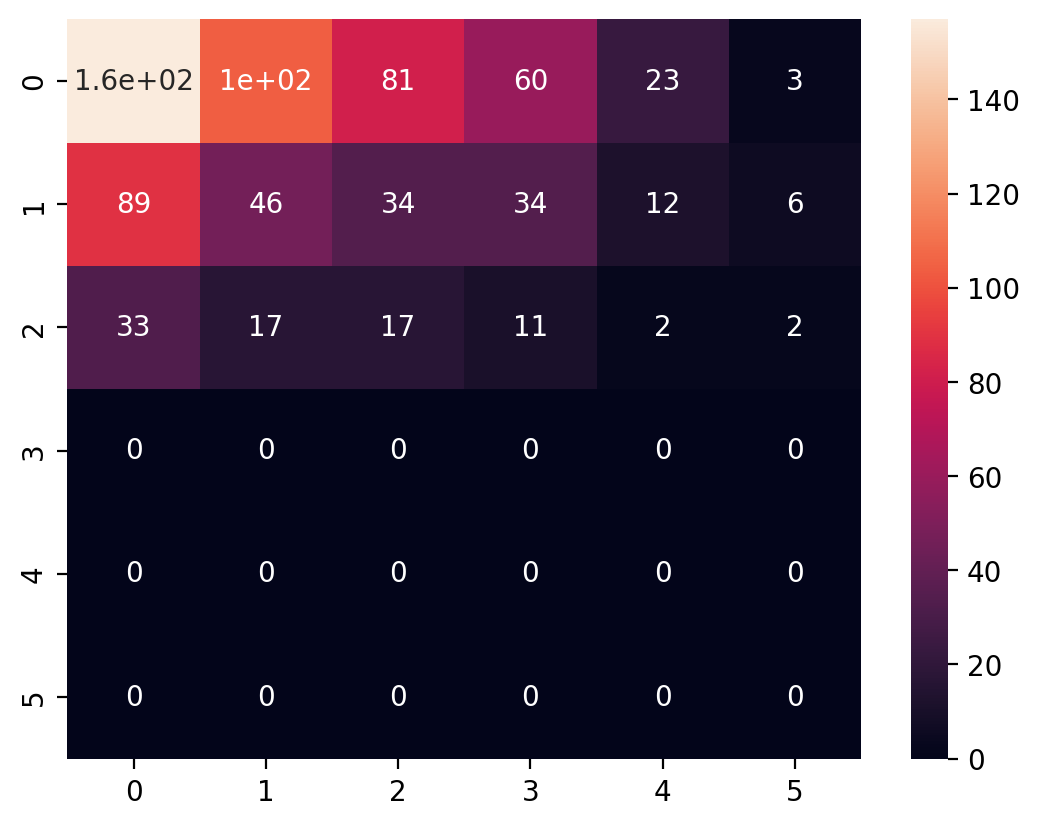

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font2)
        draw.text((10, 80), str(dat[4]), fill='white', font=font3)
        draw.text((10, 115), str(dat[7]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[15]), fill='white', font=font3)
        draw.text((90, 10), str(dat[11]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[17]), fill='white', font=font4)
        draw.text((90, 115), str(dat[14]), fill='white', font=font4)
        draw.text((90, 150), str(dat[8]), fill='white', font=font5)
        draw.text((90, 185), str(dat[13]), fill='white', font=font5)
        draw.text((170, 10), str(dat[12]), fill='white', font=font5)
        draw.text((170, 45), str(dat[2]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:289,1:289,2:289,3:289,4:289,5:289},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1734, 18)
After OverSampling, the shape of train_y: (1734,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[4.00000e-02, 9.39200e+01, 9.87000e+00, ..., 8.80000e+00,
        4.56000e+00, 4.24000e+00],
       [8.00000e-02, 9.42800e+01, 7.03000e+00, ..., 6.69000e+00,
        2.38000e+00, 4.31000e+00],
       [2.00000e+00, 9.39500e+01, 6.52000e+00, ..., 1.24100e+01,
        5.72000e+00, 6.69000e+00],
       ...,
       [9.70000e-03, 9.33862e+01, 8.16690e+00, ..., 9.92730e+00,
        1.57660e+00, 8.36040e+00],
       [9.00000e-04, 9.25441e+01, 3.68720e+00, ..., 1.95338e+01,
        1.01470e+00, 1.85191e+01],
       [0.00000e+00, 9.40967e+01, 5.63820e+00, ..., 7.37290e+00,
        3.39890e+00, 3.97400e+00]])

(1734, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


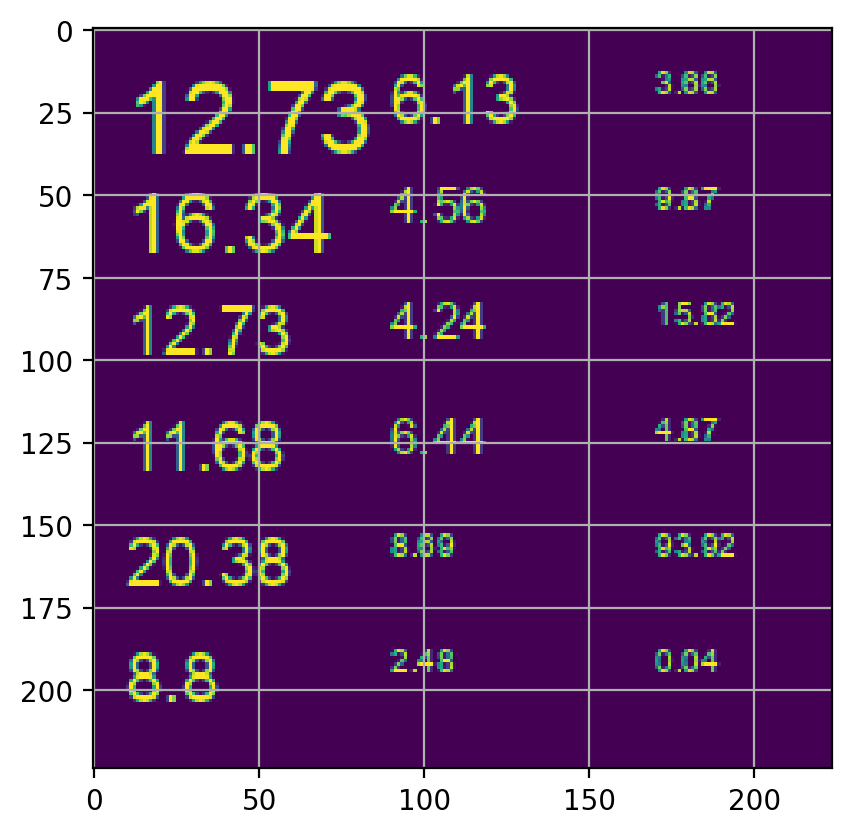

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1734, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1734,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 21s 140ms/step - loss: 19.2703 - root_mean_squared_error: 4.3898 - val_loss: 2.4762 - val_root_mean_squared_error: 1.5736
Epoch 2/50
109/109 [==============================] - 14s 125ms/step - loss: 3.0536 - root_mean_squared_error: 1.7474 - val_loss: 2.6588 - val_root_mean_squared_error: 1.6306
Epoch 3/50
109/109 [==============================] - 14s 126ms/step - loss: 3.0381 - root_mean_squared_error: 1.7430 - val_loss: 2.4557 - val_root_mean_squared_error: 1.5671
Epoch 4/50
109/109 [==============================] - 14s 125ms/step - loss: 2.9491 - root_mean_squared_error: 1.7173 - val_loss: 2.6133 - val_root_mean_squared_error: 1.6166
Epoch 5/50
109/109 [==============================] - 14s 125ms/step - loss: 2.9526 - root_mean_squared_error: 1.7183 - val_loss: 2.2355 - val_root_mean_squared_error: 1.4952
Epoch 6/50
109/109 [==============================] - 14s 124ms/step - loss: 2.6409 - root_mean_squared_error: 1.6251 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 92ms/step


predictions  actuals
0       1.322467      0.0
1       2.484358      0.0
2       1.131237      0.0
3       2.128570      0.0
4       1.655772      0.0
..           ...      ...
726     0.624098      0.0
727     1.597095      0.0
728     1.643253      0.0
729     2.725311      0.0
730     2.726244      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            2.0      0.0
2            1.0      0.0
3            2.0      0.0
4            2.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          2.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            2.0      0.0
2            1.0      0.0
3            2.0      0.0
4            2.0      0.0
..           ...      ...
726          1.0      0.0
727          2.0      0.0
728          2.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02       428
         1.0       0.35      0.56      0.43       221
         2.0       0.13      0.39      0.19        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.22       731
   macro avg       0.16      0.16      0.11       731
weighted avg       0.41      0.22      0.16       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02       428
         1.0       0.35      0.56      0.43       221
         2.0       0.13      0.39      0.19        82

   micro avg       0.26      0.22      0.24       731
   macro avg       0.33      0.32      0.21       731
weighted avg       0.41      0.22      0.16       731



<Axes: >

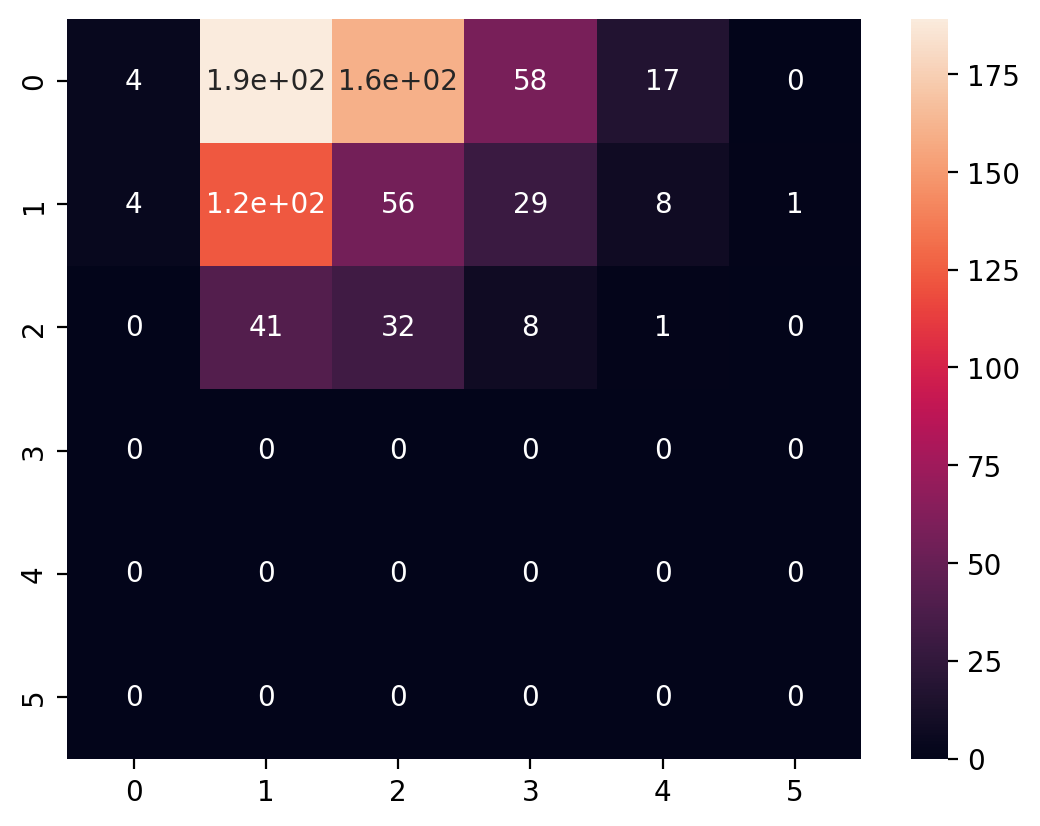

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 43s 248ms/step - loss: 44.2565 - root_mean_squared_error: 6.6526 - val_loss: 2.6493 - val_root_mean_squared_error: 1.6277
Epoch 2/50
109/109 [==============================] - 21s 193ms/step - loss: 3.7627 - root_mean_squared_error: 1.9398 - val_loss: 2.5277 - val_root_mean_squared_error: 1.5899
Epoch 3/50
109/109 [==============================] - 21s 193ms/step - loss: 3.4314 - root_mean_squared_error: 1.8524 - val_loss: 2.4607 - val_root_mean_squared_error: 1.5686
Epoch 4/50
109/109 [==============================] - 21s 192ms/step - loss: 3.3147 - root_mean_squared_error: 1.8206 - val_loss: 2.5259 - val_root_mean_squared_error: 1.5893
Epoch 5/50
109/109 [==============================] - 21s 191ms/step - loss: 3.2102 - root_mean_squared_error: 1.7917 - val_loss: 2.3381 - val_root_mean_squared_error: 1.5291
Epoch 6/50
109/109 [==============================] - 21s 192ms/step - loss: 2.9293 - root_mean_squared_error: 1.7115 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 156ms/step


predictions  actuals
0       2.208100      0.0
1       2.998813      0.0
2       2.526797      0.0
3       1.398472      0.0
4       0.618143      0.0
..           ...      ...
726     0.116243      0.0
727     1.156117      0.0
728     0.887629      0.0
729     3.480309      0.0
730     3.303298      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            3.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          1.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      0.0
1            3.0      0.0
2            3.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          1.0      0.0
729          3.0      0.0
730          3.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.46      0.11      0.18       428
         1.0       0.31      0.42      0.36       221
         2.0       0.13      0.30      0.19        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.23       731
   macro avg       0.18      0.17      0.14       731
weighted avg       0.38      0.23      0.23       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.46      0.11      0.18       428
         1.0       0.31      0.42      0.36       221
         2.0       0.13      0.30      0.19        82

   micro avg       0.28      0.23      0.25       731
   macro avg       0.30      0.28      0.24       731
weighted avg       0.38      0.23      0.23       731



<Axes: >

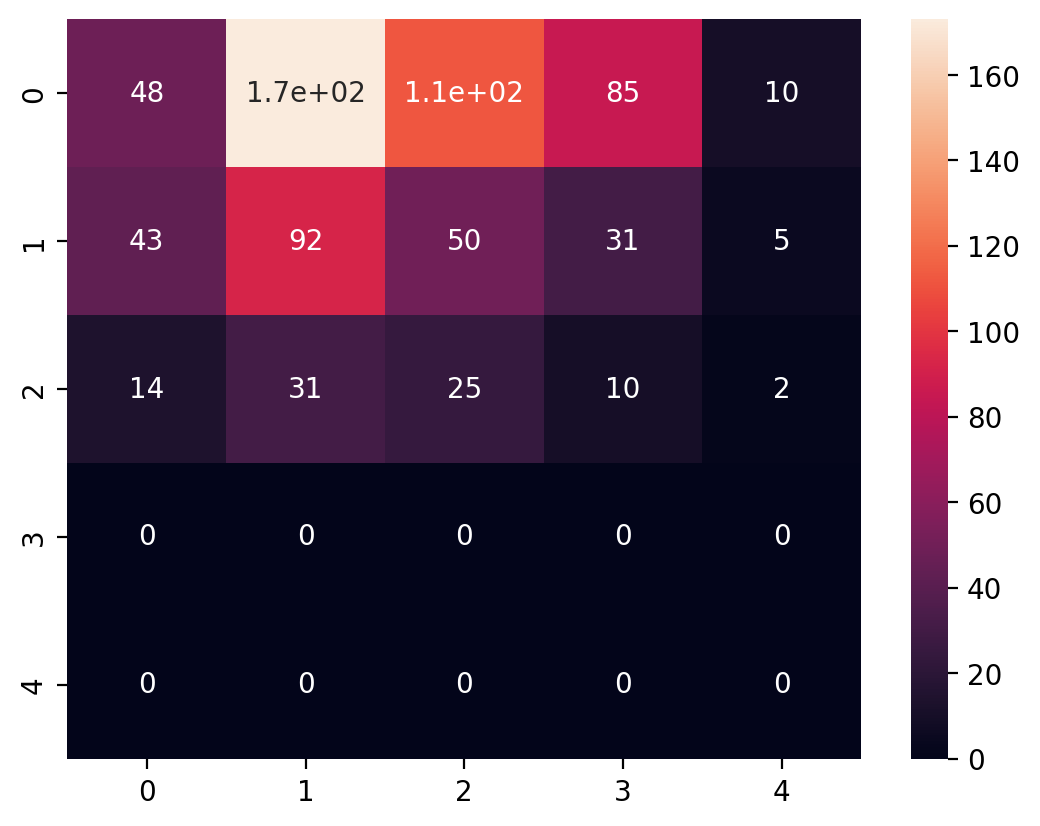

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
109/109 [==============================] - 13s 90ms/step - loss: 5.4213 - root_mean_squared_error: 2.3284 - val_loss: 2.7763 - val_root_mean_squared_error: 1.6662
Epoch 2/50
109/109 [==============================] - 9s 84ms/step - loss: 3.0241 - root_mean_squared_error: 1.7390 - val_loss: 2.3559 - val_root_mean_squared_error: 1.5349
Epoch 3/50
109/109 [==============================] - 9s 85ms/step - loss: 2.6225 - root_mean_squared_error: 1.6194 - val_loss: 2.2814 - val_root_mean_squared_error: 1.5104
Epoch 4/50
109/109 [==============================] - 9s 85ms/step - loss: 2.5762 - root_mean_squared_error: 1.6051 - val_loss: 2.2176 - val_root_mean_squared_error: 1.4892
Epoch 5/50
109/109 [==============================] - 9s 85ms/step - loss: 2.3492 - root_mean_squared_error: 1.5327 - val_loss: 2.2257 - val_root_mean_squared_error: 1.4919
Epoch 6/50
109/109 [==============================] - 9s 85ms/step - loss: 2.2581 - root_mean_squared_error: 1.5027 - val_loss: 2.2149

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 114ms/step


predictions  actuals
0       2.947356      0.0
1       3.096204      0.0
2       1.218164      0.0
3      -0.158484      0.0
4       0.758941      0.0
..           ...      ...
726     0.388135      0.0
727     1.411460      0.0
728     1.510347      0.0
729     1.870726      0.0
730     0.399180      0.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<6.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            1.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          2.0      0.0
729          2.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<6.5)] = 5
test_results

predictions  actuals
0            3.0      0.0
1            3.0      0.0
2            1.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          0.0      0.0
727          1.0      0.0
728          2.0      0.0
729          2.0      0.0
730          0.0      0.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.58      0.29      0.38       428
         1.0       0.32      0.37      0.34       221
         2.0       0.08      0.17      0.11        82
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.30       731
   macro avg       0.20      0.17      0.17       731
weighted avg       0.45      0.30      0.34       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.58      0.29      0.38       428
         1.0       0.32      0.37      0.34       221
         2.0       0.08      0.17      0.11        82

   micro avg       0.34      0.30      0.32       731
   macro avg       0.33      0.28      0.28       731
weighted avg       0.45      0.30      0.34       731



<Axes: >

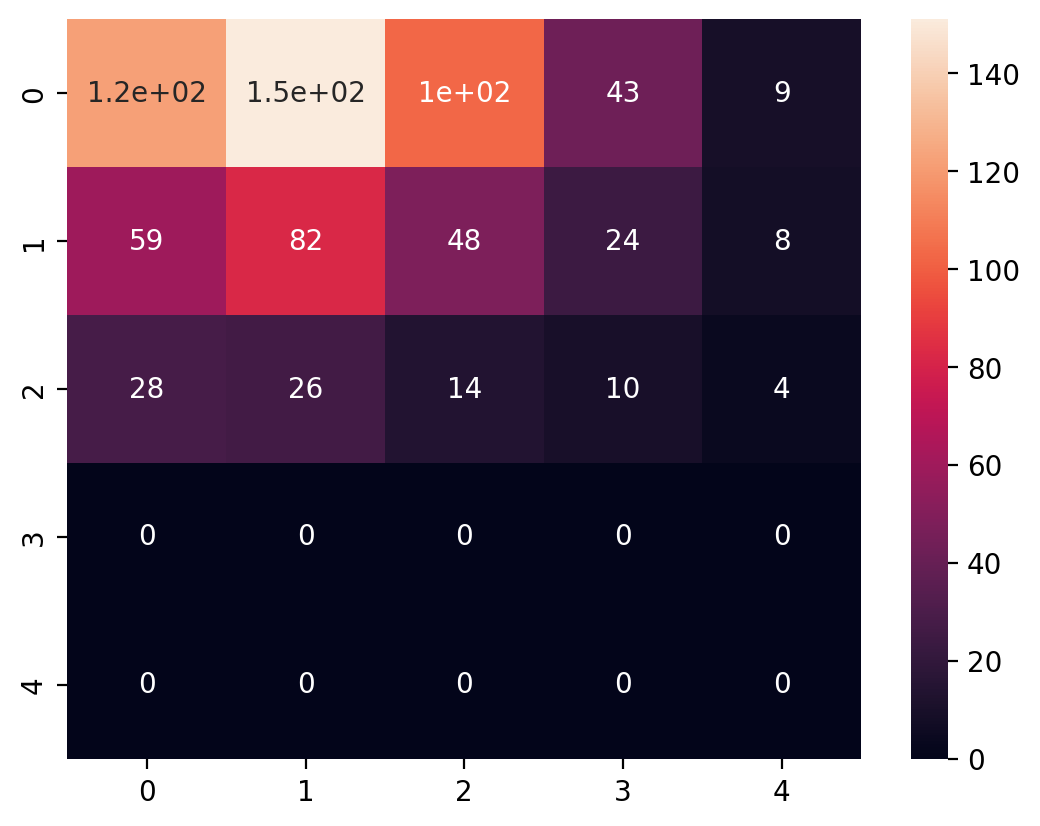

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##Coconino, Arizona

###train

In [ ]:
coconino = train[train['fips']==4005]

#using interpolation to fill in the NaN values
coconino = coconino.interpolate().fillna(method='bfill')
coconino.score[coconino.score <0.5] = 0
coconino.score[(coconino.score >=0.5)&(coconino.score<1.5)] = 1
coconino.score[(coconino.score >=1.5)&(coconino.score<2.5)] = 2
coconino.score[(coconino.score >=2.5)&(coconino.score<3.5)] = 3
coconino.score[(coconino.score >=3.5)&(coconino.score<4.5)] = 4
coconino.score[(coconino.score >=4.5)&(coconino.score<5.5)] = 5
coconino

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  \
428490  4005  2000-01-01     3.91  80.61  3.28 -1.29   -4.81   -4.79     2.95   
428491  4005  2000-01-02     2.85  80.59  2.74 -3.71   -7.50   -7.40     0.23   
428492  4005  2000-01-03     0.41  81.64  1.47 -6.16  -13.91  -13.57     0.36   
428493  4005  2000-01-04     0.49  81.83  1.74 -4.09  -12.43  -12.11     3.21   
428494  4005  2000-01-05     0.48  81.24  2.23 -2.88   -9.41   -9.29     3.71   
...      ...         ...      ...    ...   ...   ...     ...     ...      ...   
434695  4005  2016-12-27     0.00  81.75  2.94  0.89   -6.18   -6.07     9.01   
434696  4005  2016-12-28     0.00  81.82  2.95  1.72   -5.97   -5.89     8.97   
434697  4005  2016-12-29     0.01  81.98  2.84  0.31   -6.37   -6.31     7.25   
434698  4005  2016-12-30     3.19  81.17  4.19  3.09   -1.95   -1.92    10.90   
434699  4005  2016-12-31     6.33  80.52  4.85  1.96    0.32    0.32     6.81   

        T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
428490    -4.15       7.09 -1.60   4.80       8.89       2.66         6.23   
428491    -9.18       9.41 -4.35   4.67       7.33       2.98         4.35   
428492   -10.43      10.79 -7.25   3.62       6.42       2.44         3.98   
428493   -10.82      14.03 -5.44   2.30       3.58       1.70         1.88   
428494    -7.09      10.81 -4.17   3.21       4.69       2.22         2.47   
...         ...        ...   ...    ...        ...        ...          ...   
434695    -4.68      13.68 -2.21   1.52       2.21       0.56         1.65   
434696    -1.72      10.69 -1.11   2.18       2.63       1.41         1.22   
434697    -4.33      11.57 -1.19   3.04       4.95       0.29         4.67   
434698    -0.82      11.72  1.22   2.18       4.68       0.49         4.19   
434699    -1.02       7.83  1.47   2.50       4.06       1.35         2.71   

        WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
428490   6.96      10.79       4.05         6.74    0.0  
428491   6.96       9.16       5.22         3.93    0.0  
428492   5.31       7.78       4.00         3.78    0.0  
428493   3.08       4.26       2.42         1.84    0.0  
428494   4.85       6.95       3.31         3.63    0.0  
...       ...        ...        ...          ...    ...  
434695   2.15       3.72       0.67         3.05    0.0  
434696   3.14       3.96       1.64         2.32    0.0  
434697   4.35       5.68       0.37         5.31    0.0  
434698   3.29       5.82       0.68         5.14    0.0  
434699   3.68       4.61       2.13         2.48    0.0  

[6210 rows x 21 columns]

###val

In [ ]:
az_val = validation[validation['fips']==4005]

#using interpolation to fill in the NaN values
az_val = az_val.interpolate().fillna(method='bfill')
az_val.score[az_val.score <0.5] = 0
az_val.score[(az_val.score >=0.5)&(az_val.score<1.5)] = 1
az_val.score[(az_val.score >=1.5)&(az_val.score<2.5)] = 2
az_val.score[(az_val.score >=2.5)&(az_val.score<3.5)] = 3
az_val.score[(az_val.score >=3.5)&(az_val.score<4.5)] = 4
az_val.score[(az_val.score >=4.5)&(az_val.score<5.5)] = 5

az_val

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  \
50370  4005  2017-01-01     3.18  80.25  4.61  1.17   -0.41   -0.40     6.35   
50371  4005  2017-01-02     0.14  80.70  4.01 -0.33   -2.18   -2.17     2.23   
50372  4005  2017-01-03     0.00  81.17  4.04  0.47   -2.02   -2.02     5.57   
50373  4005  2017-01-04     0.06  80.91  4.19  1.96   -1.72   -1.71     8.99   
50374  4005  2017-01-05     4.01  80.40  5.57  3.96    2.20    2.20     7.86   
...     ...         ...      ...    ...   ...   ...     ...     ...      ...   
51095  4005  2018-12-27     1.66  80.29  2.06 -3.48  -10.99  -10.26    -0.59   
51096  4005  2018-12-28     0.36  80.64  1.71 -5.76  -13.23  -12.17    -3.26   
51097  4005  2018-12-29     0.00  81.41  1.48 -6.85  -14.93  -13.52    -1.08   
51098  4005  2018-12-30     0.01  80.80  2.29 -3.26   -9.53   -9.38     4.74   
51099  4005  2018-12-31     6.53  80.20  2.31 -4.86   -9.51   -9.06    -2.27   

       T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
50370    -0.99       7.34  0.91   3.31       5.47       0.65         4.82   
50371    -2.39       4.62 -0.57   7.72      10.29       4.96         5.33   
50372    -2.37       7.94  0.36   3.67       5.59       2.50         3.09   
50373    -2.88      11.87  1.60   6.27      10.30       3.45         6.86   
50374     1.06       6.80  3.76   9.42      11.72       7.46         4.26   
...        ...        ...   ...    ...        ...        ...          ...   
51095    -5.43       4.83 -3.45   2.39       3.30       1.27         2.03   
51096    -8.66       5.41 -5.03   3.80       5.33       2.52         2.81   
51097   -10.97       9.89 -6.85   3.54       6.00       2.03         3.98   
51098    -8.72      13.46 -3.43   2.54       5.35       1.20         4.14   
51099    -8.99       6.72 -4.85   4.15       5.83       2.76         3.07   

       WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
50370   4.97       8.35       0.95         7.40    0.0  
50371  10.45      12.62       7.99         4.63    0.0  
50372   5.43       8.26       4.06         4.20    0.0  
50373   9.00      12.65       6.13         6.53    0.0  
50374  12.45      15.59      10.32         5.27    0.0  
...      ...        ...        ...          ...    ...  
51095   3.26       4.13       1.85         2.28    2.0  
51096   4.93       6.15       4.03         2.12    2.0  
51097   5.01       6.81       3.68         3.14    2.0  
51098   3.90       7.64       1.36         6.27    2.0  
51099   5.52       8.17       3.20         4.97    2.0  

[730 rows x 21 columns]

In [ ]:
az_val['score'].value_counts()

0.0    295
3.0    183
2.0    140
4.0     76
1.0     36
Name: score, dtype: int64

In [ ]:
az_val = az_val.round(4)

In [ ]:
X = az_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = az_val['score']

###xgboost feature importance

In [ ]:
X_train = coconino[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = coconino['score']

In [ ]:
X_val = az_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = az_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

-0.005137326885316984
0.4057454912734465
2.185139124474726


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 2.2326669692993164,
 'f1': 2.215754985809326,
 'f2': 3.625497341156006,
 'f3': 3.4249958992004395,
 'f4': 6.231613636016846,
 'f5': 5.023643493652344,
 'f6': 4.13844633102417,
 'f7': 4.03819465637207,
 'f8': 3.4885284900665283,
 'f9': 7.030448913574219,
 'f10': 2.5650198459625244,
 'f11': 3.1063854694366455,
 'f12': 2.9975180625915527,
 'f13': 3.4424967765808105,
 'f14': 4.0500168800354,
 'f15': 4.072756767272949,
 'f16': 3.406144380569458,
 'f17': 3.513425350189209}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 2.2326669692993164,
 'f1': 2.215754985809326,
 'f2': 3.625497341156006,
 'f3': 3.4249958992004395,
 'f4': 6.231613636016846,
 'f5': 5.023643493652344,
 'f6': 4.13844633102417,
 'f7': 4.03819465637207,
 'f8': 3.4885284900665283,
 'f9': 7.030448913574219,
 'f10': 2.5650198459625244,
 'f11': 3.1063854694366455,
 'f12': 2.9975180625915527,
 'f13': 3.4424967765808105,
 'f14': 4.0500168800354,
 'f15': 4.072756767272949,
 'f16': 3.406144380569458,
 'f17': 3.513425350189209}

In [ ]:
importance_df

0
f0   2.232667
f1   2.215755
f2   3.625497
f3   3.424996
f4   6.231614
f5   5.023643
f6   4.138446
f7   4.038195
f8   3.488528
f9   7.030449
f10  2.565020
f11  3.106385
f12  2.997518
f13  3.442497
f14  4.050017
f15  4.072757
f16  3.406144
f17  3.513425

<Axes: >

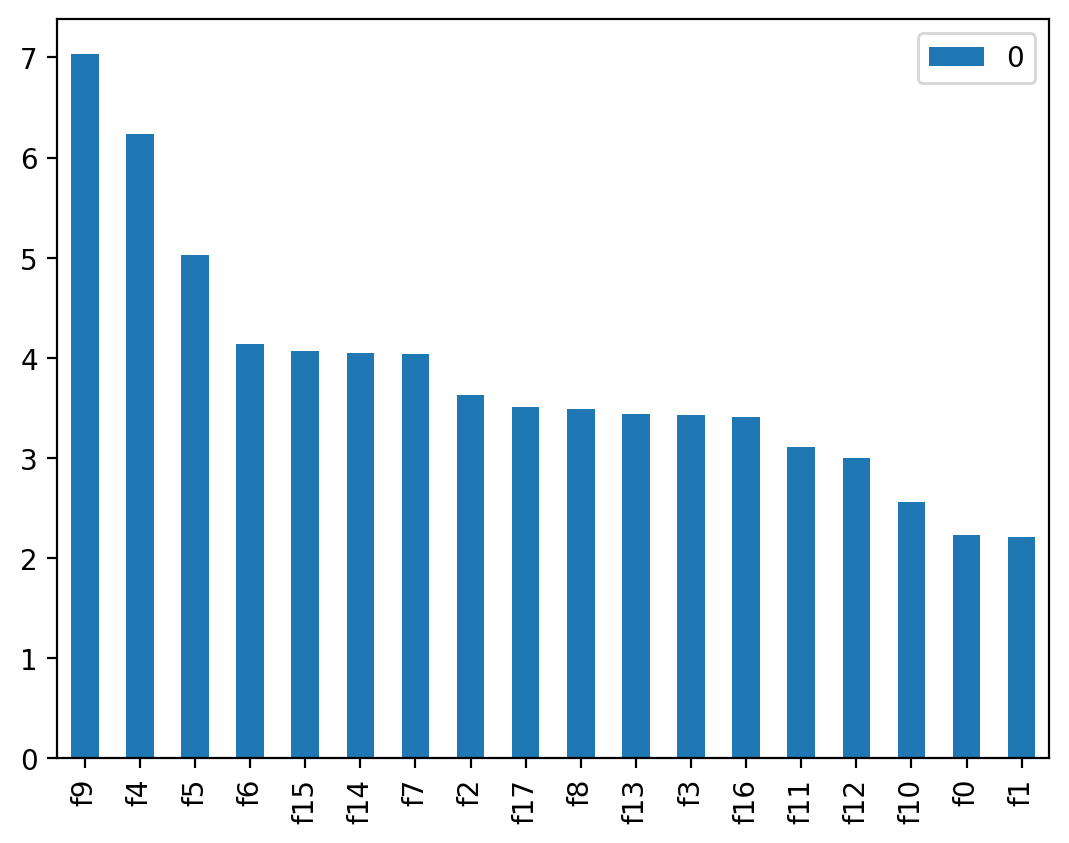

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. TS
2. T2MDEW
3. T2MWET
4. T2M_MAX
5. WS50M_MAX
6. WS50M
7. T2M_MIN
8. QV2M
9. WS50M_RANGE
10. T2M_RANGE
11. WS10M_RANGE
12. T2M
13. WS50M_MIN
14. WS10M_MAX
15. WS10M_MIN
16. WS10M
17. PRECTOT
18. PS

###test

In [ ]:
az_test = test[test['fips']==4005]

#using interpolation to fill in the NaN values
az_test = az_test.interpolate().fillna(method='bfill')
az_test.score[az_test.score <0.5] = 0
az_test.score[(az_test.score >=0.5)&(az_test.score<1.5)] = 1
az_test.score[(az_test.score >=1.5)&(az_test.score<2.5)] = 2
az_test.score[(az_test.score >=2.5)&(az_test.score<3.5)] = 3
az_test.score[(az_test.score >=3.5)&(az_test.score<4.5)] = 4
az_test.score[(az_test.score >=4.5)&(az_test.score<5.5)] = 5

az_test.head()

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
50439  4005  2019-01-01     0.05  80.84  1.33 -10.24  -16.21  -14.70    -6.26   
50440  4005  2019-01-02     0.00  81.23  1.29 -10.52  -16.55  -15.06    -3.54   
50441  4005  2019-01-03     0.00  81.48  1.78  -5.47  -12.62  -12.04     1.28   
50442  4005  2019-01-04     0.00  81.33  2.51  -2.58   -8.29   -8.04     5.72   
50443  4005  2019-01-05     1.16  81.05  3.08  -0.69   -5.67   -5.58     3.15   

       T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
50439   -13.84       7.58 -10.48   4.15       6.08       2.69         3.39   
50440   -15.51      11.97 -11.24   4.60       7.73       1.79         5.94   
50441   -11.34      12.62  -6.98   2.07       3.44       1.30         2.14   
50442    -9.29      15.02  -4.34   2.44       3.14       1.76         1.38   
50443    -4.31       7.46  -2.40   2.46       3.37       1.55         1.82   

       WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
50439   5.48       7.01       4.07         2.94    2.0  
50440   5.97       8.94       2.97         5.97    2.0  
50441   2.82       3.76       2.07         1.69    2.0  
50442   3.40       4.48       2.64         1.84    2.0  
50443   3.87       5.32       2.31         3.01    2.0

In [ ]:
az_test = az_test.round(4)
az_test

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
50439  4005  2019-01-01     0.05  80.84  1.33 -10.24  -16.21  -14.70    -6.26   
50440  4005  2019-01-02     0.00  81.23  1.29 -10.52  -16.55  -15.06    -3.54   
50441  4005  2019-01-03     0.00  81.48  1.78  -5.47  -12.62  -12.04     1.28   
50442  4005  2019-01-04     0.00  81.33  2.51  -2.58   -8.29   -8.04     5.72   
50443  4005  2019-01-05     1.16  81.05  3.08  -0.69   -5.67   -5.58     3.15   
...     ...         ...      ...    ...   ...    ...     ...     ...      ...   
51165  4005  2020-12-27     0.47  81.05  3.16   0.08   -5.31   -2.61     4.08   
51166  4005  2020-12-28     1.39  80.41  3.26  -0.08   -5.01   -2.54     7.58   
51167  4005  2020-12-29     0.30  80.89  2.71  -2.69   -7.36   -5.02     1.12   
51168  4005  2020-12-30     0.00  81.37  1.46  -3.18  -15.13   -9.15     2.83   
51169  4005  2020-12-31     0.35  80.84  1.95  -2.88  -11.61   -7.24     0.60   

       T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
50439   -13.84       7.58 -10.48   4.15       6.08       2.69         3.39   
50440   -15.51      11.97 -11.24   4.60       7.73       1.79         5.94   
50441   -11.34      12.62  -6.98   2.07       3.44       1.30         2.14   
50442    -9.29      15.02  -4.34   2.44       3.14       1.76         1.38   
50443    -4.31       7.46  -2.40   2.46       3.37       1.55         1.82   
...        ...        ...    ...    ...        ...        ...          ...   
51165    -2.52       6.60  -0.33   1.83       2.84       0.11         2.73   
51166    -4.23      11.81  -0.34   4.77      10.87       2.27         8.60   
51167    -6.14       7.26  -2.69   2.36       4.42       0.30         4.12   
51168    -8.66      11.49  -4.51   3.01       5.83       0.84         5.00   
51169    -6.02       6.63  -3.78   1.84       2.89       0.62         2.27   

       WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
50439   5.48       7.01       4.07         2.94    2.0  
50440   5.97       8.94       2.97         5.97    2.0  
50441   2.82       3.76       2.07         1.69    2.0  
50442   3.40       4.48       2.64         1.84    2.0  
50443   3.87       5.32       2.31         3.01    2.0  
...      ...        ...        ...          ...    ...  
51165   3.03       5.56       0.32         5.25    5.0  
51166   7.00      13.52       4.32         9.20    5.0  
51167   3.50       5.26       0.49         4.77    5.0  
51168   4.26       6.71       1.18         5.54    5.0  
51169   2.98       5.23       0.52         4.70    5.0  

[731 rows x 21 columns]

In [ ]:
az_test['score'].value_counts()

2.0    211
1.0    166
0.0    156
4.0     78
3.0     77
5.0     43
Name: score, dtype: int64

In [ ]:
X_test = az_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = az_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method 

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


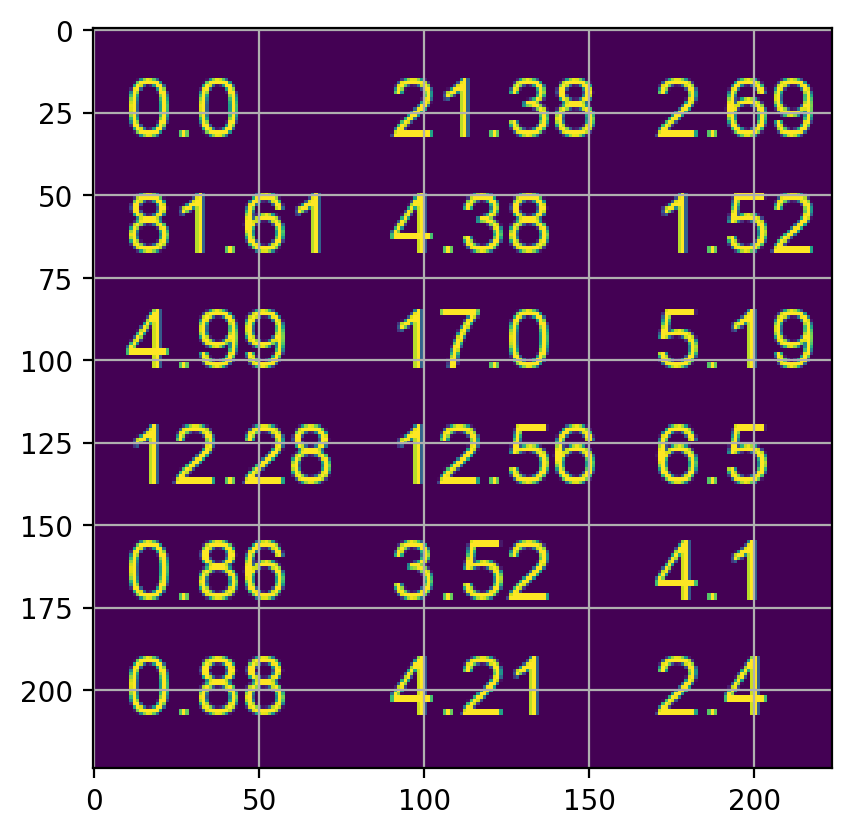

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 15s 242ms/step - loss: 89.4936 - root_mean_squared_error: 9.4601 - val_loss: 2.2038 - val_root_mean_squared_error: 1.4845
Epoch 2/50
37/37 [==============================] - 5s 147ms/step - loss: 3.2992 - root_mean_squared_error: 1.8164 - val_loss: 2.3851 - val_root_mean_squared_error: 1.5444
Epoch 3/50
37/37 [==============================] - 5s 143ms/step - loss: 2.8522 - root_mean_squared_error: 1.6889 - val_loss: 2.1853 - val_root_mean_squared_error: 1.4783
Epoch 4/50
37/37 [==============================] - 6s 151ms/step - loss: 2.8241 - root_mean_squared_error: 1.6805 - val_loss: 2.0842 - val_root_mean_squared_error: 1.4437
Epoch 5/50
37/37 [==============================] - 5s 149ms/step - loss: 2.6442 - root_mean_squared_error: 1.6261 - val_loss: 2.0027 - val_root_mean_squared_error: 1.4152
Epoch 6/50
37/37 [==============================] - 6s 150ms/step - loss: 2.4608 - root_mean_squared_error: 1.5687 - val_loss: 2.4887 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 98ms/step


predictions  actuals
0       2.699401      2.0
1       3.592641      2.0
2       1.574363      2.0
3       0.603153      2.0
4       1.425387      2.0
..           ...      ...
726     0.448420      5.0
727     0.813233      5.0
728     0.275025      5.0
729     0.753390      5.0
730     1.069768      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      2.0
1            4.0      2.0
2            2.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          0.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      2.0
1            4.0      2.0
2            2.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          0.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.23      0.23      0.23       156
         1.0       0.27      0.45      0.34       166
         2.0       0.30      0.31      0.31       211
         3.0       0.10      0.10      0.10        77
         4.0       0.17      0.01      0.02        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.25       731
   macro avg       0.18      0.18      0.17       731
weighted avg       0.23      0.25      0.23       731



<Axes: >

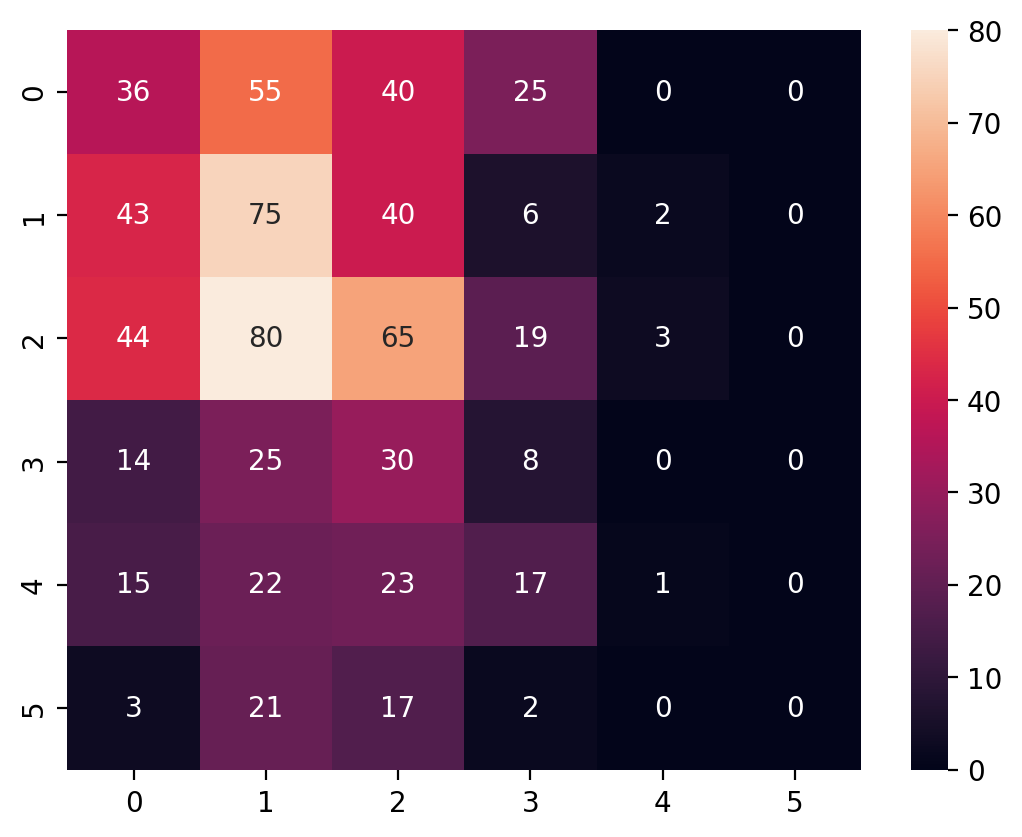

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 38s 434ms/step - loss: 53.3970 - root_mean_squared_error: 7.3073 - val_loss: 2.4129 - val_root_mean_squared_error: 1.5534
Epoch 2/50
37/37 [==============================] - 9s 238ms/step - loss: 3.0745 - root_mean_squared_error: 1.7534 - val_loss: 2.6232 - val_root_mean_squared_error: 1.6196
Epoch 3/50
37/37 [==============================] - 10s 280ms/step - loss: 2.3848 - root_mean_squared_error: 1.5443 - val_loss: 2.2159 - val_root_mean_squared_error: 1.4886
Epoch 4/50
37/37 [==============================] - 8s 228ms/step - loss: 2.4093 - root_mean_squared_error: 1.5522 - val_loss: 2.3280 - val_root_mean_squared_error: 1.5258
Epoch 5/50
37/37 [==============================] - 8s 230ms/step - loss: 2.1191 - root_mean_squared_error: 1.4557 - val_loss: 2.0902 - val_root_mean_squared_error: 1.4457
Epoch 6/50
37/37 [==============================] - 8s 226ms/step - loss: 2.0235 - root_mean_squared_error: 1.4225 - val_loss: 2.5137 - v

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 169ms/step


predictions  actuals
0       2.193336      2.0
1       2.546764      2.0
2       1.824538      2.0
3       2.133739      2.0
4       0.448682      2.0
..           ...      ...
726     0.431840      5.0
727     0.072822      5.0
728     0.102596      5.0
729     1.859295      5.0
730     2.009271      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          0.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          0.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.30      0.24      0.27       156
         1.0       0.24      0.33      0.28       166
         2.0       0.34      0.48      0.39       211
         3.0       0.01      0.01      0.01        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.27       731
   macro avg       0.15      0.18      0.16       731
weighted avg       0.22      0.27      0.24       731



<Axes: >

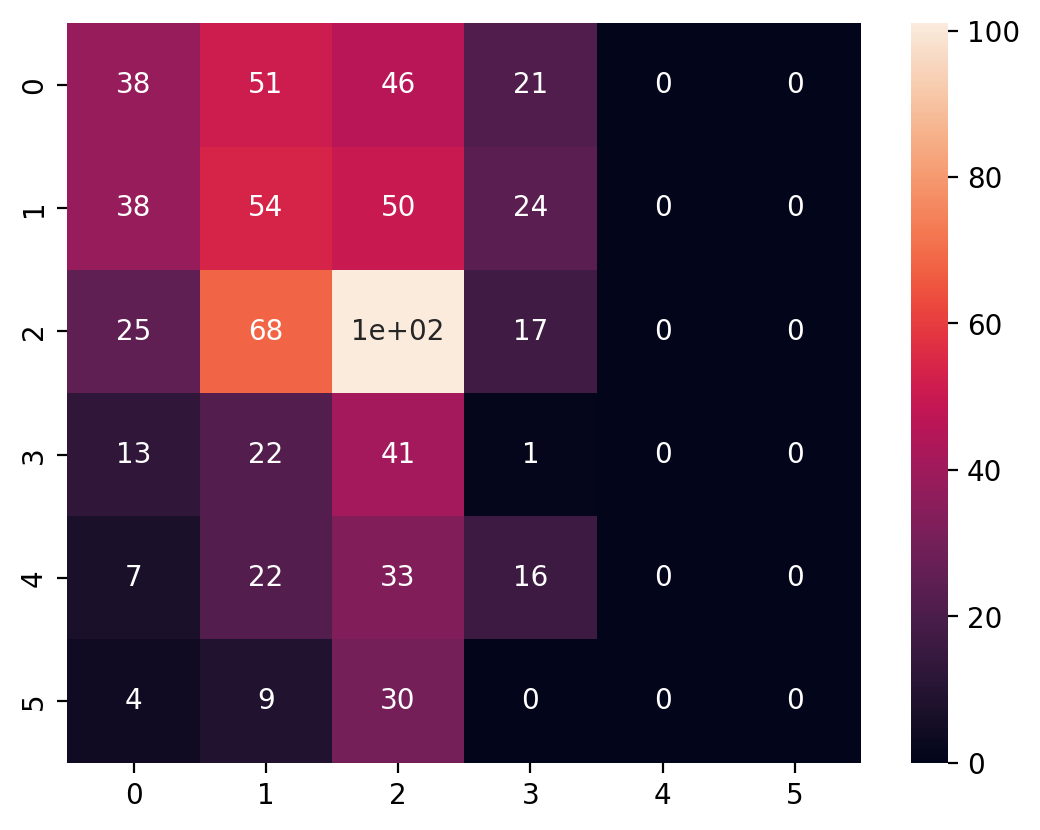

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 8s 139ms/step - loss: 3.9807 - root_mean_squared_error: 1.9952 - val_loss: 4.3161 - val_root_mean_squared_error: 2.0775
Epoch 2/50
37/37 [==============================] - 4s 120ms/step - loss: 2.9035 - root_mean_squared_error: 1.7040 - val_loss: 2.2614 - val_root_mean_squared_error: 1.5038
Epoch 3/50
37/37 [==============================] - 5s 139ms/step - loss: 2.5505 - root_mean_squared_error: 1.5970 - val_loss: 2.1904 - val_root_mean_squared_error: 1.4800
Epoch 4/50
37/37 [==============================] - 5s 124ms/step - loss: 2.3111 - root_mean_squared_error: 1.5202 - val_loss: 2.3130 - val_root_mean_squared_error: 1.5209
Epoch 5/50
37/37 [==============================] - 5s 136ms/step - loss: 2.4981 - root_mean_squared_error: 1.5805 - val_loss: 2.1981 - val_root_mean_squared_error: 1.4826
Epoch 6/50
37/37 [==============================] - 5s 137ms/step - loss: 2.3812 - root_mean_squared_error: 1.5431 - val_loss: 2.1740 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 153ms/step


predictions  actuals
0       2.764176      2.0
1       3.835166      2.0
2       0.558758      2.0
3       0.234057      2.0
4       2.688595      2.0
..           ...      ...
726     0.069385      5.0
727     0.125013      5.0
728     1.726345      5.0
729     1.521799      5.0
730     0.101579      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      2.0
1            4.0      2.0
2            1.0      2.0
3            0.0      2.0
4            3.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          2.0      5.0
729          2.0      5.0
730          0.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      2.0
1            4.0      2.0
2            1.0      2.0
3            0.0      2.0
4            3.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          2.0      5.0
729          2.0      5.0
730          0.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.26      0.40      0.32       156
         1.0       0.23      0.20      0.22       166
         2.0       0.33      0.33      0.33       211
         3.0       0.10      0.16      0.12        77
         4.0       0.11      0.03      0.04        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.17      0.19      0.17       731
weighted avg       0.23      0.24      0.23       731



<Axes: >

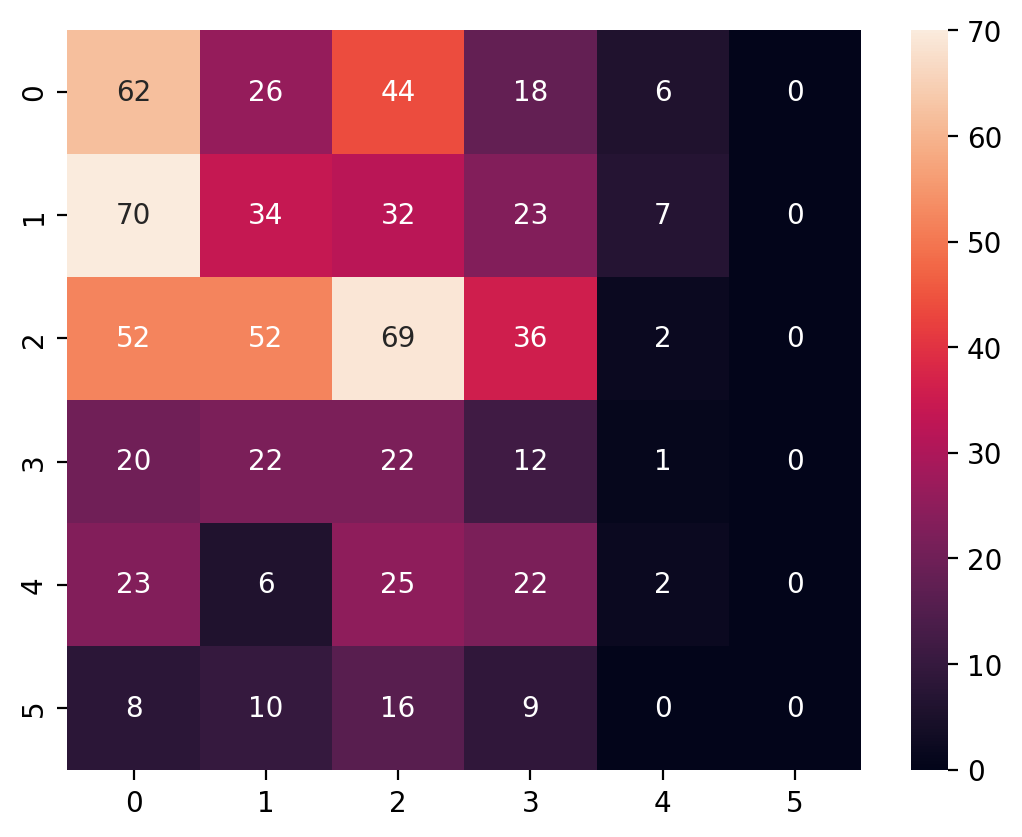

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling dgn smote 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:295,1:295,2:295,3:295,4:295},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1475, 18)
After OverSampling, the shape of train_y: (1475,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[0.00000e+00, 8.16100e+01, 4.99000e+00, ..., 6.50000e+00,
        4.10000e+00, 2.40000e+00],
       [0.00000e+00, 8.05400e+01, 3.04000e+00, ..., 1.18500e+01,
        5.75000e+00, 6.10000e+00],
       [0.00000e+00, 8.14500e+01, 2.01000e+00, ..., 1.13800e+01,
        3.75000e+00, 7.63000e+00],
       ...,
       [0.00000e+00, 8.12642e+01, 3.29110e+00, ..., 7.10570e+00,
        1.88890e+00, 5.21680e+00],
       [6.20000e-03, 8.09587e+01, 3.68850e+00, ..., 1.10452e+01,
        2.70630e+00, 8.34510e+00],
       [1.30400e-01, 8.18637e+01, 6.49470e+00, ..., 5.20490e+00,
        8.37600e-01, 4.36730e+00]])

(1475, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


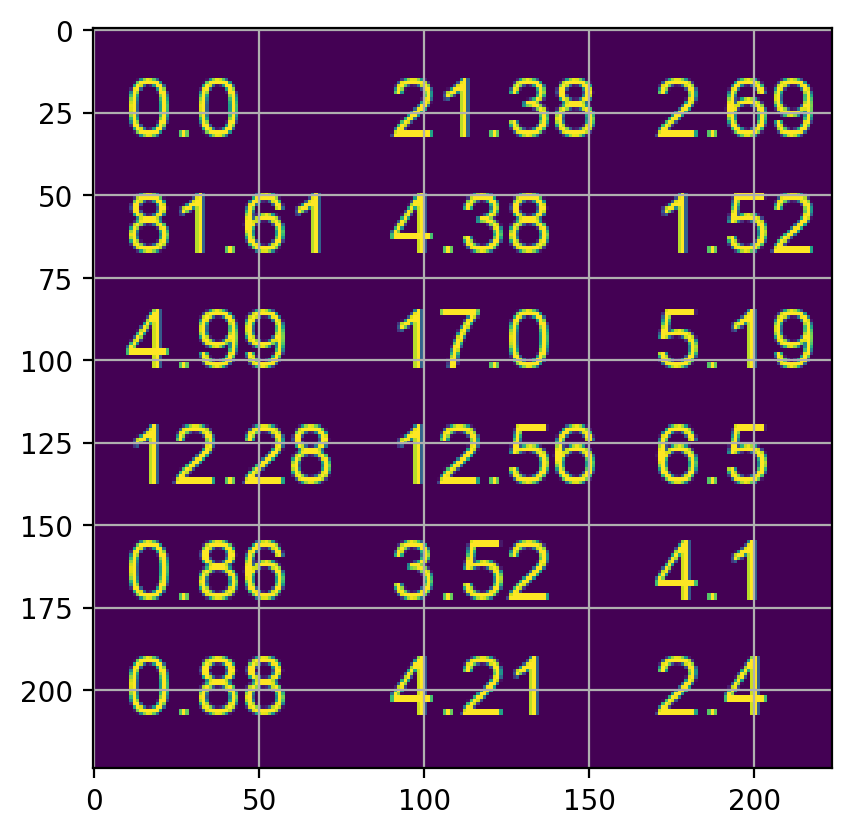

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1475, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1475,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 21s 153ms/step - loss: 52.5509 - root_mean_squared_error: 7.2492 - val_loss: 2.2194 - val_root_mean_squared_error: 1.4898
Epoch 2/50
93/93 [==============================] - 12s 126ms/step - loss: 3.3463 - root_mean_squared_error: 1.8293 - val_loss: 2.4478 - val_root_mean_squared_error: 1.5645
Epoch 3/50
93/93 [==============================] - 12s 129ms/step - loss: 3.0159 - root_mean_squared_error: 1.7366 - val_loss: 2.2918 - val_root_mean_squared_error: 1.5139
Epoch 4/50
93/93 [==============================] - 12s 128ms/step - loss: 3.2221 - root_mean_squared_error: 1.7950 - val_loss: 2.1953 - val_root_mean_squared_error: 1.4817
Epoch 5/50
93/93 [==============================] - 12s 129ms/step - loss: 3.0775 - root_mean_squared_error: 1.7543 - val_loss: 2.2525 - val_root_mean_squared_error: 1.5008
Epoch 6/50
93/93 [==============================] - 12s 127ms/step - loss: 3.0583 - root_mean_squared_error: 1.7488 - val_loss: 2.2505

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 92ms/step


predictions  actuals
0       2.352825      2.0
1       2.985995      2.0
2       1.031584      2.0
3       0.712126      2.0
4       0.847022      2.0
..           ...      ...
726     0.441630      5.0
727     0.718919      5.0
728     0.543607      5.0
729     1.296772      5.0
730     0.997753      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          1.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            1.0      2.0
3            1.0      2.0
4            1.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          1.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.28      0.18      0.22       156
         1.0       0.24      0.48      0.32       166
         2.0       0.26      0.30      0.28       211
         3.0       0.04      0.03      0.03        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.14      0.16      0.14       731
weighted avg       0.19      0.24      0.20       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.28      0.18      0.22       156
         1.0       0.24      0.48      0.32       166
         2.0       0.26      0.30      0.28       211
         3.0       0.04      0.03      0.03        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.14      0.16      0.14       731
weighted avg       0.19      0.24      0.20       731



<Axes: >

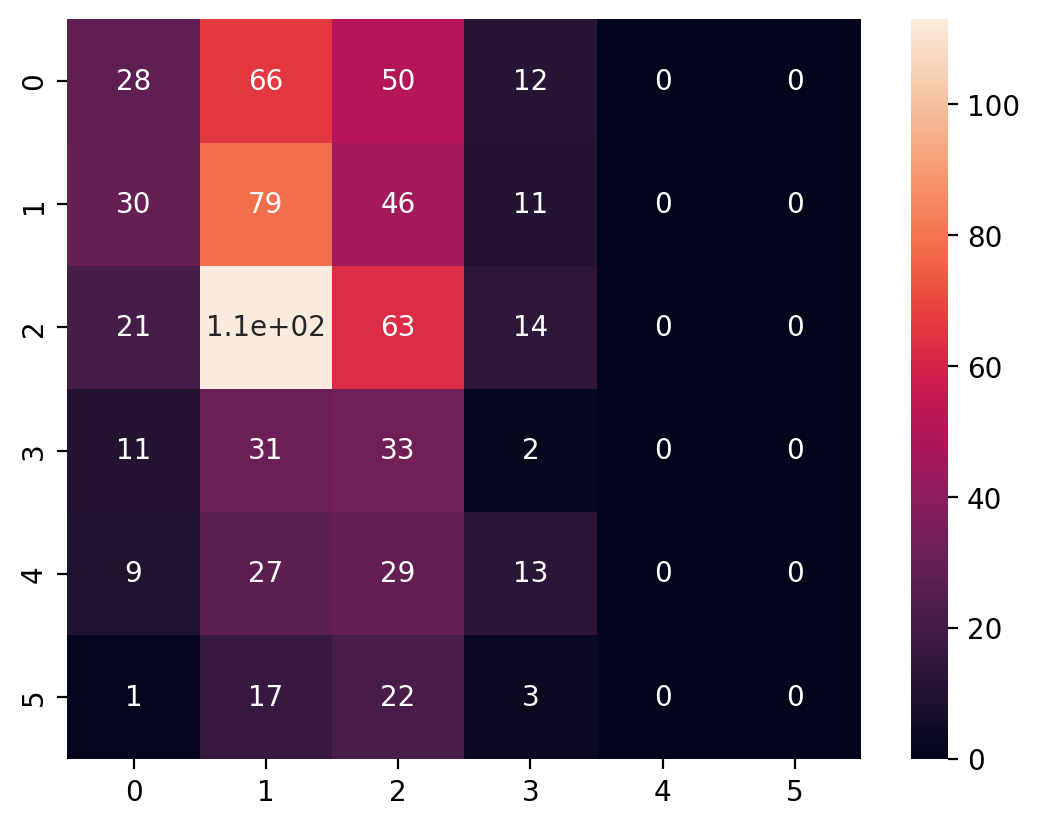

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 40s 258ms/step - loss: 17.6019 - root_mean_squared_error: 4.1955 - val_loss: 2.2653 - val_root_mean_squared_error: 1.5051
Epoch 2/50
93/93 [==============================] - 18s 191ms/step - loss: 2.7778 - root_mean_squared_error: 1.6667 - val_loss: 2.0329 - val_root_mean_squared_error: 1.4258
Epoch 3/50
93/93 [==============================] - 18s 192ms/step - loss: 2.8120 - root_mean_squared_error: 1.6769 - val_loss: 2.1880 - val_root_mean_squared_error: 1.4792
Epoch 4/50
93/93 [==============================] - 18s 190ms/step - loss: 2.4869 - root_mean_squared_error: 1.5770 - val_loss: 2.6145 - val_root_mean_squared_error: 1.6170
Epoch 5/50
93/93 [==============================] - 18s 190ms/step - loss: 2.3048 - root_mean_squared_error: 1.5181 - val_loss: 2.0579 - val_root_mean_squared_error: 1.4345
Epoch 6/50
93/93 [==============================] - 18s 190ms/step - loss: 2.5779 - root_mean_squared_error: 1.6056 - val_loss: 2.6489

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 158ms/step


predictions  actuals
0       1.722290      2.0
1       2.780590      2.0
2       2.062198      2.0
3       2.156613      2.0
4       1.752629      2.0
..           ...      ...
726     0.858044      5.0
727     0.557233      5.0
728     0.655015      5.0
729     1.765005      5.0
730     2.037640      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          1.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          1.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.17      0.01      0.02       156
         1.0       0.22      0.34      0.27       166
         2.0       0.30      0.50      0.38       211
         3.0       0.03      0.05      0.04        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.23       731
   macro avg       0.12      0.15      0.12       731
weighted avg       0.18      0.23      0.18       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.17      0.01      0.02       156
         1.0       0.22      0.34      0.27       166
         2.0       0.30      0.50      0.38       211
         3.0       0.03      0.05      0.04        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.23       731
   macro avg       0.12      0.15      0.12       731
weighted avg       0.18      0.23      0.18       731



<Axes: >

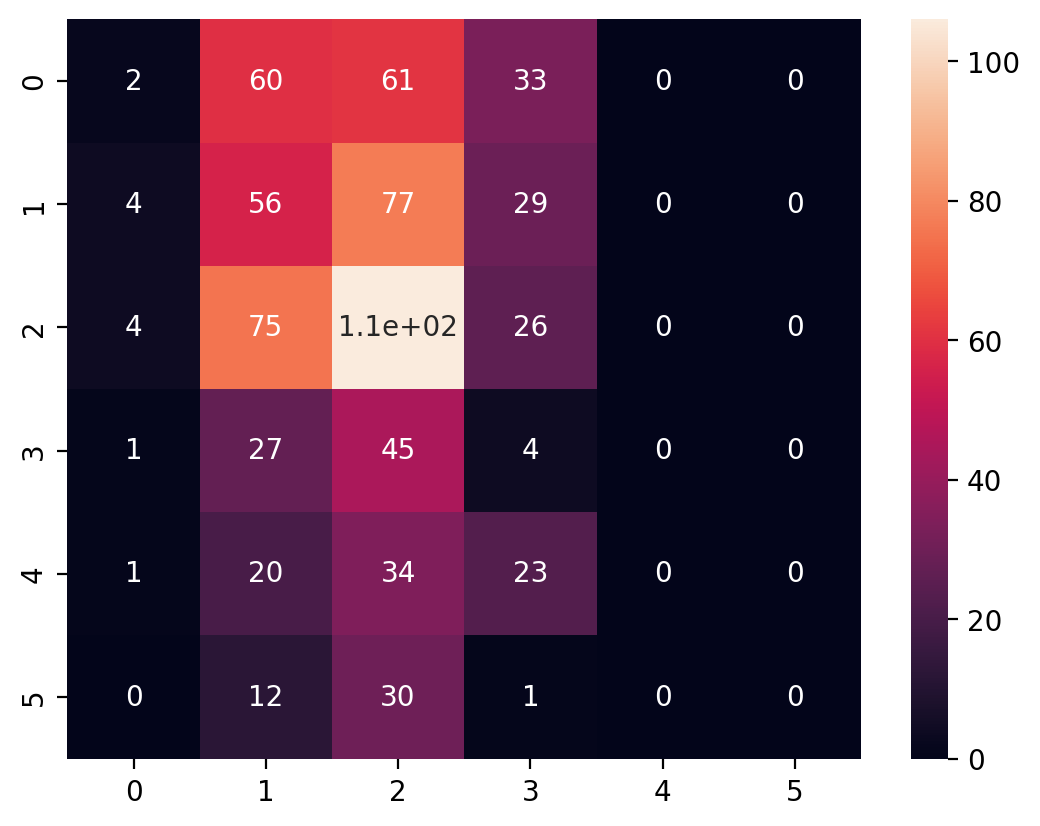

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 13s 99ms/step - loss: 6.6848 - root_mean_squared_error: 2.5855 - val_loss: 2.4042 - val_root_mean_squared_error: 1.5506
Epoch 2/50
93/93 [==============================] - 8s 86ms/step - loss: 2.3730 - root_mean_squared_error: 1.5405 - val_loss: 2.2106 - val_root_mean_squared_error: 1.4868
Epoch 3/50
93/93 [==============================] - 8s 86ms/step - loss: 2.2393 - root_mean_squared_error: 1.4964 - val_loss: 2.2031 - val_root_mean_squared_error: 1.4843
Epoch 4/50
93/93 [==============================] - 8s 87ms/step - loss: 2.2091 - root_mean_squared_error: 1.4863 - val_loss: 2.2001 - val_root_mean_squared_error: 1.4833
Epoch 5/50
93/93 [==============================] - 8s 87ms/step - loss: 2.1883 - root_mean_squared_error: 1.4793 - val_loss: 2.2348 - val_root_mean_squared_error: 1.4949
Epoch 6/50
93/93 [==============================] - 8s 87ms/step - loss: 2.1127 - root_mean_squared_error: 1.4535 - val_loss: 2.2305 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 117ms/step


predictions  actuals
0       2.409174      2.0
1       2.949193      2.0
2       2.538758      2.0
3       1.772735      2.0
4       1.757775      2.0
..           ...      ...
726    -0.009476      5.0
727     1.446185      5.0
728     1.570821      5.0
729     1.216582      5.0
730     1.103672      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            3.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          2.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            3.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          0.0      5.0
727          1.0      5.0
728          2.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.27      0.31      0.29       156
         1.0       0.22      0.18      0.20       166
         2.0       0.34      0.28      0.31       211
         3.0       0.12      0.30      0.17        77
         4.0       0.25      0.15      0.19        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.20      0.20      0.19       731
weighted avg       0.25      0.24      0.23       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.27      0.31      0.29       156
         1.0       0.22      0.18      0.20       166
         2.0       0.34      0.28      0.31       211
         3.0       0.12      0.30      0.17        77
         4.0       0.25      0.15      0.19        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.20      0.20      0.19       731
weighted avg       0.25      0.24      0.23       731



<Axes: >

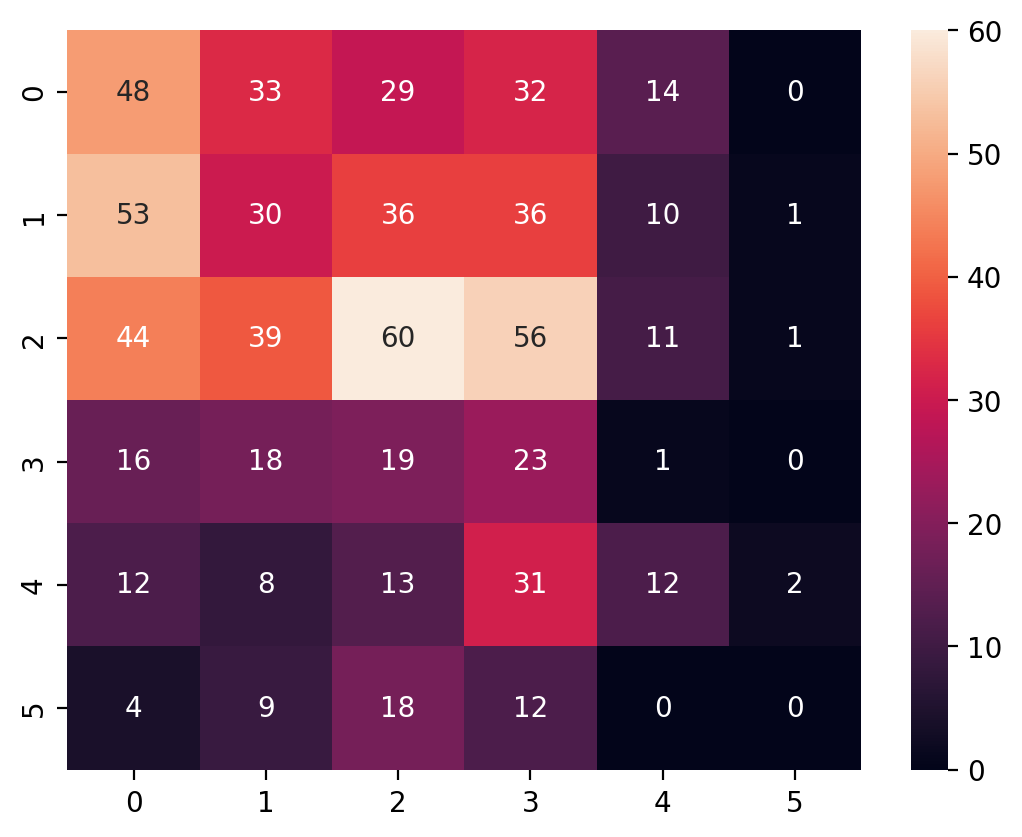

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[9]), fill='white', font=font1)
        draw.text((10, 45), str(dat[4]), fill='white', font=font2)
        draw.text((10, 80), str(dat[5]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[15]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[7]), fill='white', font=font3)
        draw.text((90, 45), str(dat[2]), fill='white', font=font4)
        draw.text((90, 80), str(dat[17]), fill='white', font=font4)
        draw.text((90, 115), str(dat[8]), fill='white', font=font4)
        draw.text((90, 150), str(dat[13]), fill='white', font=font5)
        draw.text((90, 185), str(dat[3]), fill='white', font=font5)
        draw.text((170, 10), str(dat[16]), fill='white', font=font5)
        draw.text((170, 45), str(dat[11]), fill='white', font=font5)
        draw.text((170, 80), str(dat[12]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[0]), fill='white', font=font5)
        draw.text((170, 185), str(dat[1]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


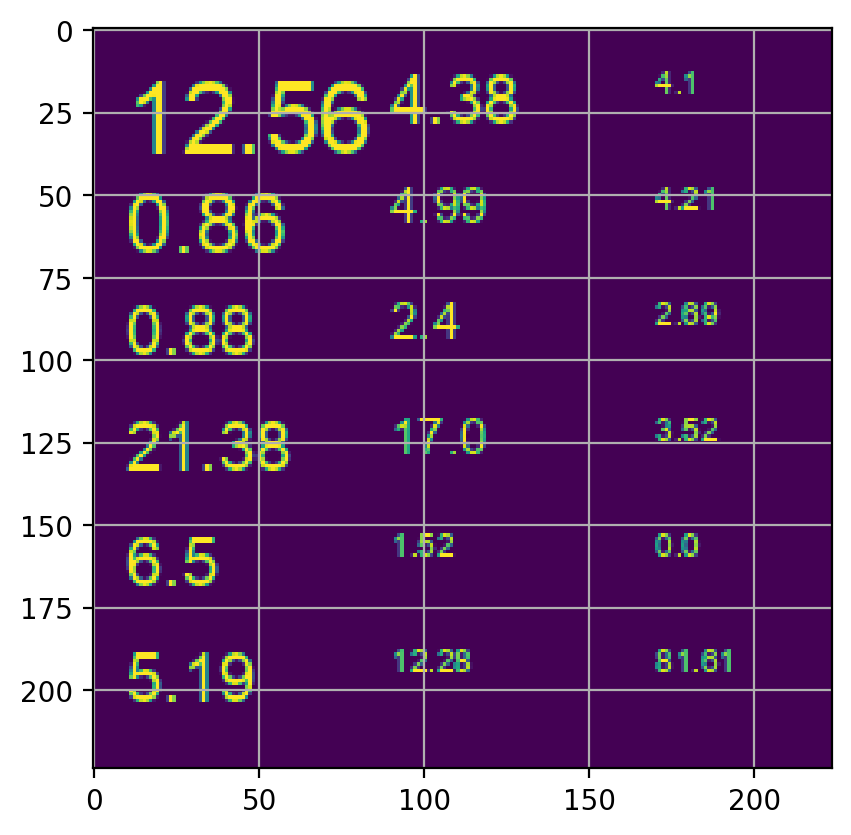

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 13s 194ms/step - loss: 74.9929 - root_mean_squared_error: 8.6598 - val_loss: 2.1708 - val_root_mean_squared_error: 1.4734
Epoch 2/50
37/37 [==============================] - 5s 142ms/step - loss: 2.6975 - root_mean_squared_error: 1.6424 - val_loss: 2.2833 - val_root_mean_squared_error: 1.5111
Epoch 3/50
37/37 [==============================] - 5s 142ms/step - loss: 2.6191 - root_mean_squared_error: 1.6184 - val_loss: 2.3072 - val_root_mean_squared_error: 1.5189
Epoch 4/50
37/37 [==============================] - 5s 144ms/step - loss: 2.3917 - root_mean_squared_error: 1.5465 - val_loss: 2.3327 - val_root_mean_squared_error: 1.5273
Epoch 5/50
37/37 [==============================] - 5s 148ms/step - loss: 2.4353 - root_mean_squared_error: 1.5605 - val_loss: 2.2094 - val_root_mean_squared_error: 1.4864
Epoch 6/50
37/37 [==============================] - 6s 151ms/step - loss: 2.4022 - root_mean_squared_error: 1.5499 - val_loss: 2.2996 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 98ms/step


predictions  actuals
0       0.795983      2.0
1       2.198068      2.0
2       1.993464      2.0
3       1.651126      2.0
4       1.119291      2.0
..           ...      ...
726     1.051151      5.0
727     0.874124      5.0
728     2.269043      5.0
729     1.215170      5.0
730     1.142967      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            2.0      2.0
3            2.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          2.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            2.0      2.0
3            2.0      2.0
4            1.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          2.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.40      0.01      0.02       156
         1.0       0.25      0.39      0.30       166
         2.0       0.28      0.54      0.37       211
         3.0       0.16      0.13      0.14        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.26       731
   macro avg       0.18      0.18      0.14       731
weighted avg       0.24      0.26      0.20       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.40      0.01      0.02       156
         1.0       0.25      0.39      0.30       166
         2.0       0.28      0.54      0.37       211
         3.0       0.16      0.13      0.14        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.26       731
   macro avg       0.18      0.18      0.14       731
weighted avg       0.24      0.26      0.20       731



<Axes: >

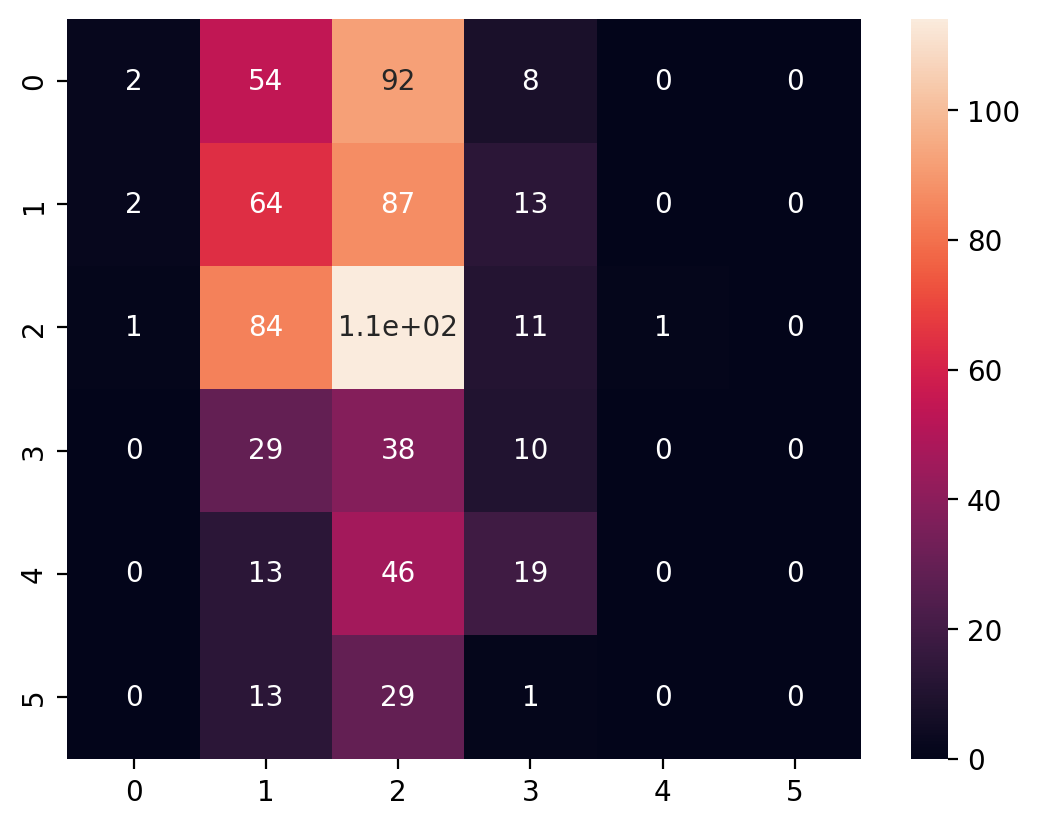

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 30s 386ms/step - loss: 46.8224 - root_mean_squared_error: 6.8427 - val_loss: 2.6448 - val_root_mean_squared_error: 1.6263
Epoch 2/50
37/37 [==============================] - 8s 228ms/step - loss: 2.9325 - root_mean_squared_error: 1.7125 - val_loss: 2.3231 - val_root_mean_squared_error: 1.5242
Epoch 3/50
37/37 [==============================] - 8s 230ms/step - loss: 2.8298 - root_mean_squared_error: 1.6822 - val_loss: 2.2622 - val_root_mean_squared_error: 1.5041
Epoch 4/50
37/37 [==============================] - 8s 228ms/step - loss: 2.6329 - root_mean_squared_error: 1.6226 - val_loss: 2.5260 - val_root_mean_squared_error: 1.5894
Epoch 5/50
37/37 [==============================] - 8s 226ms/step - loss: 2.6990 - root_mean_squared_error: 1.6429 - val_loss: 2.1529 - val_root_mean_squared_error: 1.4673
Epoch 6/50
37/37 [==============================] - 8s 225ms/step - loss: 2.7585 - root_mean_squared_error: 1.6609 - val_loss: 2.1897 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 169ms/step


predictions  actuals
0       1.104552      2.0
1       1.615632      2.0
2       0.782510      2.0
3       0.379820      2.0
4       0.307823      2.0
..           ...      ...
726     0.193377      5.0
727     0.162182      5.0
728     0.162725      5.0
729     0.187602      5.0
730     0.557960      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            0.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          0.0      5.0
729          0.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            0.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          0.0      5.0
728          0.0      5.0
729          0.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.21      0.47      0.29       156
         1.0       0.18      0.31      0.23       166
         2.0       0.20      0.09      0.12       211
         3.0       0.00      0.00      0.00        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.20       731
   macro avg       0.10      0.14      0.11       731
weighted avg       0.14      0.20      0.15       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.21      0.47      0.29       156
         1.0       0.18      0.31      0.23       166
         2.0       0.20      0.09      0.12       211
         3.0       0.00      0.00      0.00        77
         4.0       0.00      0.00      0.00        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.20       731
   macro avg       0.10      0.14      0.11       731
weighted avg       0.14      0.20      0.15       731



<Axes: >

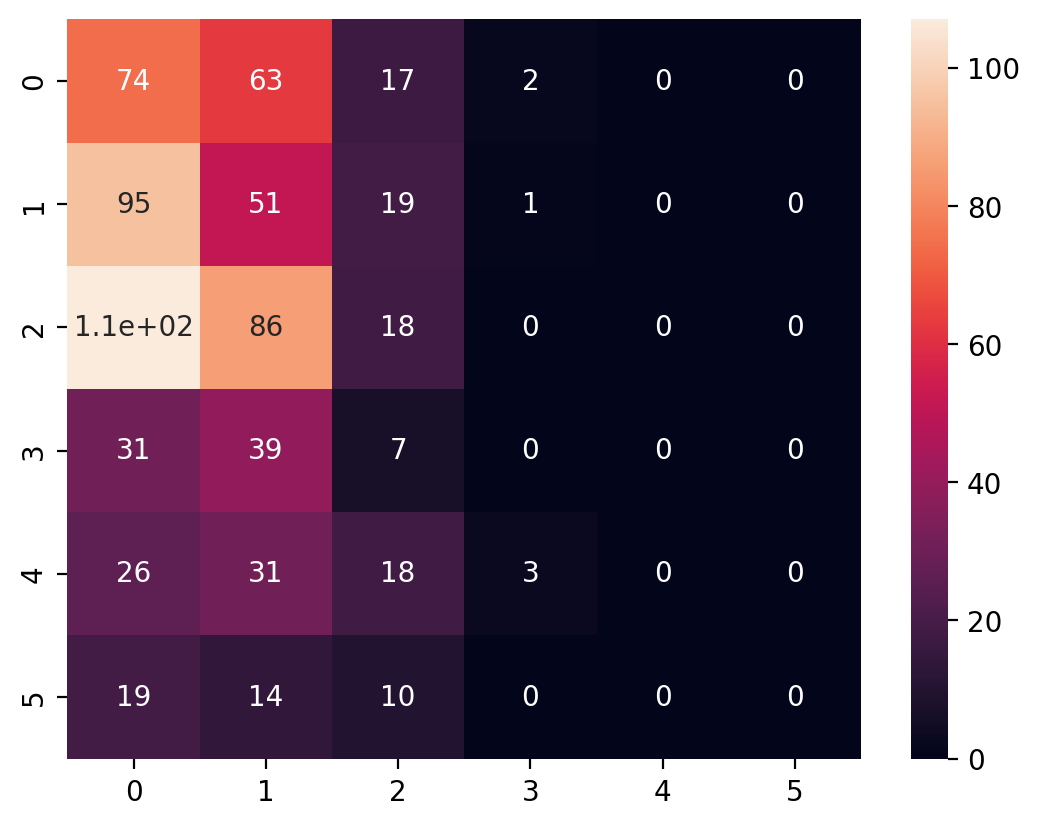

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 139ms/step - loss: 8.3285 - root_mean_squared_error: 2.8859 - val_loss: 4.0019 - val_root_mean_squared_error: 2.0005
Epoch 2/50
37/37 [==============================] - 5s 125ms/step - loss: 2.6578 - root_mean_squared_error: 1.6303 - val_loss: 3.1684 - val_root_mean_squared_error: 1.7800
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 2.7039 - root_mean_squared_error: 1.6444 - val_loss: 2.2881 - val_root_mean_squared_error: 1.5127
Epoch 4/50
37/37 [==============================] - 5s 124ms/step - loss: 2.4910 - root_mean_squared_error: 1.5783 - val_loss: 2.1610 - val_root_mean_squared_error: 1.4700
Epoch 5/50
37/37 [==============================] - 5s 125ms/step - loss: 2.3788 - root_mean_squared_error: 1.5423 - val_loss: 2.1860 - val_root_mean_squared_error: 1.4785
Epoch 6/50
37/37 [==============================] - 5s 123ms/step - loss: 2.3880 - root_mean_squared_error: 1.5453 - val_loss: 2.1655 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 156ms/step


predictions  actuals
0       1.489265      2.0
1       2.746163      2.0
2       1.907396      2.0
3       2.866860      2.0
4       0.106567      2.0
..           ...      ...
726     1.029961      5.0
727     2.124682      5.0
728     0.263605      5.0
729     2.710175      5.0
730     1.692131      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            3.0      2.0
2            2.0      2.0
3            3.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      5.0
727          2.0      5.0
728          0.0      5.0
729          3.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            3.0      2.0
2            2.0      2.0
3            3.0      2.0
4            0.0      2.0
..           ...      ...
726          1.0      5.0
727          2.0      5.0
728          0.0      5.0
729          3.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.28      0.40      0.33       156
         1.0       0.20      0.16      0.17       166
         2.0       0.33      0.36      0.34       211
         3.0       0.10      0.16      0.12        77
         4.0       0.24      0.05      0.08        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.25       731
   macro avg       0.19      0.19      0.18       731
weighted avg       0.23      0.25      0.23       731



<Axes: >

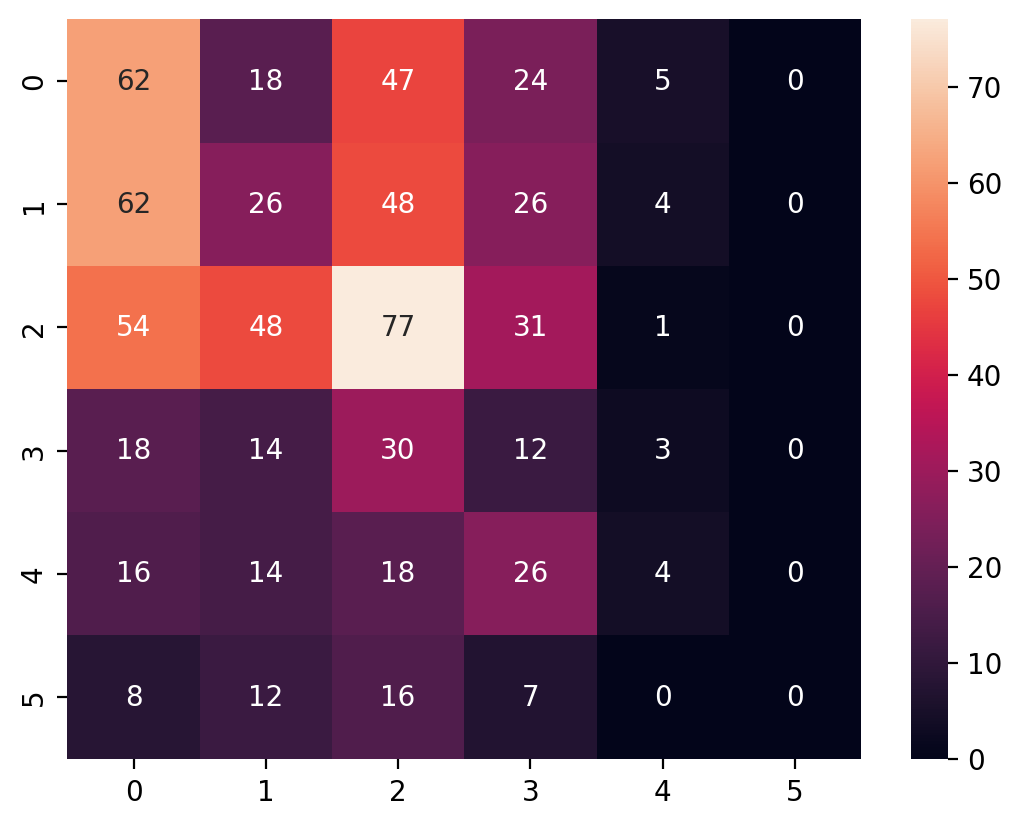

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[9]), fill='white', font=font1)
        draw.text((10, 45), str(dat[4]), fill='white', font=font2)
        draw.text((10, 80), str(dat[5]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font3)
        draw.text((10, 150), str(dat[15]), fill='white', font=font3)
        draw.text((10, 185), str(dat[14]), fill='white', font=font3)
        draw.text((90, 10), str(dat[7]), fill='white', font=font3)
        draw.text((90, 45), str(dat[2]), fill='white', font=font4)
        draw.text((90, 80), str(dat[17]), fill='white', font=font4)
        draw.text((90, 115), str(dat[8]), fill='white', font=font4)
        draw.text((90, 150), str(dat[13]), fill='white', font=font5)
        draw.text((90, 185), str(dat[3]), fill='white', font=font5)
        draw.text((170, 10), str(dat[16]), fill='white', font=font5)
        draw.text((170, 45), str(dat[11]), fill='white', font=font5)
        draw.text((170, 80), str(dat[12]), fill='white', font=font5)
        draw.text((170, 115), str(dat[10]), fill='white', font=font5)
        draw.text((170, 150), str(dat[0]), fill='white', font=font5)
        draw.text((170, 185), str(dat[1]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:295,1:295,2:295,3:295,4:295},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1475, 18)
After OverSampling, the shape of train_y: (1475,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[0.00000e+00, 8.16100e+01, 4.99000e+00, ..., 6.50000e+00,
        4.10000e+00, 2.40000e+00],
       [0.00000e+00, 8.05400e+01, 3.04000e+00, ..., 1.18500e+01,
        5.75000e+00, 6.10000e+00],
       [0.00000e+00, 8.14500e+01, 2.01000e+00, ..., 1.13800e+01,
        3.75000e+00, 7.63000e+00],
       ...,
       [0.00000e+00, 8.12642e+01, 3.29110e+00, ..., 7.10570e+00,
        1.88890e+00, 5.21680e+00],
       [6.20000e-03, 8.09587e+01, 3.68850e+00, ..., 1.10452e+01,
        2.70630e+00, 8.34510e+00],
       [1.30400e-01, 8.18637e+01, 6.49470e+00, ..., 5.20490e+00,
        8.37600e-01, 4.36730e+00]])

(1475, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


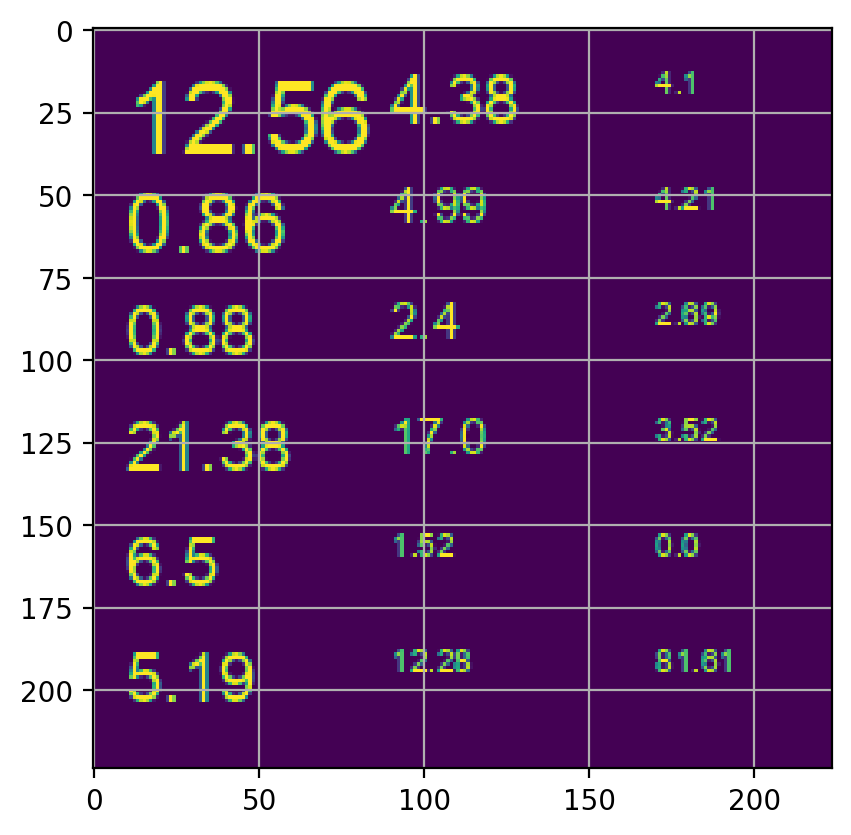

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1475, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1475,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_9 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 20s 145ms/step - loss: 30.2333 - root_mean_squared_error: 5.4985 - val_loss: 2.2532 - val_root_mean_squared_error: 1.5011
Epoch 2/50
93/93 [==============================] - 12s 125ms/step - loss: 2.2440 - root_mean_squared_error: 1.4980 - val_loss: 2.1490 - val_root_mean_squared_error: 1.4659
Epoch 3/50
93/93 [==============================] - 12s 125ms/step - loss: 2.2414 - root_mean_squared_error: 1.4971 - val_loss: 2.0960 - val_root_mean_squared_error: 1.4478
Epoch 4/50
93/93 [==============================] - 12s 126ms/step - loss: 2.1211 - root_mean_squared_error: 1.4564 - val_loss: 2.0652 - val_root_mean_squared_error: 1.4371
Epoch 5/50
93/93 [==============================] - 12s 125ms/step - loss: 2.1157 - root_mean_squared_error: 1.4545 - val_loss: 2.3667 - val_root_mean_squared_error: 1.5384
Epoch 6/50
93/93 [==============================] - 12s 125ms/step - loss: 2.1035 - root_mean_squared_error: 1.4504 - val_loss: 2.1258

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 91ms/step


predictions  actuals
0       1.846426      2.0
1       2.758103      2.0
2       2.154659      2.0
3       2.389031      2.0
4       1.601891      2.0
..           ...      ...
726     0.542292      5.0
727     0.605473      5.0
728     2.452643      5.0
729     1.658517      5.0
730     1.617172      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          2.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      2.0
1            3.0      2.0
2            2.0      2.0
3            2.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          2.0      5.0
729          2.0      5.0
730          2.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.28      0.03      0.06       156
         1.0       0.24      0.28      0.26       166
         2.0       0.32      0.52      0.39       211
         3.0       0.09      0.19      0.12        77
         4.0       0.38      0.04      0.07        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.22      0.18      0.15       731
weighted avg       0.25      0.24      0.21       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.28      0.03      0.06       156
         1.0       0.24      0.28      0.26       166
         2.0       0.32      0.52      0.39       211
         3.0       0.09      0.19      0.12        77
         4.0       0.38      0.04      0.07        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.24       731
   macro avg       0.22      0.18      0.15       731
weighted avg       0.25      0.24      0.21       731



<Axes: >

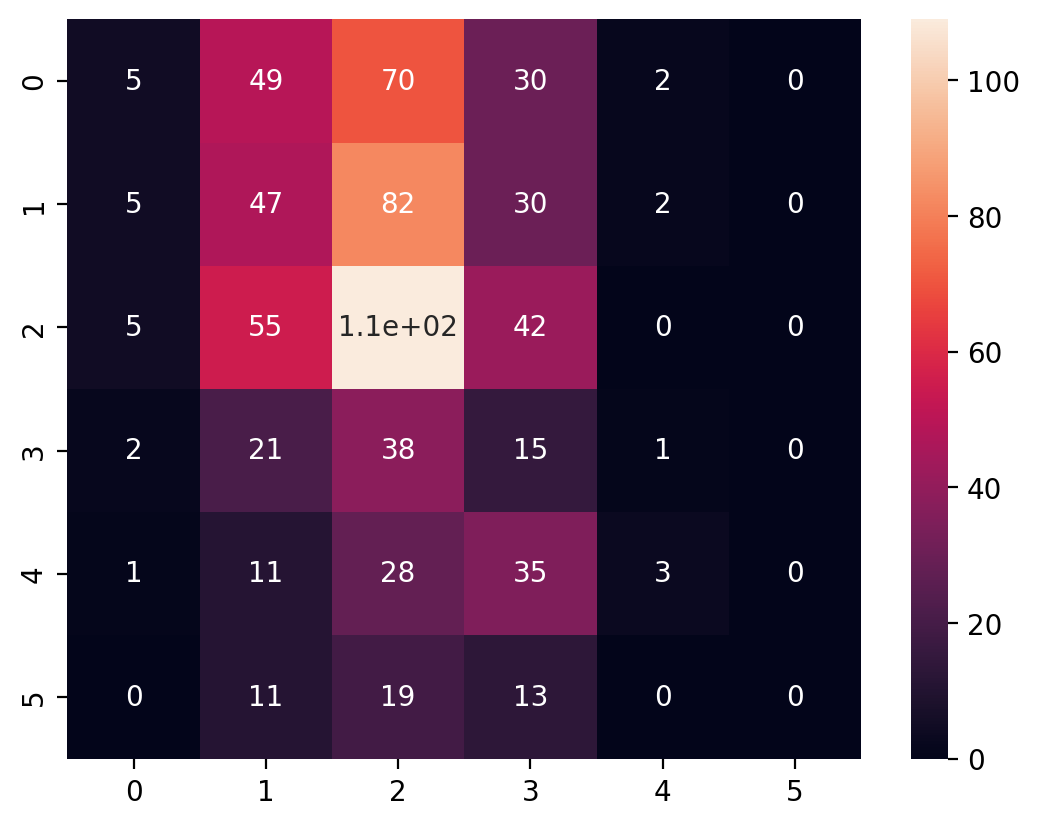

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_10 (LSTM)              (None, 256)               39584768  
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 39s 250ms/step - loss: 11.7365 - root_mean_squared_error: 3.4259 - val_loss: 2.2159 - val_root_mean_squared_error: 1.4886
Epoch 2/50
93/93 [==============================] - 18s 196ms/step - loss: 2.6757 - root_mean_squared_error: 1.6358 - val_loss: 2.1746 - val_root_mean_squared_error: 1.4747
Epoch 3/50
93/93 [==============================] - 18s 196ms/step - loss: 2.2929 - root_mean_squared_error: 1.5142 - val_loss: 2.3398 - val_root_mean_squared_error: 1.5296
Epoch 4/50
93/93 [==============================] - 18s 192ms/step - loss: 2.1968 - root_mean_squared_error: 1.4821 - val_loss: 2.3574 - val_root_mean_squared_error: 1.5354
Epoch 5/50
93/93 [==============================] - 18s 191ms/step - loss: 2.2270 - root_mean_squared_error: 1.4923 - val_loss: 2.1042 - val_root_mean_squared_error: 1.4506
Epoch 6/50
93/93 [==============================] - 18s 192ms/step - loss: 1.9226 - root_mean_squared_error: 1.3866 - val_loss: 2.0351

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 156ms/step


predictions  actuals
0       1.455734      2.0
1       2.458295      2.0
2       1.186863      2.0
3       1.203678      2.0
4       1.811817      2.0
..           ...      ...
726     0.722937      5.0
727     0.507812      5.0
728     0.736372      5.0
729     1.006594      5.0
730     0.817712      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          1.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      2.0
1            2.0      2.0
2            1.0      2.0
3            1.0      2.0
4            2.0      2.0
..           ...      ...
726          1.0      5.0
727          1.0      5.0
728          1.0      5.0
729          1.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.33      0.08      0.13       156
         1.0       0.25      0.40      0.31       166
         2.0       0.35      0.53      0.42       211
         3.0       0.09      0.12      0.10        77
         4.0       0.14      0.01      0.02        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.27       731
   macro avg       0.19      0.19      0.16       731
weighted avg       0.25      0.27      0.23       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.33      0.08      0.13       156
         1.0       0.25      0.40      0.31       166
         2.0       0.35      0.53      0.42       211
         3.0       0.09      0.12      0.10        77
         4.0       0.14      0.01      0.02        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.27       731
   macro avg       0.19      0.19      0.16       731
weighted avg       0.25      0.27      0.23       731



<Axes: >

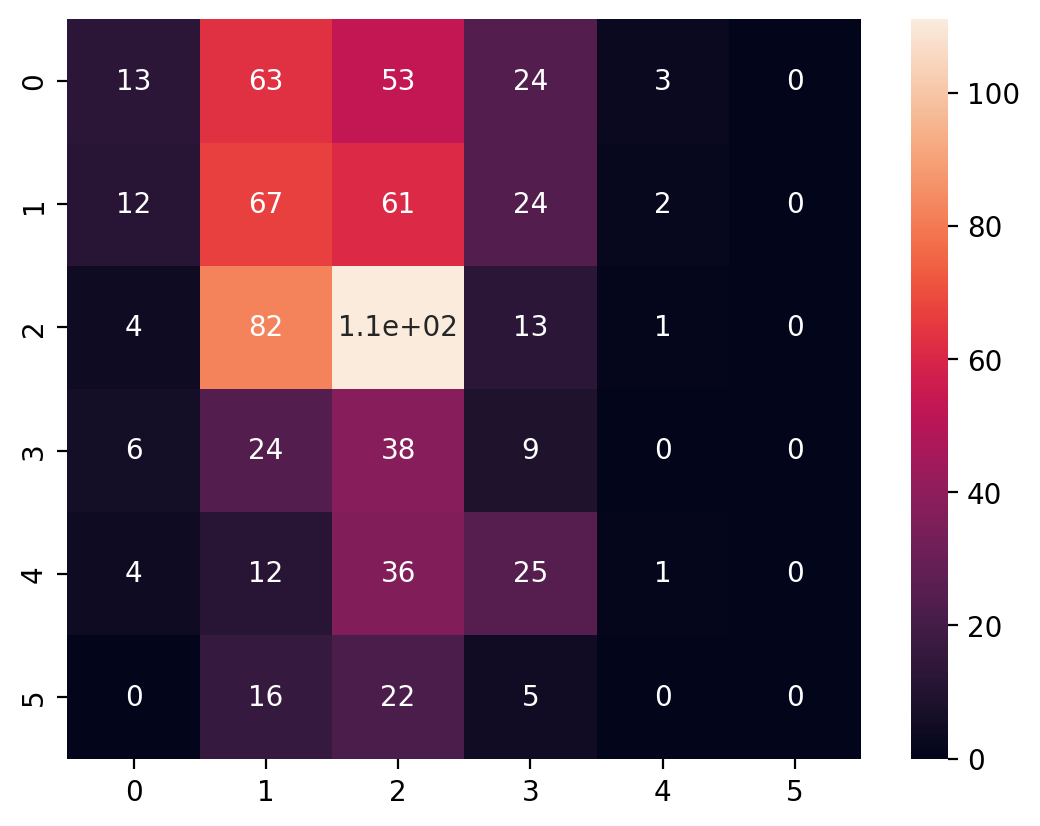

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_22 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_11 (LSTM)              (None, 256)               25953280  
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)               

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
93/93 [==============================] - 12s 92ms/step - loss: 6.1132 - root_mean_squared_error: 2.4725 - val_loss: 2.1905 - val_root_mean_squared_error: 1.4800
Epoch 2/50
93/93 [==============================] - 8s 86ms/step - loss: 2.3122 - root_mean_squared_error: 1.5206 - val_loss: 2.4026 - val_root_mean_squared_error: 1.5500
Epoch 3/50
93/93 [==============================] - 8s 86ms/step - loss: 2.4188 - root_mean_squared_error: 1.5553 - val_loss: 2.9909 - val_root_mean_squared_error: 1.7294
Epoch 4/50
93/93 [==============================] - 8s 87ms/step - loss: 3.2656 - root_mean_squared_error: 1.8071 - val_loss: 2.1754 - val_root_mean_squared_error: 1.4749
Epoch 5/50
93/93 [==============================] - 8s 87ms/step - loss: 2.5128 - root_mean_squared_error: 1.5852 - val_loss: 2.3600 - val_root_mean_squared_error: 1.5362
Epoch 6/50
93/93 [==============================] - 8s 87ms/step - loss: 2.2467 - root_mean_squared_error: 1.4989 - val_loss: 2.2226 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 139ms/step


predictions  actuals
0       0.425598      2.0
1       2.354825      2.0
2       1.040155      2.0
3       2.738948      2.0
4       0.029423      2.0
..           ...      ...
726     0.308988      5.0
727     1.989773      5.0
728     1.293057      5.0
729     1.997814      5.0
730     1.330527      5.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            1.0      2.0
3            3.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          2.0      5.0
728          1.0      5.0
729          2.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      2.0
1            2.0      2.0
2            1.0      2.0
3            3.0      2.0
4            0.0      2.0
..           ...      ...
726          0.0      5.0
727          2.0      5.0
728          1.0      5.0
729          2.0      5.0
730          1.0      5.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.31      0.31      0.31       156
         1.0       0.25      0.22      0.24       166
         2.0       0.42      0.47      0.44       211
         3.0       0.10      0.19      0.13        77
         4.0       0.24      0.12      0.16        78
         5.0       0.00      0.00      0.00        43

    accuracy                           0.28       731
   macro avg       0.22      0.22      0.21       731
weighted avg       0.28      0.28      0.28       731



<Axes: >

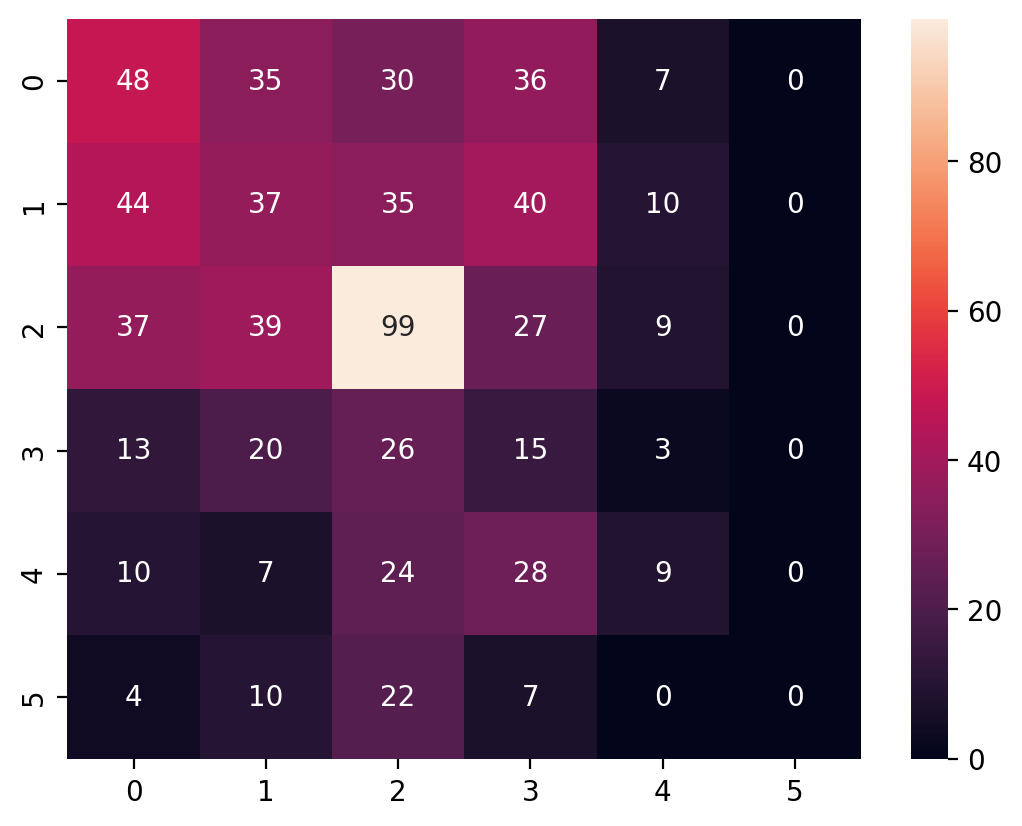

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##Crook, Oregon

###train

In [ ]:
crook = train[train['fips']==41013]

#using interpolation to fill in the NaN values
crook = crook.interpolate().fillna(method='bfill')
crook.score[crook.score <0.5] = 0
crook.score[(crook.score >=0.5)&(crook.score<1.5)] = 1
crook.score[(crook.score >=1.5)&(crook.score<2.5)] = 2
crook.score[(crook.score >=2.5)&(crook.score<3.5)] = 3
crook.score[(crook.score >=3.5)&(crook.score<4.5)] = 4
crook.score[(crook.score >=4.5)&(crook.score<5.5)] = 5
crook

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
13537800  41013  2000-01-01     1.36  86.44  3.18 -2.51   -4.33   -4.31   
13537801  41013  2000-01-02     4.38  86.85  3.06 -2.95   -4.71   -4.69   
13537802  41013  2000-01-03     4.94  87.61  3.67 -1.29   -2.34   -2.34   
13537803  41013  2000-01-04     3.92  87.32  3.87 -0.46   -1.69   -1.68   
13537804  41013  2000-01-05     0.73  87.99  2.94 -3.37   -5.14   -5.12   
...         ...         ...      ...    ...   ...   ...     ...     ...   
13544005  41013  2016-12-27     2.84  87.08  3.30 -2.87   -3.86   -3.92   
13544006  41013  2016-12-28     0.20  87.84  2.82 -4.62   -5.68   -5.67   
13544007  41013  2016-12-29     0.03  87.49  2.82 -4.97   -5.97   -5.95   
13544008  41013  2016-12-30     1.50  87.17  2.83 -5.09   -5.81   -5.81   
13544009  41013  2016-12-31     0.09  86.65  1.98 -9.40  -10.32  -10.30   

          T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
13537800    -0.27    -3.99       3.72  -2.72   5.06       8.35       2.90   
13537801    -1.29    -4.06       2.77  -3.14   5.68       9.43       3.52   
13537802     1.70    -4.33       6.04  -1.61   3.48       5.65       1.77   
13537803     1.66    -3.40       5.06  -0.81   6.05       9.11       4.16   
13537804     0.66    -8.30       8.96  -4.62   3.15       4.49       1.62   
...           ...      ...        ...    ...    ...        ...        ...   
13544005     0.49    -5.56       6.05  -3.47   5.58       6.96       2.94   
13544006    -0.28    -6.63       6.36  -6.30   3.35       5.65       1.46   
13544007    -0.02    -9.25       9.23  -5.34   5.47       6.83       3.35   
13544008    -1.47    -9.64       8.17  -6.14   2.73       5.09       1.30   
13544009    -1.85   -14.31      12.46 -10.66   3.62       5.64       1.65   

          WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
13537800         5.45   7.44      10.73       4.76         5.96    0.0  
13537801         5.91   8.27      12.12       5.92         6.20    0.0  
13537802         3.88   5.40       8.08       3.30         4.78    0.0  
13537803         4.95   8.73      12.00       6.73         5.27    0.0  
13537804         2.87   4.73       7.14       2.38         4.76    0.0  
...               ...    ...        ...        ...          ...    ...  
13544005         4.02   8.66      10.13       5.44         4.69    0.0  
13544006         4.19   5.41       9.07       2.04         7.04    0.0  
13544007         3.48   7.39       8.70       5.74         2.96    0.0  
13544008         3.79   4.31       6.35       1.93         4.42    0.0  
13544009         3.99   5.44       7.68       2.42         5.27    0.0  

[6210 rows x 21 columns]

###val

In [ ]:
or_val = validation[validation['fips']==41013]

#using interpolation to fill in the NaN values
or_val = or_val.interpolate().fillna(method='bfill')
or_val.score[or_val.score <0.5] = 0
or_val.score[(or_val.score >=0.5)&(or_val.score<1.5)] = 1
or_val.score[(or_val.score >=1.5)&(or_val.score<2.5)] = 2
or_val.score[(or_val.score >=2.5)&(or_val.score<3.5)] = 3
or_val.score[(or_val.score >=3.5)&(or_val.score<4.5)] = 4
or_val.score[(or_val.score >=4.5)&(or_val.score<5.5)] = 5

or_val

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1591400  41013  2017-01-01     2.25  85.60  2.33  -6.90   -8.25   -8.23   
1591401  41013  2017-01-02     2.66  85.94  2.12  -8.05   -9.34   -9.31   
1591402  41013  2017-01-03     2.97  86.76  1.73 -10.63  -11.63  -11.60   
1591403  41013  2017-01-04     5.92  86.59  1.40 -13.46  -14.17  -14.14   
1591404  41013  2017-01-05     0.04  87.07  1.08 -16.71  -17.14  -17.16   
...        ...         ...      ...    ...   ...    ...     ...     ...   
1592125  41013  2018-12-27     2.22  87.45  3.13  -3.07   -4.52   -4.39   
1592126  41013  2018-12-28     2.03  87.73  2.91  -3.83   -5.42   -5.34   
1592127  41013  2018-12-29     2.90  87.46  3.79  -0.63   -1.95   -1.94   
1592128  41013  2018-12-30     3.79  87.11  3.46  -1.87   -3.21   -3.21   
1592129  41013  2018-12-31     0.22  87.66  2.25  -6.41   -8.75   -8.38   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1591400    -4.12    -9.33       5.21  -7.83   3.85       5.97       1.37   
1591401    -4.16   -11.17       7.01  -8.90   2.51       4.30       0.93   
1591402    -5.75   -14.41       8.67 -11.17   3.09       4.53       2.43   
1591403   -10.08   -20.61      10.52 -14.50   3.40       4.91       1.47   
1591404    -7.06   -22.34      15.28 -19.41   2.73       4.78       1.41   
...          ...      ...        ...    ...    ...        ...        ...   
1592125    -0.35    -5.42       5.07  -3.34   4.17       6.35       2.28   
1592126    -0.65    -7.63       6.98  -4.56   2.45       3.45       1.33   
1592127     2.80    -3.32       6.12  -0.99   5.15       7.25       3.12   
1592128     0.65    -5.15       5.80  -2.27   6.42       8.65       3.74   
1592129    -2.56    -9.84       7.28  -8.31   2.68       3.62       0.93   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1591400         4.60   6.27       8.16       2.25         5.91    0.0  
1591401         3.36   3.89       5.52       1.62         3.90    0.0  
1591402         2.10   4.55       6.35       3.00         3.35    0.0  
1591403         3.44   4.68       6.62       2.17         4.45    0.0  
1591404         3.37   4.34       8.66       2.02         6.64    0.0  
...              ...    ...        ...        ...          ...    ...  
1592125         4.07   6.13       7.90       3.49         4.41    3.0  
1592126         2.12   3.76       6.05       2.06         3.99    3.0  
1592127         4.13   7.63      10.25       5.69         4.56    3.0  
1592128         4.91   9.27      12.11       6.13         5.98    3.0  
1592129         2.69   4.00       5.94       1.37         4.57    3.0  

[730 rows x 21 columns]

In [ ]:
or_val['score'].value_counts()

0.0    251
2.0    195
3.0    172
1.0    112
Name: score, dtype: int64

In [ ]:
or_val = or_val.round(4)

In [ ]:
X = or_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = or_val['score']

###xgboost feature importance

In [ ]:
X_train = crook[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = crook['score']

In [ ]:
X_val = or_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = or_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

-0.1294226722136178
0.2717337084296479
1.578682383914038


In [ ]:
model.get_booster().get_score(importance_type='gain')

{'f0': 1.3831212520599365,
 'f1': 1.745063304901123,
 'f2': 2.0261454582214355,
 'f3': 2.267430543899536,
 'f4': 3.7620108127593994,
 'f5': 3.8128695487976074,
 'f6': 2.8954174518585205,
 'f7': 3.680783987045288,
 'f8': 2.309108257293701,
 'f9': 2.854649543762207,
 'f10': 2.466153144836426,
 'f11': 2.423494338989258,
 'f12': 2.3869693279266357,
 'f13': 2.566962957382202,
 'f14': 2.99532413482666,
 'f15': 2.8564038276672363,
 'f16': 2.7991371154785156,
 'f17': 2.5533909797668457}

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

{'f0': 1.3831212520599365,
 'f1': 1.745063304901123,
 'f2': 2.0261454582214355,
 'f3': 2.267430543899536,
 'f4': 3.7620108127593994,
 'f5': 3.8128695487976074,
 'f6': 2.8954174518585205,
 'f7': 3.680783987045288,
 'f8': 2.309108257293701,
 'f9': 2.854649543762207,
 'f10': 2.466153144836426,
 'f11': 2.423494338989258,
 'f12': 2.3869693279266357,
 'f13': 2.566962957382202,
 'f14': 2.99532413482666,
 'f15': 2.8564038276672363,
 'f16': 2.7991371154785156,
 'f17': 2.5533909797668457}

In [ ]:
importance_df

0
f0   1.383121
f1   1.745063
f2   2.026145
f3   2.267431
f4   3.762011
f5   3.812870
f6   2.895417
f7   3.680784
f8   2.309108
f9   2.854650
f10  2.466153
f11  2.423494
f12  2.386969
f13  2.566963
f14  2.995324
f15  2.856404
f16  2.799137
f17  2.553391

<Axes: >

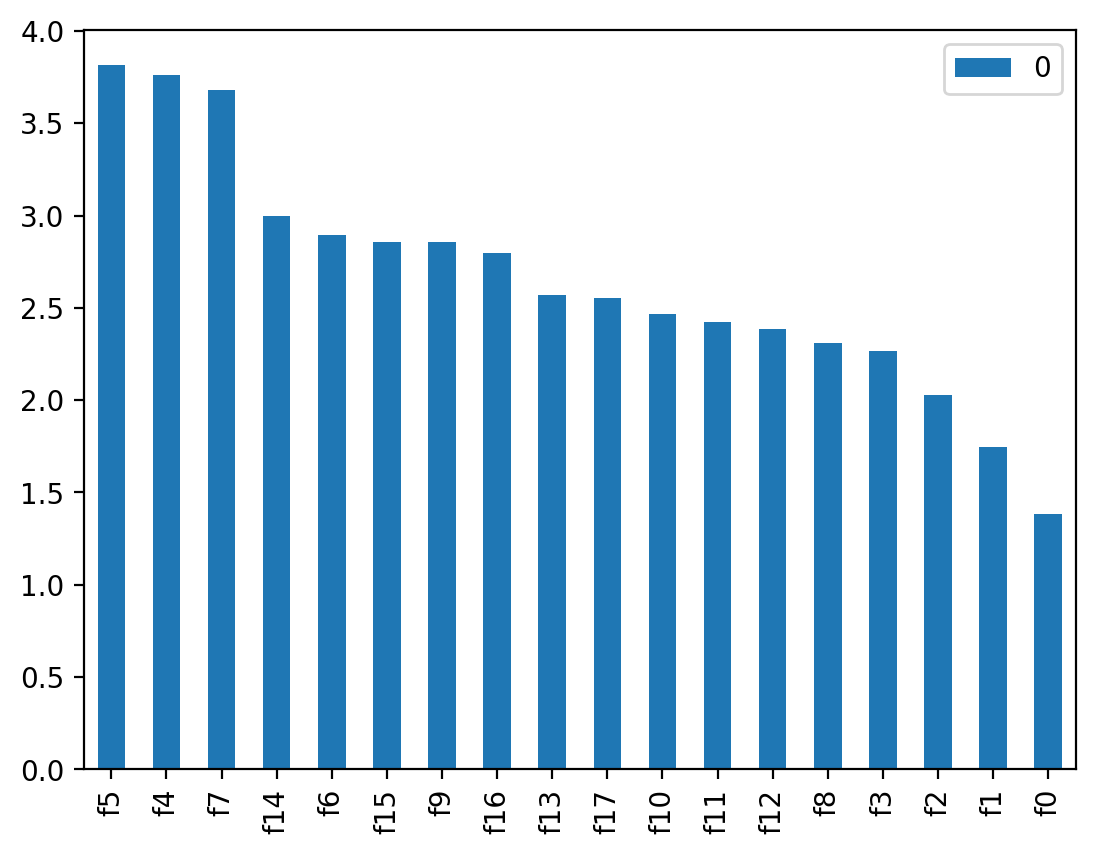

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2MWET
2. T2MDEW
3. T2M_MIN
4. WS50M
5. T2M_MAX
6. WS50M_MAX
7. TS
8. WS50M_MIN
9. WS10M_RANGE
10. WS50M_RANGE
11. WS10M
12. WS10M_MAX
13. WS10M_MIN
14. T2M_RANGE
15. T2M
16. QV2M
17. PS
18. PRECTOT

###test

In [ ]:
or_test = test[test['fips']==41013]

#using interpolation to fill in the NaN values
or_test = or_test.interpolate().fillna(method='bfill')
or_test.score[or_test.score <0.5] = 0
or_test.score[(or_test.score >=0.5)&(or_test.score<1.5)] = 1
or_test.score[(or_test.score >=1.5)&(or_test.score<2.5)] = 2
or_test.score[(or_test.score >=2.5)&(or_test.score<3.5)] = 3
or_test.score[(or_test.score >=3.5)&(or_test.score<4.5)] = 4
or_test.score[(or_test.score >=4.5)&(or_test.score<5.5)] = 5

or_test.head()

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1593580  41013  2019-01-01     0.39  87.72  1.96 -6.18  -10.46   -9.96   
1593581  41013  2019-01-02     0.90  87.44  2.71 -3.51   -6.37   -6.44   
1593582  41013  2019-01-03     0.14  86.96  3.34 -1.07   -3.69   -3.69   
1593583  41013  2019-01-04     0.05  86.53  3.37 -1.19   -3.66   -3.57   
1593584  41013  2019-01-05     0.31  85.49  3.39 -0.87   -3.71   -3.69   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
1593580     0.79   -11.07      11.86 -8.90   2.43       3.52       1.06   
1593581     2.80    -7.85      10.66 -4.44   4.00       5.04       3.29   
1593582     2.88    -4.80       7.68 -1.78   5.53       6.60       4.00   
1593583     1.99    -3.61       5.60 -1.84   4.91       5.77       3.57   
1593584     2.92    -4.81       7.73 -1.45   7.32      10.27       5.25   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1593580         2.46   3.59       5.70       1.46         4.25    3.0  
1593581         1.75   6.65       7.91       5.11         2.80    3.0  
1593582         2.60   8.22       9.98       6.71         3.27    3.0  
1593583         2.20   7.51       8.63       6.10         2.53    3.0  
1593584         5.02  10.14      14.17       7.89         6.28    3.0

In [ ]:
or_test = or_test.round(4)
or_test

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1593580  41013  2019-01-01     0.39  87.72  1.96 -6.18  -10.46   -9.96   
1593581  41013  2019-01-02     0.90  87.44  2.71 -3.51   -6.37   -6.44   
1593582  41013  2019-01-03     0.14  86.96  3.34 -1.07   -3.69   -3.69   
1593583  41013  2019-01-04     0.05  86.53  3.37 -1.19   -3.66   -3.57   
1593584  41013  2019-01-05     0.31  85.49  3.39 -0.87   -3.71   -3.69   
...        ...         ...      ...    ...   ...   ...     ...     ...   
1594306  41013  2020-12-27     0.07  86.98  2.67 -4.48   -6.67   -5.58   
1594307  41013  2020-12-28     0.01  86.93  2.23 -6.73   -8.98   -7.86   
1594308  41013  2020-12-29     0.00  87.49  2.18 -4.55   -9.16   -6.85   
1594309  41013  2020-12-30     5.13  86.90  3.07 -0.90   -4.78   -2.84   
1594310  41013  2020-12-31     0.45  87.15  3.67 -1.35   -2.42   -1.88   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
1593580     0.79   -11.07      11.86 -8.90   2.43       3.52       1.06   
1593581     2.80    -7.85      10.66 -4.44   4.00       5.04       3.29   
1593582     2.88    -4.80       7.68 -1.78   5.53       6.60       4.00   
1593583     1.99    -3.61       5.60 -1.84   4.91       5.77       3.57   
1593584     2.92    -4.81       7.73 -1.45   7.32      10.27       5.25   
...          ...      ...        ...   ...    ...        ...        ...   
1594306     0.97    -7.44       8.40 -4.86   4.99       6.72       3.48   
1594307    -0.37   -11.43      11.06 -8.41   2.68       4.96       1.27   
1594308     0.69    -9.94      10.62 -6.51   2.65       3.08       1.77   
1594309     3.82    -3.61       7.43 -1.56   4.64       7.91       3.02   
1594310     2.62    -3.48       6.10 -2.27   3.70       5.59       1.84   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
1593580         2.46   3.59       5.70       1.46         4.25    3.0  
1593581         1.75   6.65       7.91       5.11         2.80    3.0  
1593582         2.60   8.22       9.98       6.71         3.27    3.0  
1593583         2.20   7.51       8.63       6.10         2.53    3.0  
1593584         5.02  10.14      14.17       7.89         6.28    3.0  
...              ...    ...        ...        ...          ...    ...  
1594306         3.23   7.28       8.38       5.69         2.69    4.0  
1594307         3.69   4.04       8.10       1.93         6.17    4.0  
1594308         1.31   4.56       6.24       3.12         3.12    4.0  
1594309         4.88   7.59      10.66       5.87         4.80    4.0  
1594310         3.76   5.91       7.66       2.84         4.82    4.0  

[731 rows x 21 columns]

In [ ]:
or_test['score'].value_counts()

0.0    225
3.0    210
4.0    117
2.0     95
1.0     84
Name: score, dtype: int64

In [ ]:
X_test = or_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = or_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN 2D With SuperTML Method 

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


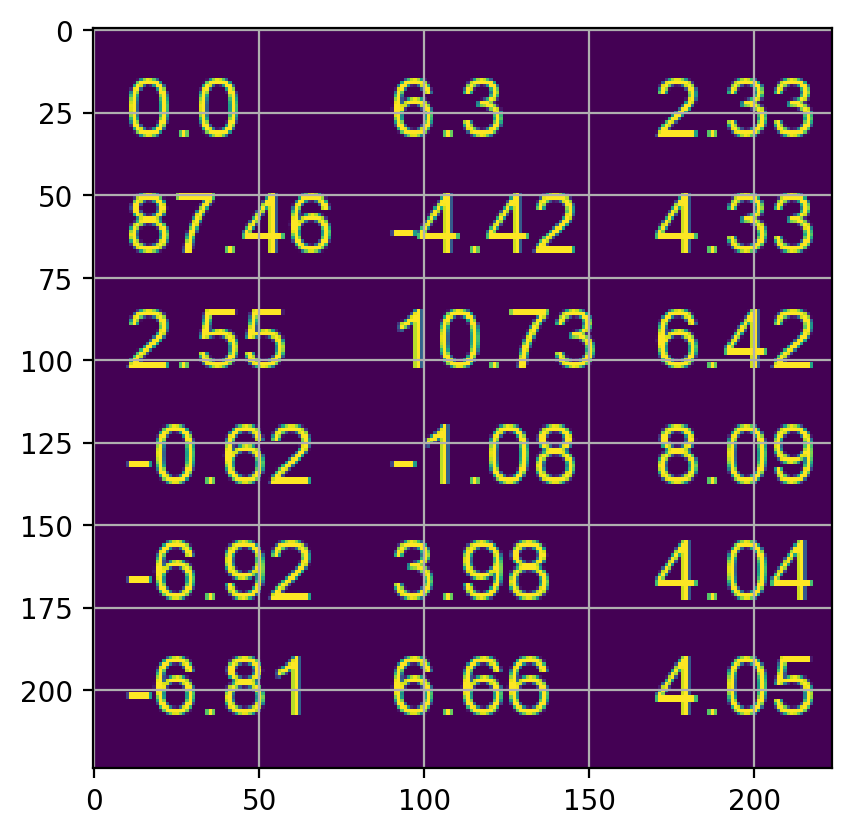

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 14s 229ms/step - loss: 64.6556 - root_mean_squared_error: 8.0409 - val_loss: 1.5734 - val_root_mean_squared_error: 1.2543
Epoch 2/50
37/37 [==============================] - 5s 148ms/step - loss: 1.9300 - root_mean_squared_error: 1.3892 - val_loss: 1.4396 - val_root_mean_squared_error: 1.1998
Epoch 3/50
37/37 [==============================] - 5s 148ms/step - loss: 1.7681 - root_mean_squared_error: 1.3297 - val_loss: 1.5755 - val_root_mean_squared_error: 1.2552
Epoch 4/50
37/37 [==============================] - 6s 151ms/step - loss: 1.7680 - root_mean_squared_error: 1.3297 - val_loss: 1.6112 - val_root_mean_squared_error: 1.2693
Epoch 5/50
37/37 [==============================] - 5s 147ms/step - loss: 1.9075 - root_mean_squared_error: 1.3811 - val_loss: 1.6120 - val_root_mean_squared_error: 1.2696
Epoch 6/50
37/37 [==============================] - 5s 148ms/step - loss: 1.9569 - root_mean_squared_error: 1.3989 - val_loss: 1.4674 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 98ms/step


predictions  actuals
0       0.868949      3.0
1      -0.003590      3.0
2       0.548197      3.0
3       0.415319      3.0
4       0.573416      3.0
..           ...      ...
726     0.218346      4.0
727     0.021269      4.0
728     0.281189      4.0
729     0.126921      4.0
730     0.791520      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            0.0      3.0
2            1.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          0.0      4.0
728          0.0      4.0
729          0.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            0.0      3.0
2            1.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          0.0      4.0
728          0.0      4.0
729          0.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.24      0.40      0.30       225
         1.0       0.06      0.23      0.10        84
         2.0       0.06      0.03      0.04        95
         3.0       0.00      0.00      0.00       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.07      0.13      0.09       731
weighted avg       0.09      0.15      0.11       731



<Axes: >

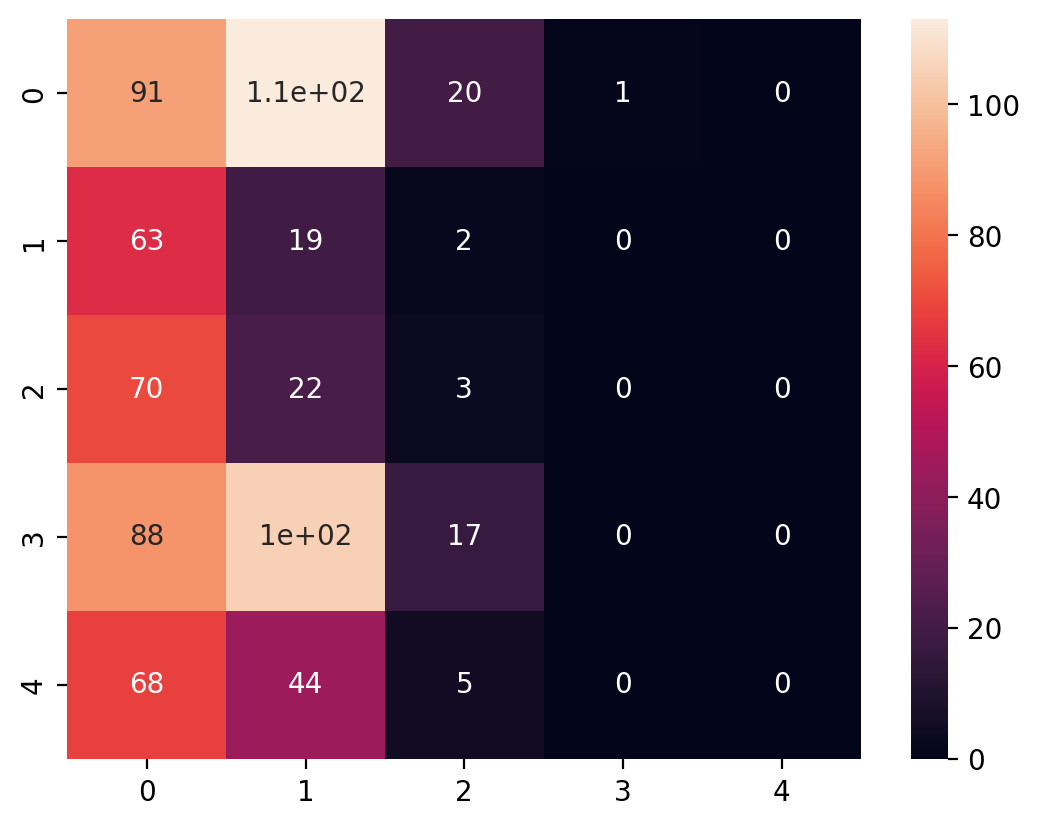

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 41s 458ms/step - loss: 32.7377 - root_mean_squared_error: 5.7217 - val_loss: 1.6548 - val_root_mean_squared_error: 1.2864
Epoch 2/50
37/37 [==============================] - 8s 224ms/step - loss: 1.9098 - root_mean_squared_error: 1.3819 - val_loss: 1.4251 - val_root_mean_squared_error: 1.1938
Epoch 3/50
37/37 [==============================] - 9s 234ms/step - loss: 1.5923 - root_mean_squared_error: 1.2619 - val_loss: 1.3752 - val_root_mean_squared_error: 1.1727
Epoch 4/50
37/37 [==============================] - 9s 234ms/step - loss: 1.4280 - root_mean_squared_error: 1.1950 - val_loss: 1.6046 - val_root_mean_squared_error: 1.2667
Epoch 5/50
37/37 [==============================] - 9s 235ms/step - loss: 1.1706 - root_mean_squared_error: 1.0819 - val_loss: 1.5483 - val_root_mean_squared_error: 1.2443
Epoch 6/50
37/37 [==============================] - 9s 233ms/step - loss: 1.3159 - root_mean_squared_error: 1.1471 - val_loss: 1.6442 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 167ms/step


predictions  actuals
0       1.837321      3.0
1       0.859058      3.0
2       1.942360      3.0
3       0.832699      3.0
4       0.746869      3.0
..           ...      ...
726     0.253349      4.0
727     1.535327      4.0
728     0.980075      4.0
729     0.651515      4.0
730     1.496485      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          2.0      4.0
728          1.0      4.0
729          1.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          2.0      4.0
728          1.0      4.0
729          1.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.17      0.05      0.08       225
         1.0       0.14      0.63      0.23        84
         2.0       0.11      0.32      0.16        95
         3.0       0.18      0.01      0.02       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.13       731
   macro avg       0.12      0.20      0.10       731
weighted avg       0.14      0.13      0.08       731



<Axes: >

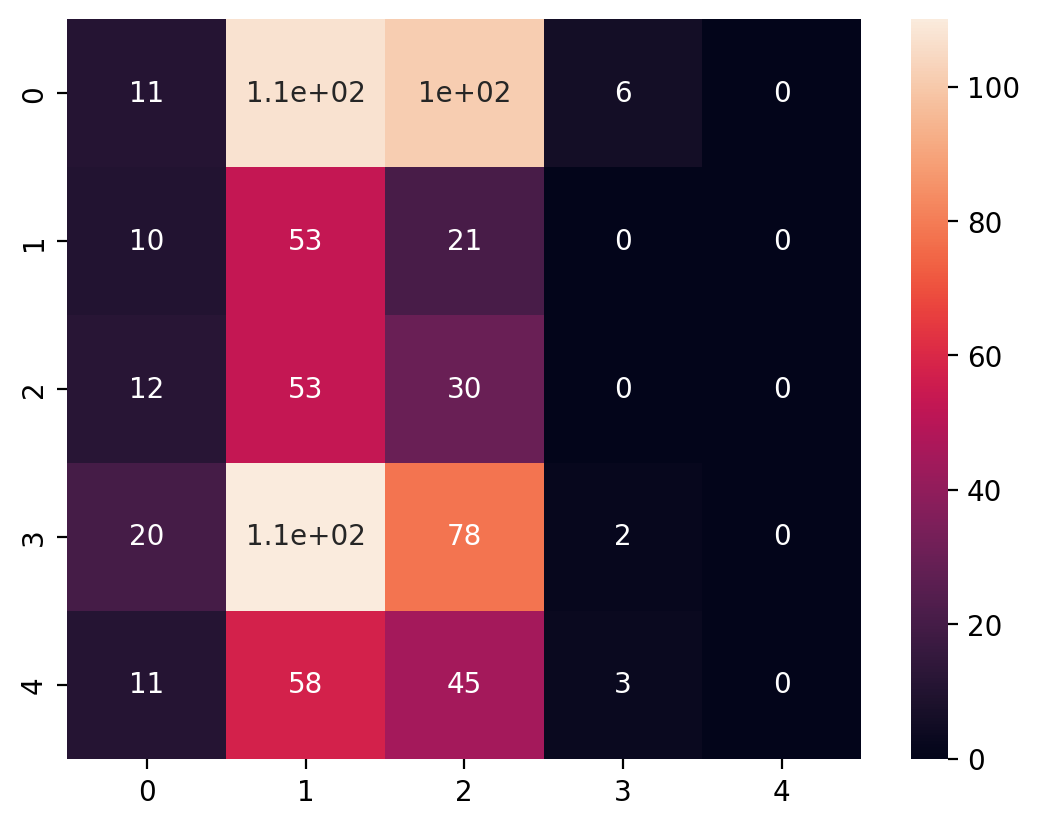

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 512)     14714688  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               25953280  
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 17s 194ms/step - loss: 4.6022 - root_mean_squared_error: 2.1453 - val_loss: 1.5472 - val_root_mean_squared_error: 1.2438
Epoch 2/50
37/37 [==============================] - 4s 115ms/step - loss: 1.6891 - root_mean_squared_error: 1.2996 - val_loss: 1.4234 - val_root_mean_squared_error: 1.1931
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 1.7491 - root_mean_squared_error: 1.3225 - val_loss: 1.3941 - val_root_mean_squared_error: 1.1807
Epoch 4/50
37/37 [==============================] - 4s 119ms/step - loss: 1.6710 - root_mean_squared_error: 1.2927 - val_loss: 1.6482 - val_root_mean_squared_error: 1.2838
Epoch 5/50
37/37 [==============================] - 4s 117ms/step - loss: 1.6610 - root_mean_squared_error: 1.2888 - val_loss: 1.3860 - val_root_mean_squared_error: 1.1773
Epoch 6/50
37/37 [==============================] - 4s 116ms/step - loss: 1.5114 - root_mean_squared_error: 1.2294 - val_loss: 1.4239 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 277ms/step


predictions  actuals
0       1.246340      3.0
1      -0.003332      3.0
2       1.744032      3.0
3       0.160563      3.0
4       0.838557      3.0
..           ...      ...
726     0.830400      4.0
727    -0.028109      4.0
728     2.988612      4.0
729     0.763559      4.0
730     1.843416      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            0.0      3.0
2            2.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          0.0      4.0
728          3.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            0.0      3.0
2            2.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          0.0      4.0
728          3.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.28      0.20      0.24       225
         1.0       0.13      0.32      0.19        84
         2.0       0.13      0.35      0.19        95
         3.0       0.30      0.15      0.20       210
         4.0       0.29      0.02      0.03       117

    accuracy                           0.19       731
   macro avg       0.23      0.21      0.17       731
weighted avg       0.25      0.19      0.18       731



<Axes: >

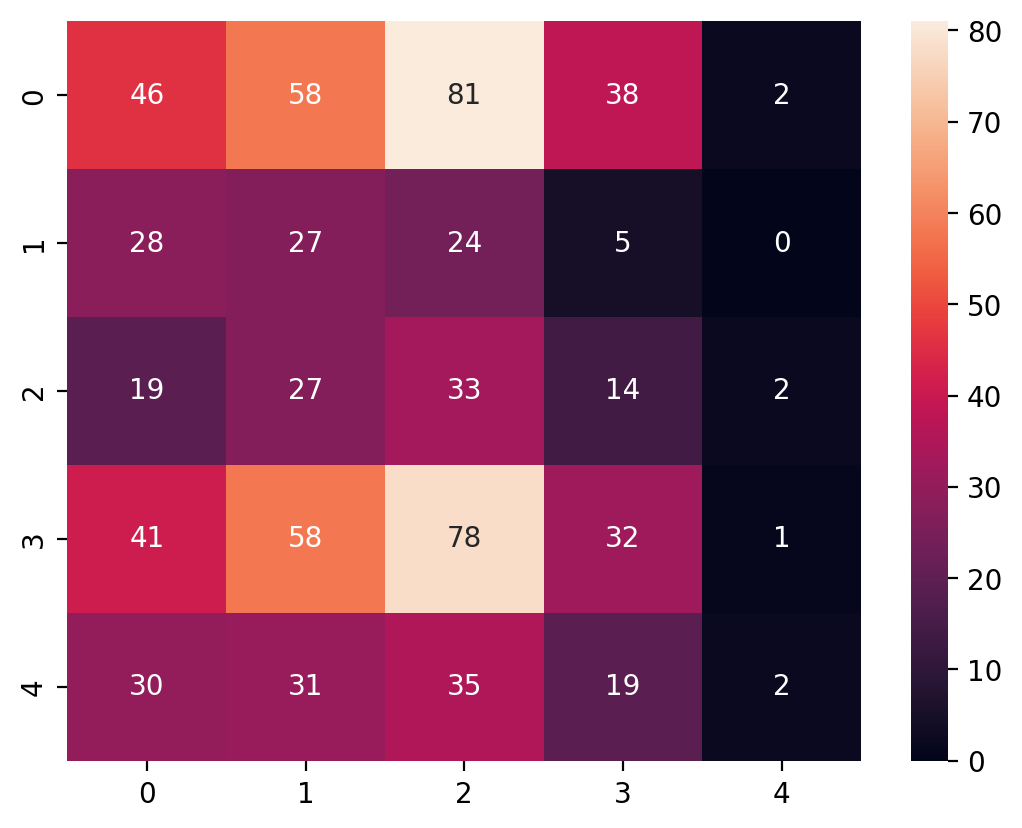

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling dgn smote 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:251,1:251,2:251,3:251},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1004, 18)
After OverSampling, the shape of train_y: (1004,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[0.00000e+00, 8.74600e+01, 2.55000e+00, ..., 8.09000e+00,
        4.04000e+00, 4.05000e+00],
       [0.00000e+00, 8.71500e+01, 5.16000e+00, ..., 5.73000e+00,
        2.44000e+00, 3.29000e+00],
       [5.19000e+00, 8.61100e+01, 4.45000e+00, ..., 9.84000e+00,
        3.43000e+00, 6.41000e+00],
       ...,
       [0.00000e+00, 8.72460e+01, 5.42320e+00, ..., 7.29820e+00,
        1.58950e+00, 5.71170e+00],
       [2.61000e-02, 8.75255e+01, 7.94090e+00, ..., 6.86980e+00,
        1.42770e+00, 5.43360e+00],
       [4.30000e-03, 8.73584e+01, 6.44630e+00, ..., 7.79750e+00,
        1.30410e+00, 6.48340e+00]])

(1004, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


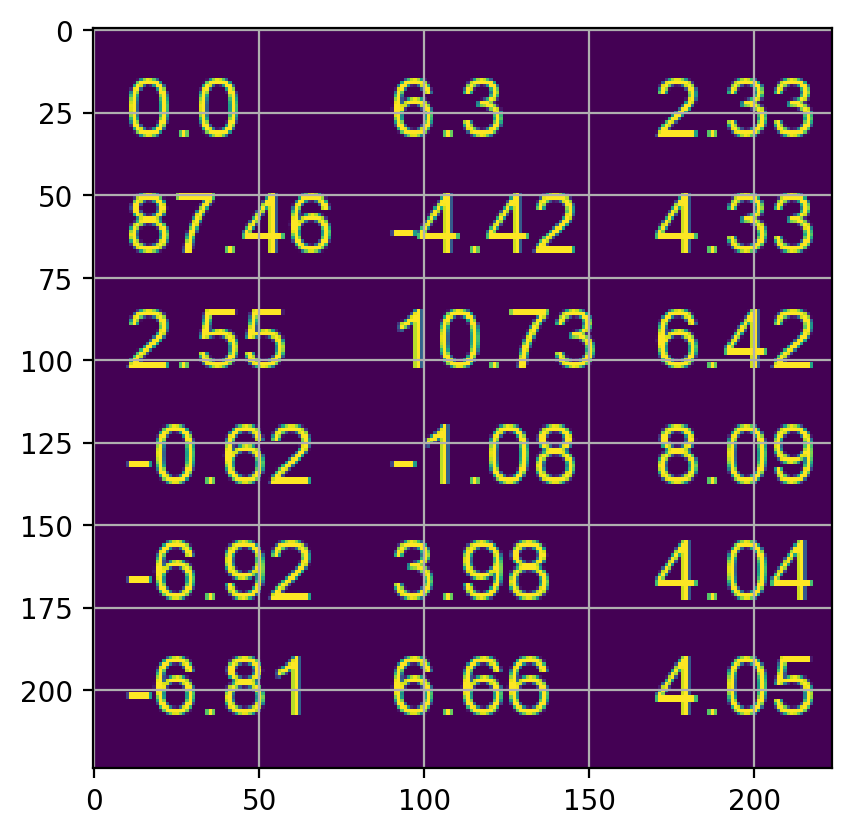

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1004, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1004,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 27s 170ms/step - loss: 141.9882 - root_mean_squared_error: 11.9159 - val_loss: 2.7319 - val_root_mean_squared_error: 1.6529
Epoch 2/50
63/63 [==============================] - 8s 124ms/step - loss: 1.7579 - root_mean_squared_error: 1.3258 - val_loss: 1.4357 - val_root_mean_squared_error: 1.1982
Epoch 3/50
63/63 [==============================] - 8s 126ms/step - loss: 1.6039 - root_mean_squared_error: 1.2664 - val_loss: 1.6719 - val_root_mean_squared_error: 1.2930
Epoch 4/50
63/63 [==============================] - 8s 125ms/step - loss: 1.6989 - root_mean_squared_error: 1.3034 - val_loss: 1.4539 - val_root_mean_squared_error: 1.2058
Epoch 5/50
63/63 [==============================] - 8s 125ms/step - loss: 1.5212 - root_mean_squared_error: 1.2334 - val_loss: 1.4668 - val_root_mean_squared_error: 1.2111
Epoch 6/50
63/63 [==============================] - 8s 126ms/step - loss: 1.4783 - root_mean_squared_error: 1.2159 - val_loss: 1.4006 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 130ms/step


predictions  actuals
0       2.193274      3.0
1       0.484559      3.0
2       1.190704      3.0
3       0.770386      3.0
4       1.466888      3.0
..           ...      ...
726     0.439834      4.0
727     0.800455      4.0
728     1.612855      4.0
729     0.544609      4.0
730     1.834022      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            0.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          1.0      4.0
728          2.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            0.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          0.0      4.0
727          1.0      4.0
728          2.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.20      0.07      0.10       225
         1.0       0.14      0.60      0.23        84
         2.0       0.13      0.37      0.19        95
         3.0       0.22      0.04      0.06       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.14      0.21      0.12       731
weighted avg       0.16      0.15      0.10       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.20      0.07      0.10       225
         1.0       0.14      0.60      0.23        84
         2.0       0.13      0.37      0.19        95
         3.0       0.22      0.04      0.06       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.14      0.21      0.12       731
weighted avg       0.16      0.15      0.10       731



<Axes: >

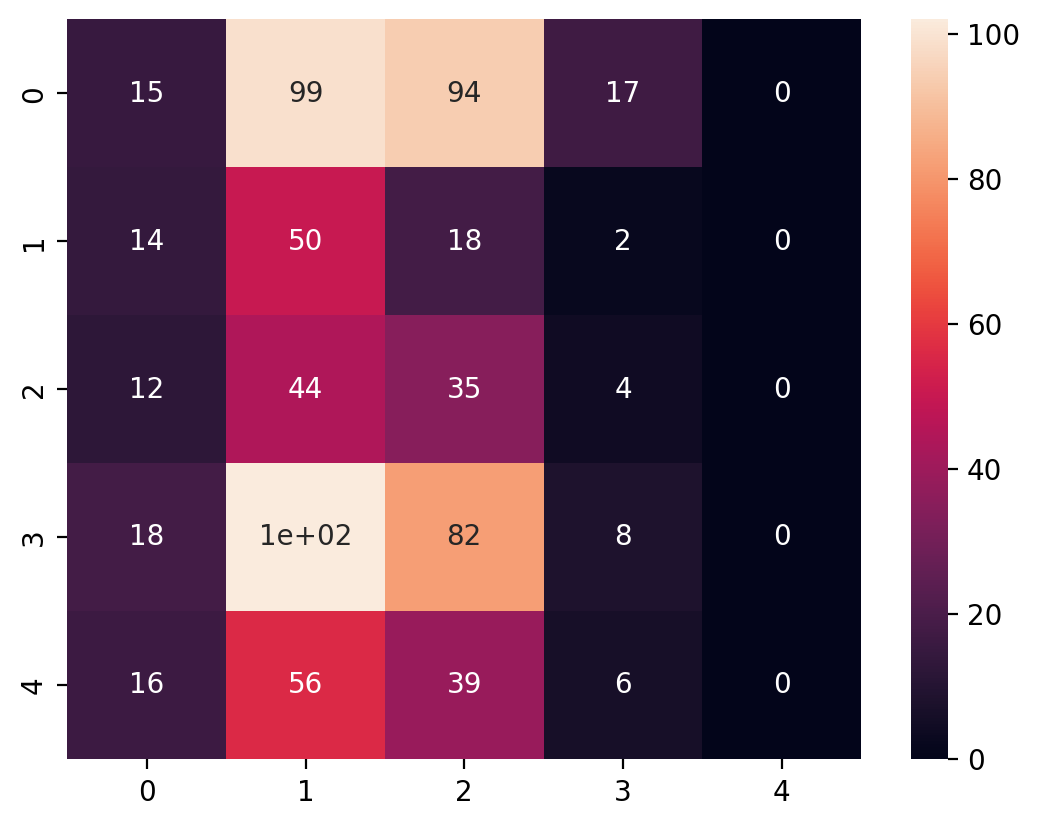

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 7s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 38s 315ms/step - loss: 33.1747 - root_mean_squared_error: 5.7597 - val_loss: 1.6357 - val_root_mean_squared_error: 1.2789
Epoch 2/50
63/63 [==============================] - 13s 199ms/step - loss: 1.7175 - root_mean_squared_error: 1.3105 - val_loss: 1.7997 - val_root_mean_squared_error: 1.3415
Epoch 3/50
63/63 [==============================] - 13s 201ms/step - loss: 1.8522 - root_mean_squared_error: 1.3610 - val_loss: 1.4952 - val_root_mean_squared_error: 1.2228
Epoch 4/50
63/63 [==============================] - 13s 199ms/step - loss: 1.7300 - root_mean_squared_error: 1.3153 - val_loss: 1.5069 - val_root_mean_squared_error: 1.2276
Epoch 5/50
63/63 [==============================] - 12s 198ms/step - loss: 1.6427 - root_mean_squared_error: 1.2817 - val_loss: 1.4176 - val_root_mean_squared_error: 1.1906
Epoch 6/50
63/63 [==============================] - 12s 197ms/step - loss: 1.5579 - root_mean_squared_error: 1.2481 - val_loss: 1.4504

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 225ms/step


predictions  actuals
0       2.325571      3.0
1       1.015949      3.0
2       1.944029      3.0
3       0.779219      3.0
4       0.488912      3.0
..           ...      ...
726     0.496460      4.0
727     1.931393      4.0
728     1.398556      4.0
729     1.453080      4.0
730     1.655421      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            1.0      3.0
4            0.0      3.0
..           ...      ...
726          0.0      4.0
727          2.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            1.0      3.0
4            0.0      3.0
..           ...      ...
726          0.0      4.0
727          2.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.17      0.03      0.05       225
         1.0       0.16      0.62      0.26        84
         2.0       0.10      0.39      0.17        95
         3.0       0.21      0.01      0.03       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.14       731
   macro avg       0.13      0.21      0.10       731
weighted avg       0.15      0.14      0.07       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.17      0.03      0.05       225
         1.0       0.16      0.62      0.26        84
         2.0       0.10      0.39      0.17        95
         3.0       0.21      0.01      0.03       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.14       731
   macro avg       0.13      0.21      0.10       731
weighted avg       0.15      0.14      0.07       731



<Axes: >

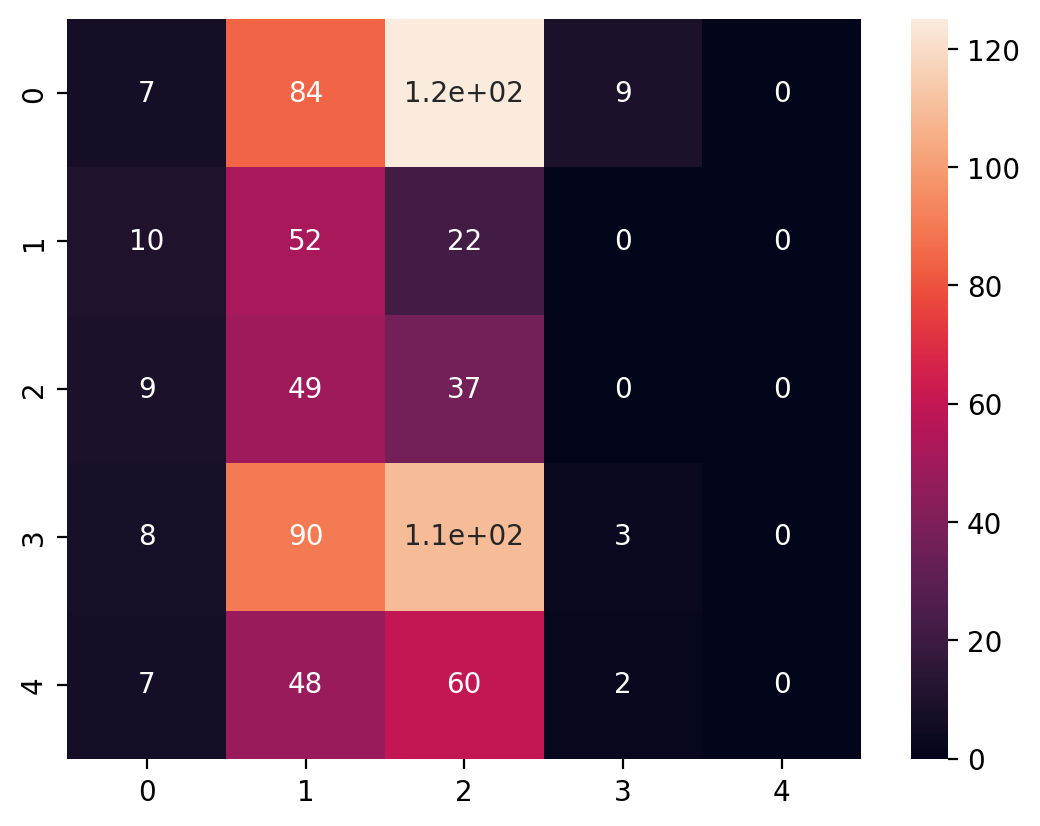

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 15s 142ms/step - loss: 8.0049 - root_mean_squared_error: 2.8293 - val_loss: 1.4133 - val_root_mean_squared_error: 1.1888
Epoch 2/50
63/63 [==============================] - 6s 90ms/step - loss: 1.4778 - root_mean_squared_error: 1.2156 - val_loss: 1.4284 - val_root_mean_squared_error: 1.1952
Epoch 3/50
63/63 [==============================] - 6s 90ms/step - loss: 1.4027 - root_mean_squared_error: 1.1844 - val_loss: 1.6185 - val_root_mean_squared_error: 1.2722
Epoch 4/50
63/63 [==============================] - 6s 91ms/step - loss: 1.4534 - root_mean_squared_error: 1.2056 - val_loss: 1.4695 - val_root_mean_squared_error: 1.2122
Epoch 5/50
63/63 [==============================] - 6s 91ms/step - loss: 1.4848 - root_mean_squared_error: 1.2185 - val_loss: 1.4139 - val_root_mean_squared_error: 1.1891
Epoch 6/50
63/63 [==============================] - 6s 91ms/step - loss: 1.4299 - root_mean_squared_error: 1.1958 - val_loss: 1.4831 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 276ms/step


predictions  actuals
0       1.699540      3.0
1       1.775087      3.0
2       0.259581      3.0
3      -0.033820      3.0
4       0.656762      3.0
..           ...      ...
726     1.673825      4.0
727     0.169407      4.0
728     1.705173      4.0
729     0.107373      4.0
730     1.771595      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<6.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            0.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          2.0      4.0
727          0.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<6.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            0.0      3.0
3            0.0      3.0
4            1.0      3.0
..           ...      ...
726          2.0      4.0
727          0.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.28      0.20      0.23       225
         1.0       0.12      0.37      0.18        84
         2.0       0.13      0.35      0.19        95
         3.0       0.33      0.06      0.10       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.17       731
   macro avg       0.17      0.20      0.14       731
weighted avg       0.21      0.17      0.15       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.28      0.20      0.23       225
         1.0       0.12      0.37      0.18        84
         2.0       0.13      0.35      0.19        95
         3.0       0.33      0.06      0.10       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.17       731
   macro avg       0.17      0.20      0.14       731
weighted avg       0.21      0.17      0.15       731



<Axes: >

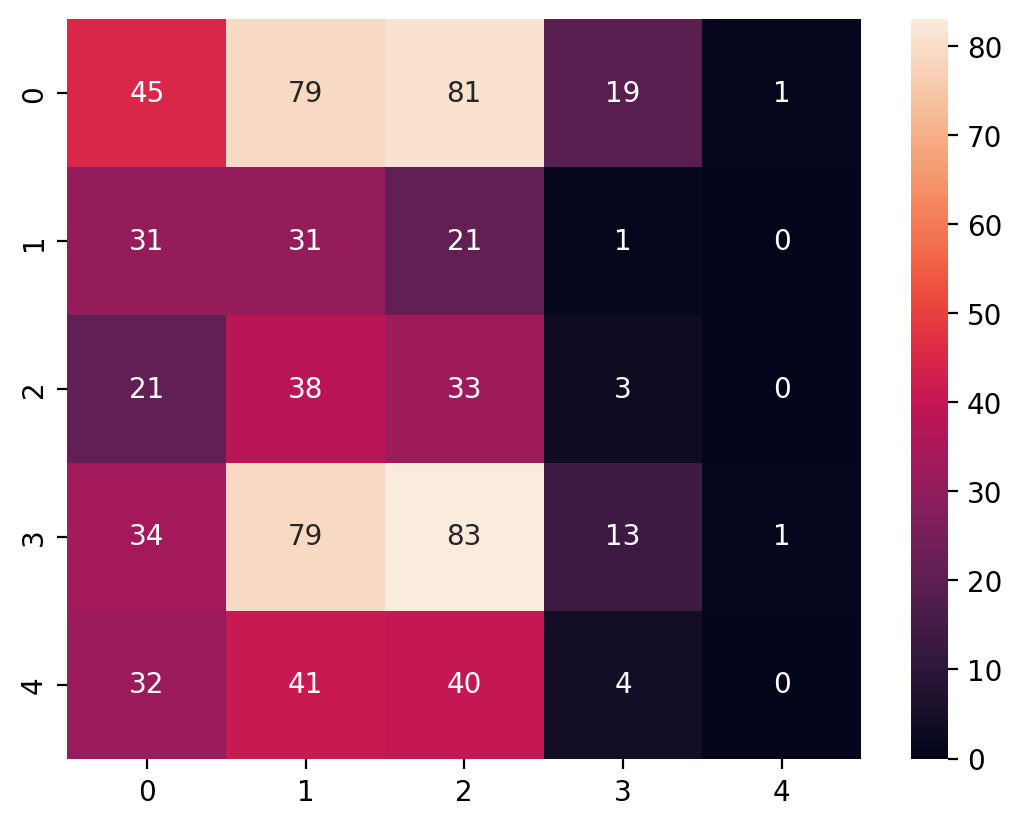

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[4]), fill='white', font=font2)
        draw.text((10, 80), str(dat[7]), fill='white', font=font3)
        draw.text((10, 115), str(dat[14]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[15]), fill='white', font=font3)
        draw.text((90, 10), str(dat[9]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[13]), fill='white', font=font4)
        draw.text((90, 115), str(dat[17]), fill='white', font=font4)
        draw.text((90, 150), str(dat[10]), fill='white', font=font5)
        draw.text((90, 185), str(dat[11]), fill='white', font=font5)
        draw.text((170, 10), str(dat[12]), fill='white', font=font5)
        draw.text((170, 45), str(dat[8]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[2]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


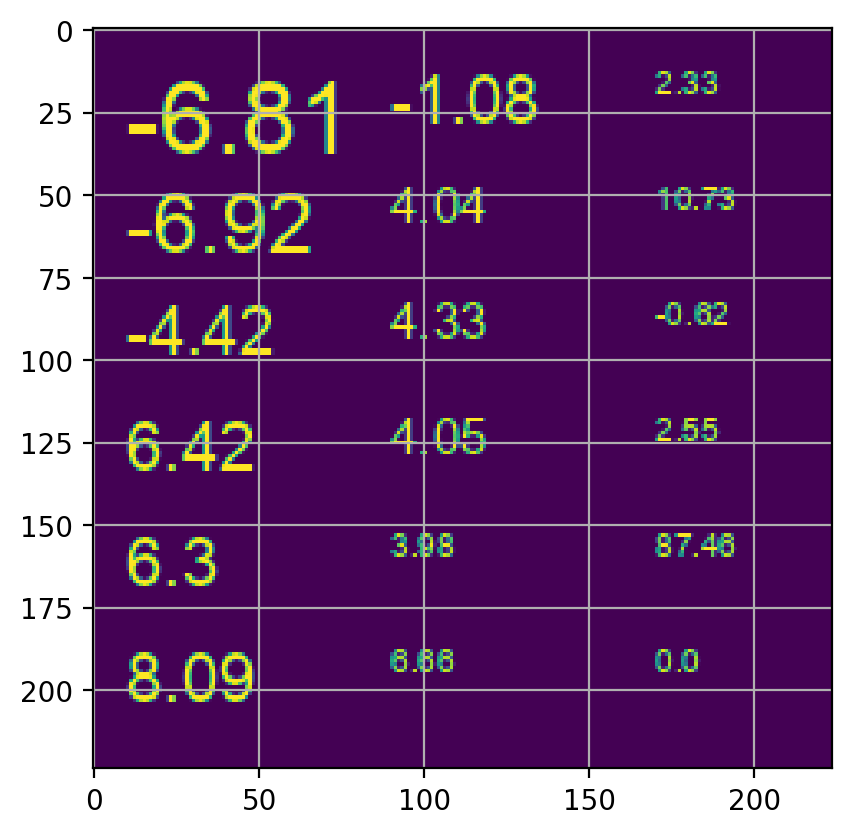

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 13s 191ms/step - loss: 74.0016 - root_mean_squared_error: 8.6024 - val_loss: 4.0267 - val_root_mean_squared_error: 2.0067
Epoch 2/50
37/37 [==============================] - 5s 142ms/step - loss: 1.7978 - root_mean_squared_error: 1.3408 - val_loss: 1.6366 - val_root_mean_squared_error: 1.2793
Epoch 3/50
37/37 [==============================] - 5s 148ms/step - loss: 1.8174 - root_mean_squared_error: 1.3481 - val_loss: 1.4151 - val_root_mean_squared_error: 1.1896
Epoch 4/50
37/37 [==============================] - 5s 146ms/step - loss: 1.8799 - root_mean_squared_error: 1.3711 - val_loss: 1.5432 - val_root_mean_squared_error: 1.2423
Epoch 5/50
37/37 [==============================] - 5s 146ms/step - loss: 1.7427 - root_mean_squared_error: 1.3201 - val_loss: 1.4798 - val_root_mean_squared_error: 1.2165
Epoch 6/50
37/37 [==============================] - 5s 148ms/step - loss: 1.6969 - root_mean_squared_error: 1.3026 - val_loss: 1.4111 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 100ms/step


predictions  actuals
0       1.979727      3.0
1       1.023063      3.0
2       1.403793      3.0
3       1.452896      3.0
4       1.129692      3.0
..           ...      ...
726     1.213910      4.0
727     1.177716      4.0
728     1.374687      4.0
729     1.286009      4.0
730     1.634217      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.30      0.04      0.06       225
         1.0       0.16      0.82      0.27        84
         2.0       0.11      0.33      0.17        95
         3.0       0.00      0.00      0.00       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.11      0.24      0.10       731
weighted avg       0.12      0.15      0.07       731



<Axes: >

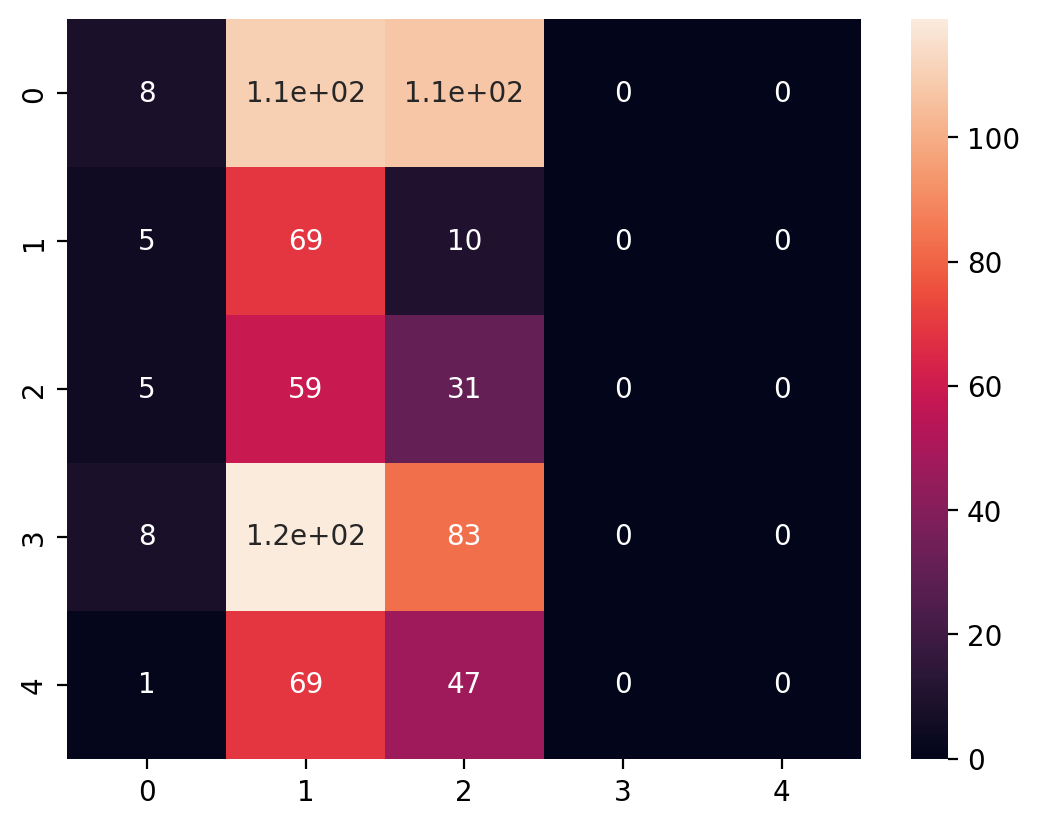

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 31s 409ms/step - loss: 30.0450 - root_mean_squared_error: 5.4813 - val_loss: 1.4867 - val_root_mean_squared_error: 1.2193
Epoch 2/50
37/37 [==============================] - 9s 232ms/step - loss: 1.9229 - root_mean_squared_error: 1.3867 - val_loss: 1.4331 - val_root_mean_squared_error: 1.1971
Epoch 3/50
37/37 [==============================] - 9s 232ms/step - loss: 1.6596 - root_mean_squared_error: 1.2883 - val_loss: 1.4539 - val_root_mean_squared_error: 1.2058
Epoch 4/50
37/37 [==============================] - 8s 230ms/step - loss: 1.5951 - root_mean_squared_error: 1.2630 - val_loss: 1.4683 - val_root_mean_squared_error: 1.2117
Epoch 5/50
37/37 [==============================] - 8s 229ms/step - loss: 1.5716 - root_mean_squared_error: 1.2536 - val_loss: 1.4198 - val_root_mean_squared_error: 1.1915
Epoch 6/50
37/37 [==============================] - 8s 227ms/step - loss: 1.6848 - root_mean_squared_error: 1.2980 - val_loss: 1.4423 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 168ms/step


predictions  actuals
0       1.562302      3.0
1       0.908924      3.0
2       2.315948      3.0
3       1.742475      3.0
4       1.501820      3.0
..           ...      ...
726     0.672027      4.0
727     1.799941      4.0
728     2.321662      4.0
729     0.755823      4.0
730     2.517258      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          1.0      4.0
727          2.0      4.0
728          2.0      4.0
729          1.0      4.0
730          3.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          1.0      4.0
727          2.0      4.0
728          2.0      4.0
729          1.0      4.0
730          3.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.18      0.02      0.04       225
         1.0       0.20      0.60      0.30        84
         2.0       0.11      0.41      0.18        95
         3.0       0.30      0.16      0.21       210
         4.0       1.00      0.01      0.02       117

    accuracy                           0.18       731
   macro avg       0.36      0.24      0.15       731
weighted avg       0.34      0.18      0.13       731



<Axes: >

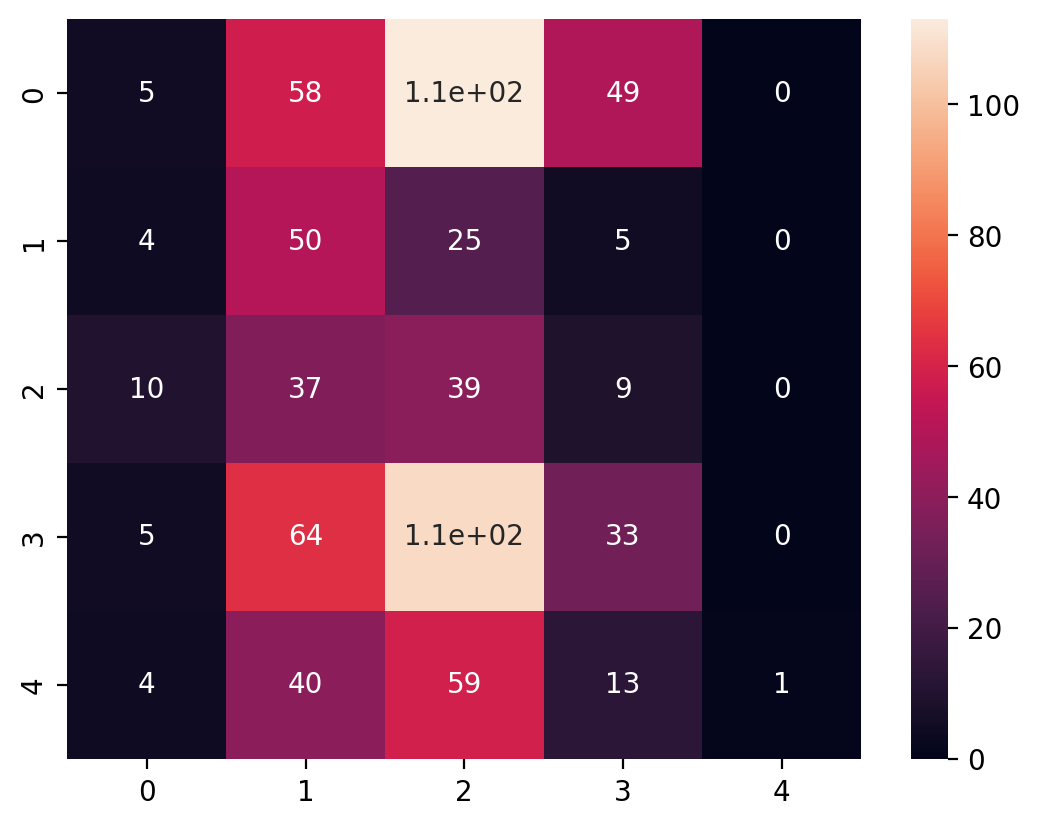

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 133ms/step - loss: 3.7998 - root_mean_squared_error: 1.9493 - val_loss: 1.8880 - val_root_mean_squared_error: 1.3740
Epoch 2/50
37/37 [==============================] - 4s 121ms/step - loss: 1.7085 - root_mean_squared_error: 1.3071 - val_loss: 1.4177 - val_root_mean_squared_error: 1.1907
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 1.5985 - root_mean_squared_error: 1.2643 - val_loss: 1.4261 - val_root_mean_squared_error: 1.1942
Epoch 4/50
37/37 [==============================] - 4s 122ms/step - loss: 1.5854 - root_mean_squared_error: 1.2591 - val_loss: 1.6590 - val_root_mean_squared_error: 1.2880
Epoch 5/50
37/37 [==============================] - 4s 122ms/step - loss: 1.5872 - root_mean_squared_error: 1.2598 - val_loss: 1.4164 - val_root_mean_squared_error: 1.1901
Epoch 6/50
37/37 [==============================] - 4s 122ms/step - loss: 1.5616 - root_mean_squared_error: 1.2497 - val_loss: 1.4889 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 156ms/step


predictions  actuals
0       1.363182      3.0
1       1.363182      3.0
2       1.363182      3.0
3       1.363182      3.0
4       1.363182      3.0
..           ...      ...
726     1.363182      4.0
727     1.363182      4.0
728     1.363182      4.0
729     1.363182      4.0
730     1.363182      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            1.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            1.0      3.0
2            1.0      3.0
3            1.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          1.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       225
         1.0       0.11      1.00      0.21        84
         2.0       0.00      0.00      0.00        95
         3.0       0.00      0.00      0.00       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.11       731
   macro avg       0.02      0.20      0.04       731
weighted avg       0.01      0.11      0.02       731



<Axes: >

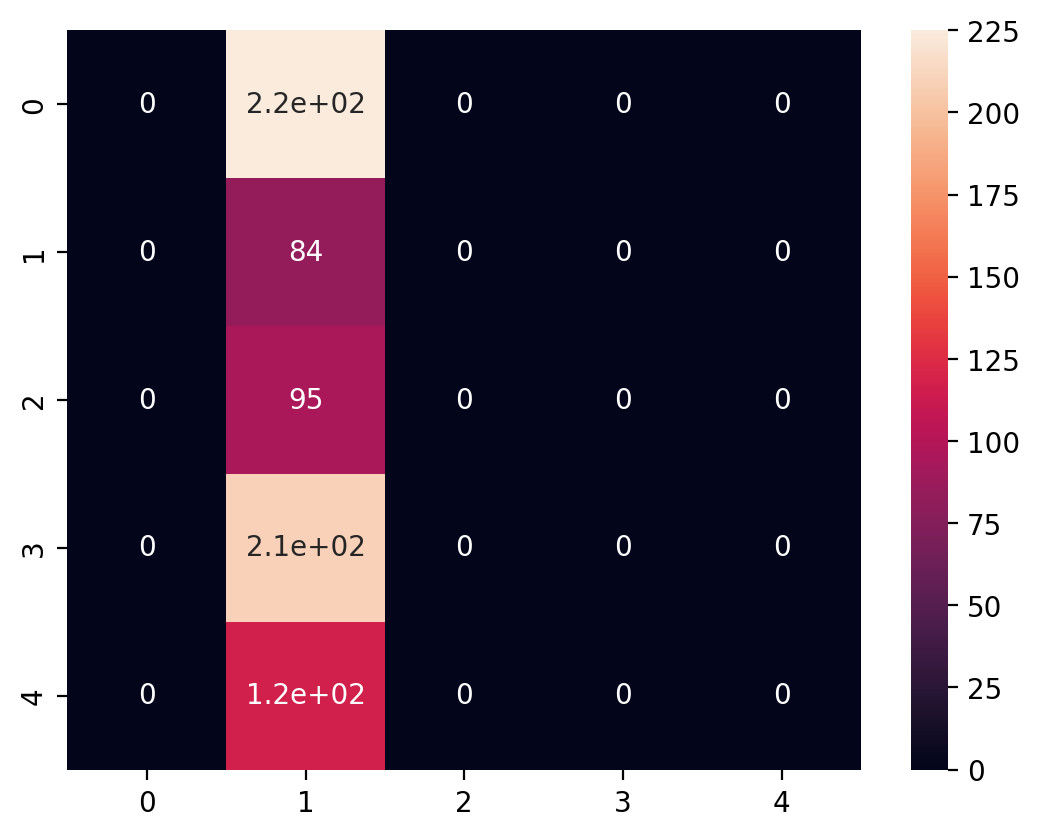

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[4]), fill='white', font=font2)
        draw.text((10, 80), str(dat[7]), fill='white', font=font3)
        draw.text((10, 115), str(dat[14]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[15]), fill='white', font=font3)
        draw.text((90, 10), str(dat[9]), fill='white', font=font3)
        draw.text((90, 45), str(dat[16]), fill='white', font=font4)
        draw.text((90, 80), str(dat[13]), fill='white', font=font4)
        draw.text((90, 115), str(dat[17]), fill='white', font=font4)
        draw.text((90, 150), str(dat[10]), fill='white', font=font5)
        draw.text((90, 185), str(dat[11]), fill='white', font=font5)
        draw.text((170, 10), str(dat[12]), fill='white', font=font5)
        draw.text((170, 45), str(dat[8]), fill='white', font=font5)
        draw.text((170, 80), str(dat[3]), fill='white', font=font5)
        draw.text((170, 115), str(dat[2]), fill='white', font=font5)
        draw.text((170, 150), str(dat[1]), fill='white', font=font5)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:251,1:251,2:251,3:251},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1004, 18)
After OverSampling, the shape of train_y: (1004,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[0.00000e+00, 8.74600e+01, 2.55000e+00, ..., 8.09000e+00,
        4.04000e+00, 4.05000e+00],
       [0.00000e+00, 8.71500e+01, 5.16000e+00, ..., 5.73000e+00,
        2.44000e+00, 3.29000e+00],
       [5.19000e+00, 8.61100e+01, 4.45000e+00, ..., 9.84000e+00,
        3.43000e+00, 6.41000e+00],
       ...,
       [0.00000e+00, 8.72460e+01, 5.42320e+00, ..., 7.29820e+00,
        1.58950e+00, 5.71170e+00],
       [2.61000e-02, 8.75255e+01, 7.94090e+00, ..., 6.86980e+00,
        1.42770e+00, 5.43360e+00],
       [4.30000e-03, 8.73584e+01, 6.44630e+00, ..., 7.79750e+00,
        1.30410e+00, 6.48340e+00]])

(1004, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


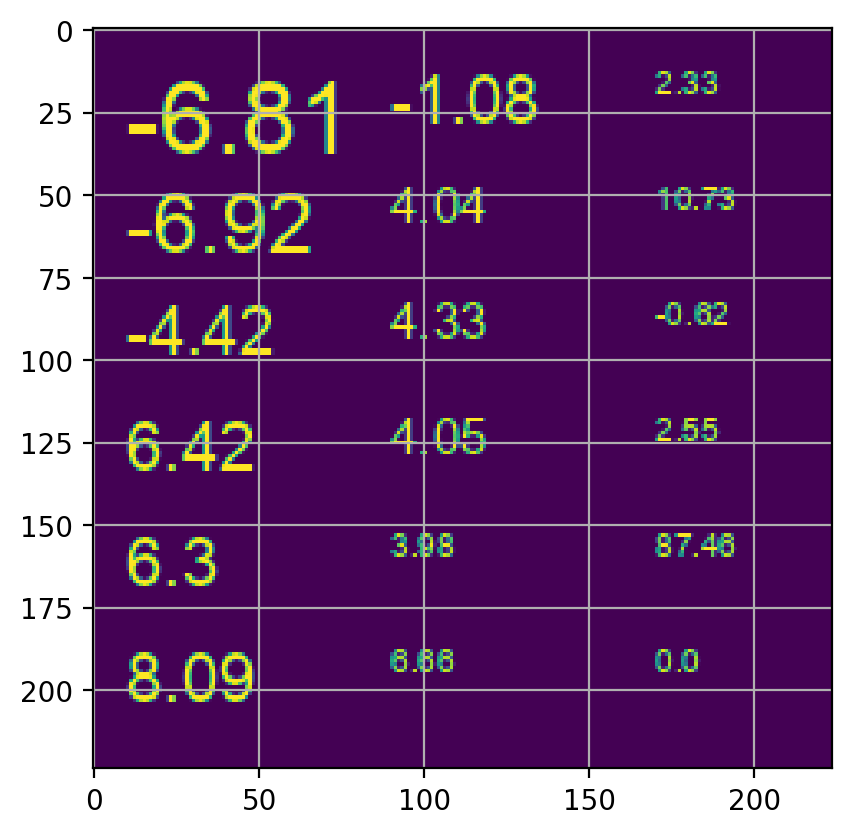

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1004, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1004,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 16s 157ms/step - loss: 132.6708 - root_mean_squared_error: 11.5183 - val_loss: 1.4221 - val_root_mean_squared_error: 1.1925
Epoch 2/50
63/63 [==============================] - 8s 128ms/step - loss: 1.6470 - root_mean_squared_error: 1.2834 - val_loss: 1.7676 - val_root_mean_squared_error: 1.3295
Epoch 3/50
63/63 [==============================] - 8s 129ms/step - loss: 1.6452 - root_mean_squared_error: 1.2826 - val_loss: 1.4539 - val_root_mean_squared_error: 1.2058
Epoch 4/50
63/63 [==============================] - 8s 129ms/step - loss: 1.5629 - root_mean_squared_error: 1.2501 - val_loss: 1.5164 - val_root_mean_squared_error: 1.2314
Epoch 5/50
63/63 [==============================] - 8s 128ms/step - loss: 1.6631 - root_mean_squared_error: 1.2896 - val_loss: 1.4256 - val_root_mean_squared_error: 1.1940
Epoch 6/50
63/63 [==============================] - 8s 128ms/step - loss: 1.5923 - root_mean_squared_error: 1.2619 - val_loss: 1.3968 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 93ms/step


predictions  actuals
0       2.008664      3.0
1       0.663800      3.0
2       1.153694      3.0
3       1.532185      3.0
4       0.722662      3.0
..           ...      ...
726     1.045644      4.0
727     0.891598      4.0
728     1.050526      4.0
729     1.027925      4.0
730     1.782552      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            1.0      3.0
3            2.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            1.0      3.0
2            1.0      3.0
3            2.0      3.0
4            1.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          1.0      4.0
729          1.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.43      0.03      0.05       225
         1.0       0.17      0.79      0.28        84
         2.0       0.10      0.35      0.16        95
         3.0       0.42      0.04      0.07       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.23      0.24      0.11       731
weighted avg       0.29      0.15      0.09       731



<Axes: >

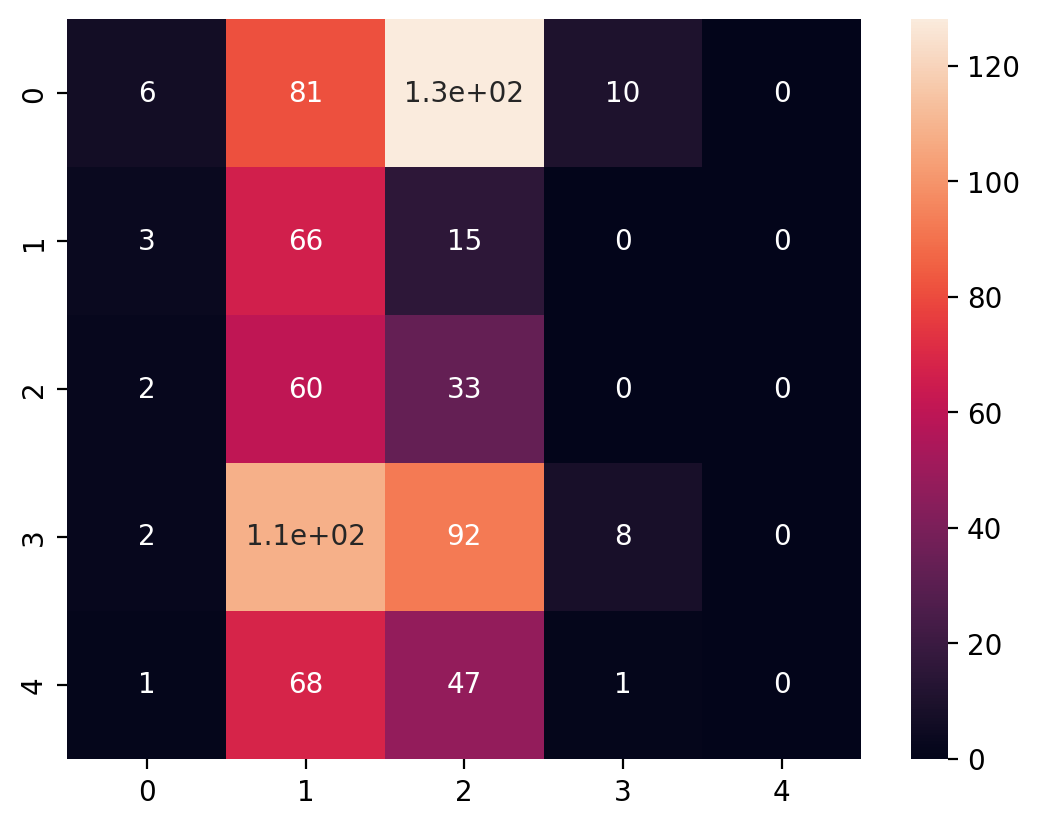

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 35s 296ms/step - loss: 30.6516 - root_mean_squared_error: 5.5364 - val_loss: 1.3984 - val_root_mean_squared_error: 1.1825
Epoch 2/50
63/63 [==============================] - 12s 197ms/step - loss: 1.8848 - root_mean_squared_error: 1.3729 - val_loss: 1.3795 - val_root_mean_squared_error: 1.1745
Epoch 3/50
63/63 [==============================] - 13s 200ms/step - loss: 1.7739 - root_mean_squared_error: 1.3319 - val_loss: 1.4246 - val_root_mean_squared_error: 1.1936
Epoch 4/50
63/63 [==============================] - 13s 200ms/step - loss: 1.7980 - root_mean_squared_error: 1.3409 - val_loss: 1.4550 - val_root_mean_squared_error: 1.2062
Epoch 5/50
63/63 [==============================] - 12s 198ms/step - loss: 1.8096 - root_mean_squared_error: 1.3452 - val_loss: 1.4449 - val_root_mean_squared_error: 1.2020
Epoch 6/50
63/63 [==============================] - 12s 197ms/step - loss: 1.7004 - root_mean_squared_error: 1.3040 - val_loss: 1.5210

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 157ms/step


predictions  actuals
0       1.471441      3.0
1       0.616492      3.0
2       1.727922      3.0
3       1.530720      3.0
4       1.580619      3.0
..           ...      ...
726     0.846060      4.0
727     1.490304      4.0
728     1.887986      4.0
729     0.371261      4.0
730     2.414998      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            1.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      3.0
1            1.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          1.0      4.0
727          1.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.27      0.12      0.16       225
         1.0       0.13      0.48      0.21        84
         2.0       0.11      0.37      0.17        95
         3.0       0.29      0.02      0.04       210
         4.0       0.00      0.00      0.00       117

    accuracy                           0.15       731
   macro avg       0.16      0.20      0.12       731
weighted avg       0.20      0.15      0.11       731



<Axes: >

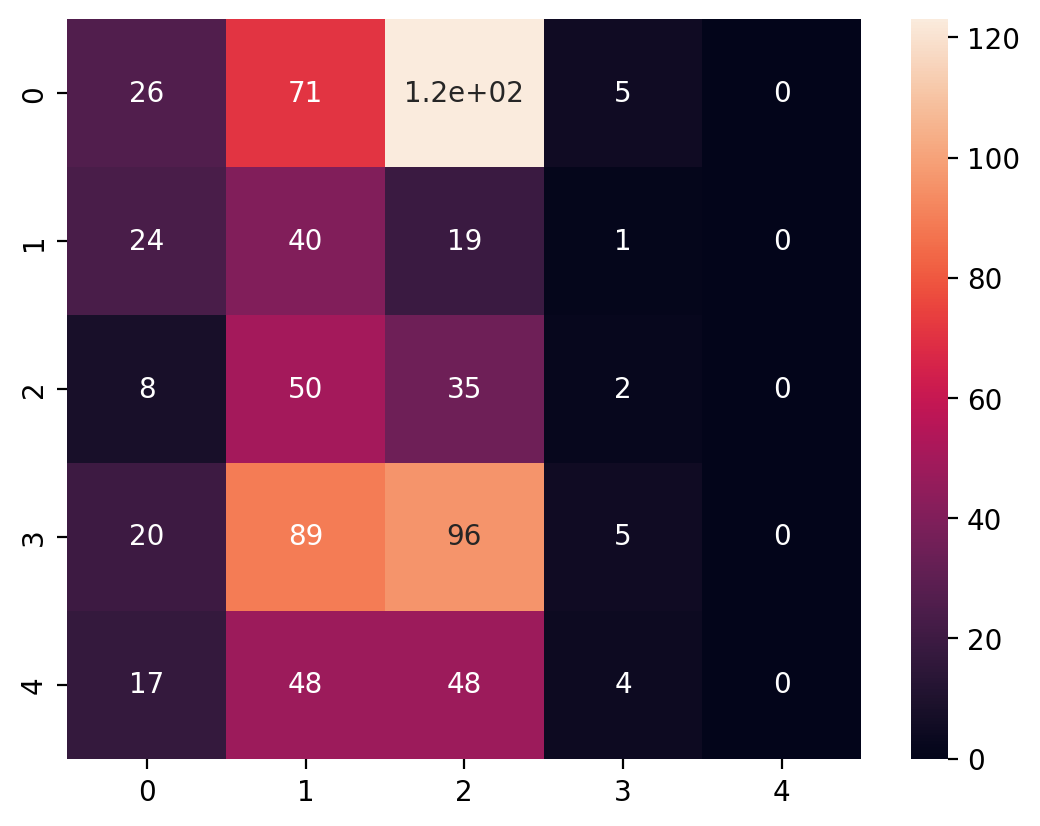

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
63/63 [==============================] - 9s 99ms/step - loss: 13.7117 - root_mean_squared_error: 3.7029 - val_loss: 1.4291 - val_root_mean_squared_error: 1.1955
Epoch 2/50
63/63 [==============================] - 6s 89ms/step - loss: 1.4278 - root_mean_squared_error: 1.1949 - val_loss: 1.4527 - val_root_mean_squared_error: 1.2053
Epoch 3/50
63/63 [==============================] - 6s 89ms/step - loss: 1.4523 - root_mean_squared_error: 1.2051 - val_loss: 1.5123 - val_root_mean_squared_error: 1.2297
Epoch 4/50
63/63 [==============================] - 6s 90ms/step - loss: 1.4145 - root_mean_squared_error: 1.1893 - val_loss: 1.4002 - val_root_mean_squared_error: 1.1833
Epoch 5/50
63/63 [==============================] - 6s 89ms/step - loss: 1.3869 - root_mean_squared_error: 1.1777 - val_loss: 1.4461 - val_root_mean_squared_error: 1.2025
Epoch 6/50
63/63 [==============================] - 6s 90ms/step - loss: 1.3860 - root_mean_squared_error: 1.1773 - val_loss: 1.4605 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 114ms/step


predictions  actuals
0       2.702704      3.0
1       1.667981      3.0
2       1.791204      3.0
3       1.325196      3.0
4       0.489021      3.0
..           ...      ...
726     0.913409      4.0
727     2.191281      4.0
728     1.553725      4.0
729     0.475275      4.0
730     2.418412      4.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            2.0      3.0
3            1.0      3.0
4            0.0      3.0
..           ...      ...
726          1.0      4.0
727          2.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            2.0      3.0
3            1.0      3.0
4            0.0      3.0
..           ...      ...
726          1.0      4.0
727          2.0      4.0
728          2.0      4.0
729          0.0      4.0
730          2.0      4.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.17      0.13      0.15       225
         1.0       0.11      0.24      0.15        84
         2.0       0.11      0.32      0.16        95
         3.0       0.29      0.11      0.16       210
         4.0       0.33      0.01      0.02       117

    accuracy                           0.14       731
   macro avg       0.20      0.16      0.13       731
weighted avg       0.22      0.14      0.13       731



<Axes: >

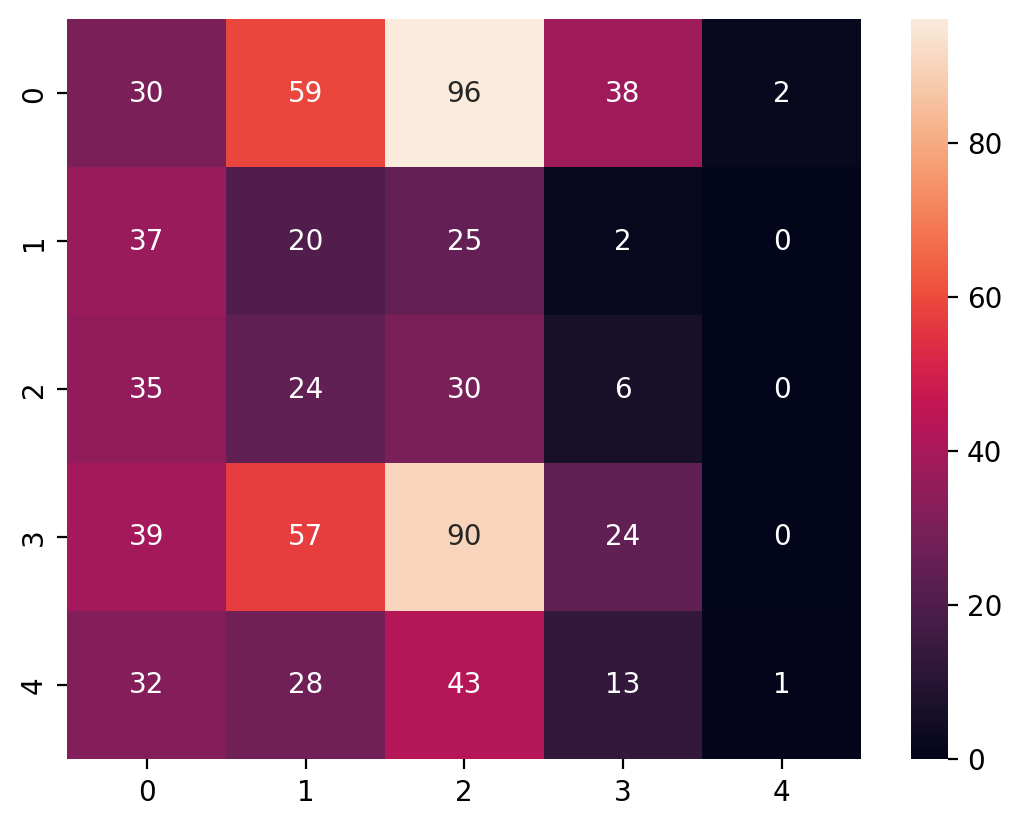

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)